# Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

This project involves a comprehensive analysis of transaction, customer demographic, and customer address data for a bikes and cycling accessories organization. The primary goal is to understand customer behavior, identify key retention patterns, and segment customers based on their value.

## Key Findings:

### Data Cleaning and Preparation:
- Initial data cleaning involved handling inconsistent column headers, dropping unnecessary rows, and converting data types for numerical and date columns.
- Missing gender values were imputed using a gender guessing library based on first names.
- Outlier ages (e.g., 125 years old) were imputed with the median age of relevant job industry categories.
- Other missing numerical and categorical values were imputed using median and mode respectively.

### Exploratory Data Analysis (EDA):
- Univariate and multivariate visualizations were used to explore distributions and relationships within the transaction, demographic, and address datasets.
- Insights were gained into the distribution of `online_order`, `order_status`, `brand`, `product_line`, `product_class`, `product_size`, `list_price`, `standard_cost`, and `profit`.
- Customer demographic features like `gender`, `past_3_years_bike_related_purchases`, `age`, `job_industry_category`, `wealth_segment`, `deceased_indicator`, `owns_car`, and `tenure` were analyzed.
- Customer address data revealed state-wise distribution and property valuation patterns.

### Cohort Analysis:
- Customers were grouped into cohorts based on their first transaction month.
- Monthly retention rates were calculated and visualized using a heatmap.
- Significant fluctuations in retention were observed, prompting further investigation into specific cohorts.

#### Investigation of Cohort Month 2024-07 (Index 2 vs. Index 3):
- **Drop in retention for July cohort:** Marked by a decrease in female customers, especially those in Retail and Manufacturing industries.
- **Product impact:** Decreased purchases of Solex and Trek Bicycles were noted.
- **Wealth Segment:** A drop in 'Mass Customer' and 'Affluent Customer' segments was observed.

#### Investigation of Cohort Month 2024-10 (Index 2 vs. Index 3):
- **Increase in retention for October cohort:** Linked to a rise in more senior customers (50-75 years old), a more diverse customer base across genders and states (NSW and QLD).
- **Industry impact:** Increased customer presence from various industries, including Retail, Financial Services, Health, and Agriculture.
- **Wealth Segment:** An increase in 'Mass Customer' and 'Affluent Customer' segments.
- **Product impact:** Increased sales for Mountain and Road product lines, medium and large product sizes, and most brands (especially WeareA2B), with Giant Bicycles remaining stable.

### RFM (Recency, Frequency, Monetary) Model:
- An RFM model was built to segment customers into 'high', 'medium', and 'low' value categories based on their transaction behavior.
- **RFM Score Distribution:** The scores ranged from 33.8 to 3483.6, with a mean of 1747.5.

### Root Cause Analysis of RFM Categories:
- **Age:** While median age was similar across RFM categories, the average age of high-value customers was slightly lower.
- **Past Purchases:** Similar median bike-related purchases were observed across all RFM categories.
- **Demographics:** Gender, state, and wealth segment distributions varied across RFM categories.
- **Job Industry:** Manufacturing, Financial Services, and Health industries contributed significantly to the high-value customer segment.
- **Profit Contribution:**
  - Affluent female customers in VIC and affluent male customers in QLD generated the most profit in the high-value/medium-value groups.
  - Male customers with high net worth tended to contribute the lowest profit in the low-value group.
  - Mass customers from VIC (male) and Mass/Affluent customers from NSW (female) showed varying profit contributions in the low-value group.

These findings provide actionable insights for targeted marketing strategies and customer retention efforts.

# Importing Libraries


In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

#import missingno as msno
#from textwrap import wrap

# Data loading and cleaning

In [2]:
# Loading dataset
transaction_df = pd.read_excel('/content/Project 1_ KPMG_VI_New_raw_data_update_final.xlsx','Transactions')


In [3]:
# View data
transaction_df.head()

Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.   \
0                                     transaction_id                                                                                                                              
1                                                  1                                                                                                                              
2                                                  2                                                                                                                              
3                                                  3                                                                                                                              
4                                                  4                                                                                                                              

   Unnamed: 1   Unnamed: 2        Unnamed: 3    Unnamed: 4    Unnamed: 5  \
0  product_id  customer_id  transaction_date  online_order  order_status   
1           2         2950        25/02/2024         False      Approved   
2           3         3120        21/05/2024          True      Approved   
3          37          402        16/10/2024         False      Approved   
4          88         3135        31/08/2024         False      Approved   

       Unnamed: 6    Unnamed: 7     Unnamed: 8    Unnamed: 9 Unnamed: 10  \
0           brand  product_line  product_class  product_size  list_price   
1           Solex      Standard         medium        medium       71.49   
2   Trek Bicycles      Standard         medium         large     2091.47   
3      OHM Cycles      Standard            low        medium     1793.43   
4  Norco Bicycles      Standard         medium        medium     1198.46   

     Unnamed: 11              Unnamed: 12  
0  standard_cost  product_first_sold_date  
1          53.62                    41245  
2         388.92                    41701  
3         248.82                    36361  
4          381.1                    36145

In [4]:
transaction_df.columns = transaction_df.iloc[0]
transaction_df

0      transaction_id  product_id  customer_id     transaction_date  \
0      transaction_id  product_id  customer_id     transaction_date   
1                   1           2         2950           25/02/2024   
2                   2           3         3120           21/05/2024   
3                   3          37          402           16/10/2024   
4                   4          88         3135           31/08/2024   
...               ...         ...          ...                  ...   
19996           19996          51         1018           24/06/2024   
19997           19997          41          127  2024-09-11 00:00:00   
19998           19998          87         2284           14/04/2024   
19999           19999           6         2764  2024-03-07 00:00:00   
20000           20000          11         1144           22/09/2024   

0      online_order  order_status           brand  product_line  \
0      online_order  order_status           brand  product_line   
1             False      Approved           Solex      Standard   
2              True      Approved   Trek Bicycles      Standard   
3             False      Approved      OHM Cycles      Standard   
4             False      Approved  Norco Bicycles      Standard   
...             ...           ...             ...           ...   
19996          True      Approved      OHM Cycles      Standard   
19997          True      Approved           Solex          Road   
19998          True      Approved      OHM Cycles      Standard   
19999         False      Approved      OHM Cycles      Standard   
20000          True      Approved   Trek Bicycles      Standard   

0      product_class  product_size  list_price  standard_cost  \
0      product_class  product_size  list_price  standard_cost   
1             medium        medium       71.49          53.62   
2             medium         large     2091.47         388.92   
3                low        medium     1793.43         248.82   
4             medium        medium     1198.46          381.1   
...              ...           ...         ...            ...   
19996           high        medium     2005.66         1203.4   
19997         medium        medium      416.98         312.74   
19998         medium        medium      1636.9          44.71   
19999           high        medium      227.88         136.73   
20000         medium         small     1775.81        1580.47   

0      product_first_sold_date  
0      product_first_sold_date  
1                        41245  
2                        41701  
3                        36361  
4                        36145  
...                        ...  
19996                    37823  
19997                    35560  
19998                    40410  
19999                    38216  
20000                    36334  

[20001 rows x 13 columns]

In [5]:
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)

In [6]:
transaction_df

0     transaction_id product_id customer_id     transaction_date online_order  \
1                  1          2        2950           25/02/2024        False   
2                  2          3        3120           21/05/2024         True   
3                  3         37         402           16/10/2024        False   
4                  4         88        3135           31/08/2024        False   
5                  5         78         787  2024-01-10 00:00:00         True   
...              ...        ...         ...                  ...          ...   
19996          19996         51        1018           24/06/2024         True   
19997          19997         41         127  2024-09-11 00:00:00         True   
19998          19998         87        2284           14/04/2024         True   
19999          19999          6        2764  2024-03-07 00:00:00        False   
20000          20000         11        1144           22/09/2024         True   

0     order_status           brand product_line product_class product_size  \
1         Approved           Solex     Standard        medium       medium   
2         Approved   Trek Bicycles     Standard        medium        large   
3         Approved      OHM Cycles     Standard           low       medium   
4         Approved  Norco Bicycles     Standard        medium       medium   
5         Approved  Giant Bicycles     Standard        medium        large   
...            ...             ...          ...           ...          ...   
19996     Approved      OHM Cycles     Standard          high       medium   
19997     Approved           Solex         Road        medium       medium   
19998     Approved      OHM Cycles     Standard        medium       medium   
19999     Approved      OHM Cycles     Standard          high       medium   
20000     Approved   Trek Bicycles     Standard        medium        small   

0     list_price standard_cost product_first_sold_date  
1          71.49         53.62                   41245  
2        2091.47        388.92                   41701  
3        1793.43        248.82                   36361  
4        1198.46         381.1                   36145  
5         1765.3        709.48                   42226  
...          ...           ...                     ...  
19996    2005.66        1203.4                   37823  
19997     416.98        312.74                   35560  
19998     1636.9         44.71                   40410  
19999     227.88        136.73                   38216  
20000    1775.81       1580.47                   36334  

[20000 rows x 13 columns]

In [7]:
transaction_df['list_price'] = pd.to_numeric(transaction_df['list_price'], errors='coerce')
transaction_df['standard_cost'] = pd.to_numeric(transaction_df['standard_cost'], errors='coerce')

In [8]:
transaction_df['profit'] = transaction_df['list_price'] - transaction_df['standard_cost']

In [9]:
transaction_df.describe()

0        list_price  standard_cost        profit
count  20000.000000   19803.000000  19803.000000
mean    1107.829449     556.046951    551.950915
std      582.825242     405.955660    493.412849
min       12.010000       7.210000      4.800000
25%      575.270000     215.140000    133.780000
50%     1163.890000     507.580000    445.210000
75%     1635.300000     795.100000    830.240000
max     2091.470000    1759.850000   1702.550000

# EDA for transaction_df

## Univariate visualizations

In [10]:
transaction_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit'],
      dtype='object', name=0)

<Axes: xlabel='online_order', ylabel='count'>

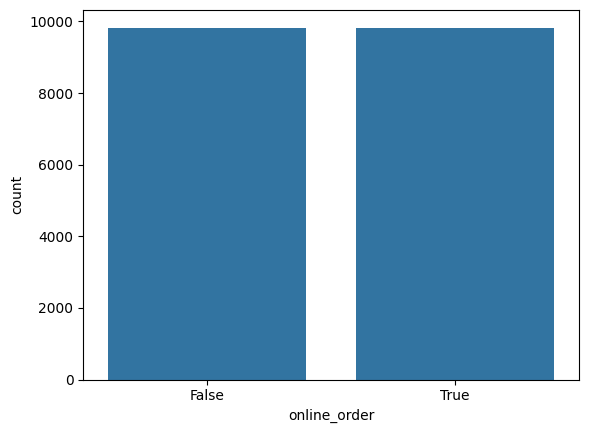

In [11]:
sns.countplot(x='online_order', data=transaction_df)

<Axes: xlabel='order_status', ylabel='count'>

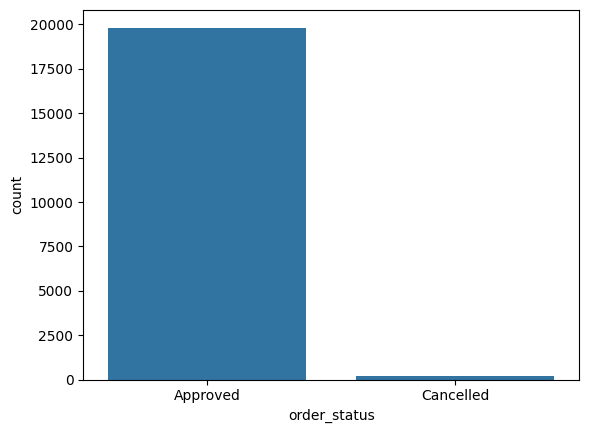

In [12]:
sns.countplot(x='order_status', data=transaction_df)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

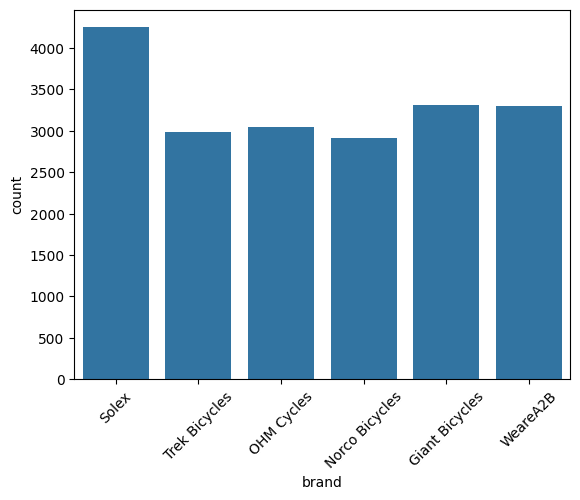

In [13]:
# plt.figure(figsize=(12, 6))
sns.countplot(x='brand', data=transaction_df)
plt.xticks(rotation=45)

<Axes: xlabel='product_line', ylabel='count'>

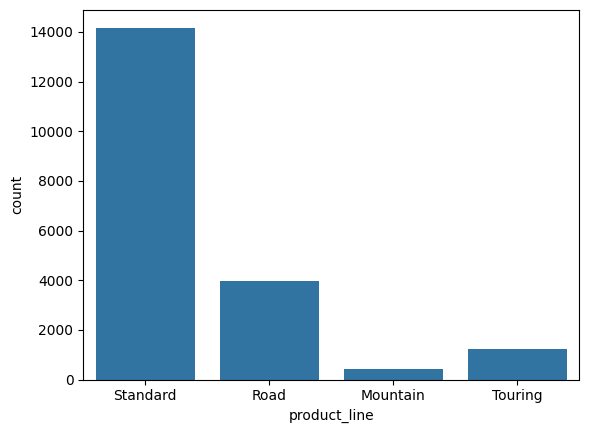

In [14]:
sns.countplot(x='product_line', data=transaction_df)

<Axes: xlabel='product_class', ylabel='count'>

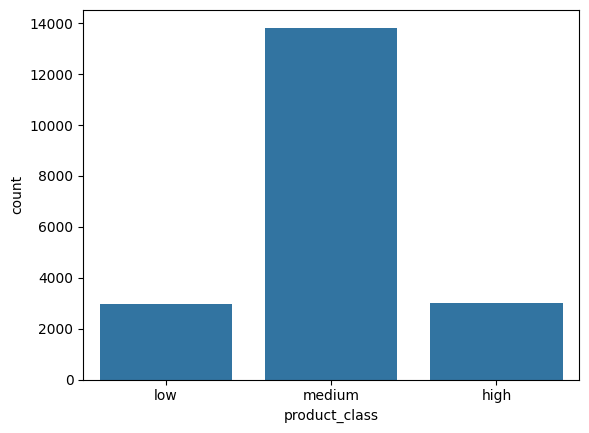

In [15]:
sns.countplot(x='product_class', data=transaction_df, order=['low', 'medium', 'high'])

<Axes: xlabel='product_size', ylabel='count'>

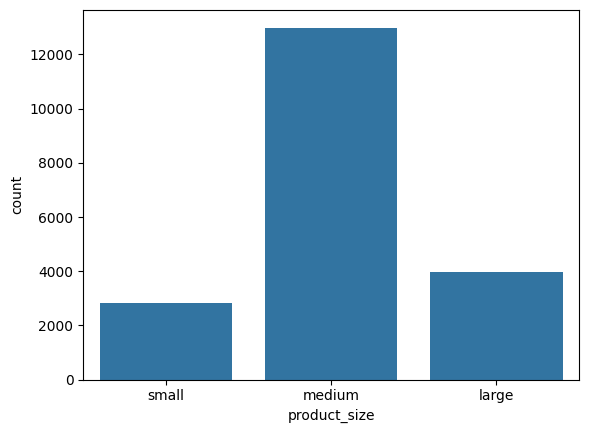

In [16]:
sns.countplot(x='product_size', data=transaction_df, order=['small', 'medium', 'large'])

/tmp/ipython-input-25897243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transaction_df['list_price'], bins=10, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)


<Axes: xlabel='list_price', ylabel='Density'>

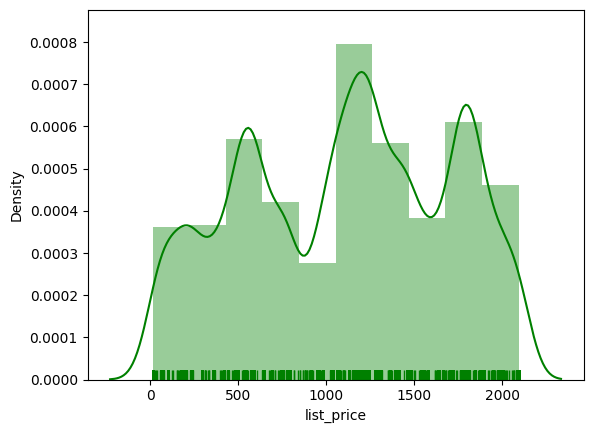

In [17]:
sns.distplot(transaction_df['list_price'], bins=10, hist=True, kde=True, rug=True, fit=None, color='g', vertical=False)

# kde是高斯分布密度图，绘图在0-1之间
# hist是否画直方图
# rug在X轴上画一些分布线
# fit可以制定某个分布进行拟合
# verticalbool, optional If True, observed values are on y-axis.
# 不同bill出现的频数直方图 hist=True

<Axes: xlabel='list_price', ylabel='Count'>

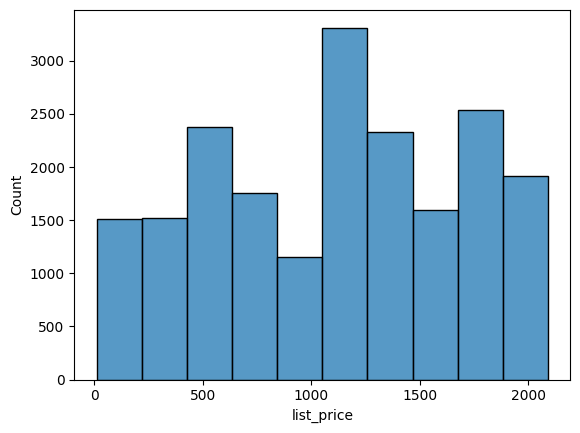

In [18]:
sns.histplot(x='list_price', data=transaction_df, bins=10)

<Axes: xlabel='standard_cost', ylabel='Count'>

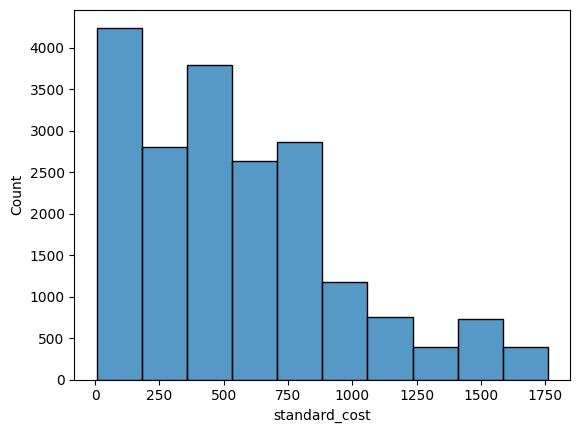

In [19]:
sns.histplot(x='standard_cost', data=transaction_df, bins=10)

<Axes: xlabel='profit', ylabel='Count'>

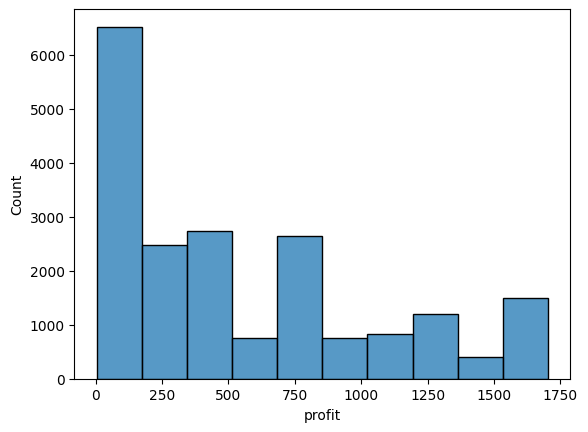

In [20]:
sns.histplot(x='profit', data=transaction_df, bins=10)

## Multivariate visualizations

<Axes: xlabel='online_order', ylabel='profit'>

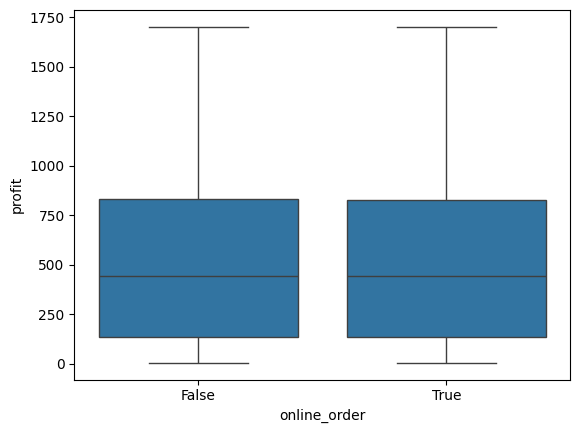

In [21]:
sns.boxplot(x='online_order', y='profit', data=transaction_df)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

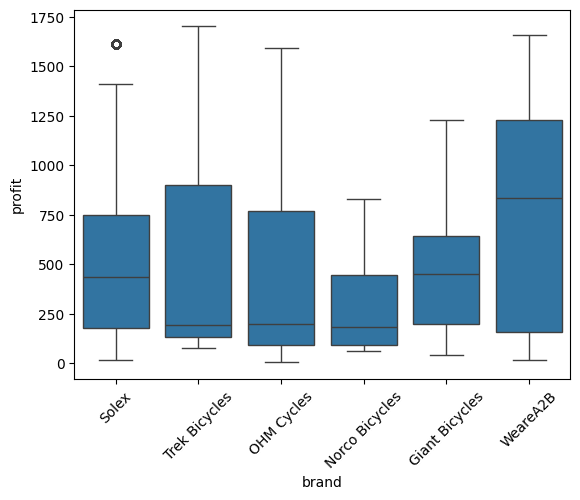

In [22]:
sns.boxplot(x='brand', y='profit', data=transaction_df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

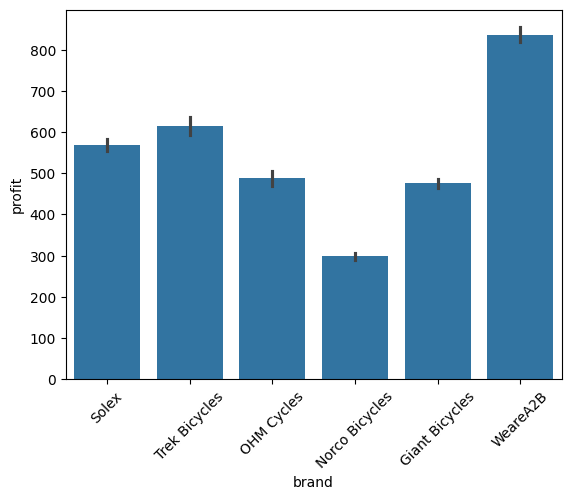

In [23]:
sns.barplot(x='brand', y='profit', estimator=np.mean, data=transaction_df)
plt.xticks(rotation=45)

<Axes: xlabel='product_line', ylabel='profit'>

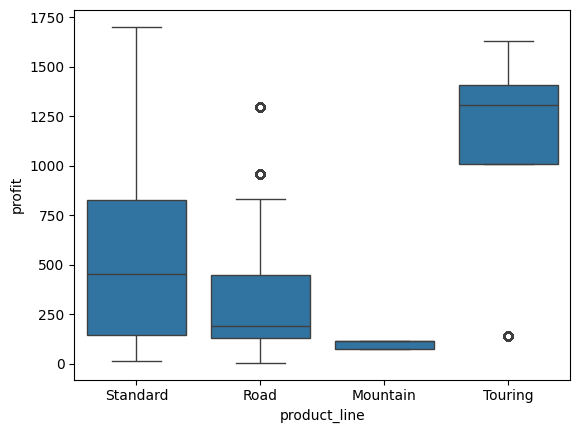

In [24]:
sns.boxplot(x='product_line', y='profit', data=transaction_df)

<Axes: xlabel='product_class', ylabel='profit'>

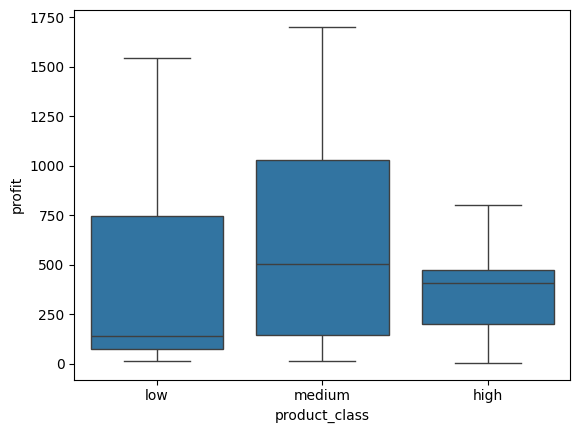

In [25]:
sns.boxplot(x='product_class', y='profit', data=transaction_df, order=['low', 'medium', 'high'])

<Axes: xlabel='product_size', ylabel='profit'>

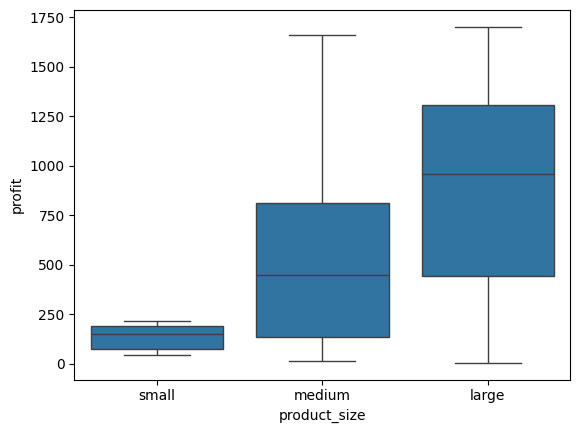

In [26]:
sns.boxplot(x='product_size', y='profit', data=transaction_df, order=['small', 'medium', 'large'])

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

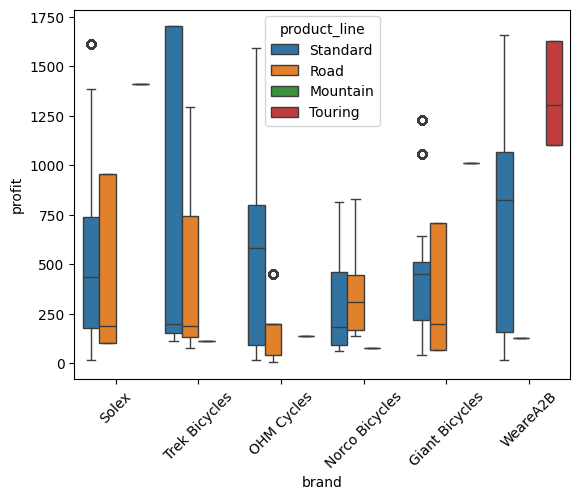

In [27]:
sns.boxplot(x='brand', y='profit', hue='product_line', data=transaction_df)
plt.xticks(rotation=45)

# The profit of touring product gets boosted by WeareA2B
# The standard product for Trek is extremely right skewed

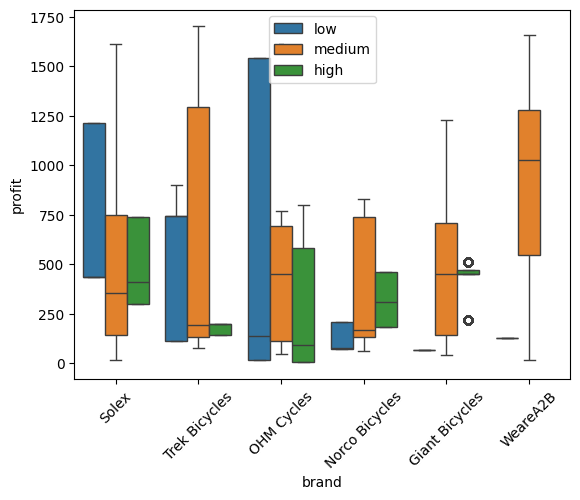

In [28]:
sns.boxplot(x='brand', y='profit', hue='product_class', hue_order=['low', 'medium', 'high'], data=transaction_df)
plt.xticks(rotation=45)
plt.legend(loc='upper center')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

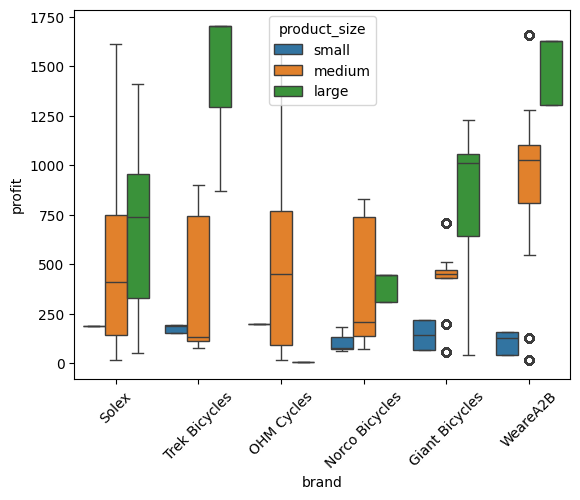

In [29]:
sns.boxplot(x='brand', y='profit', hue='product_size', hue_order=['small', 'medium', 'large'], data=transaction_df)
plt.xticks(rotation=45)

# Large products often have greater profits, except for OHM Cycles and Norco Bicycles

<Axes: xlabel='product_line', ylabel='profit'>

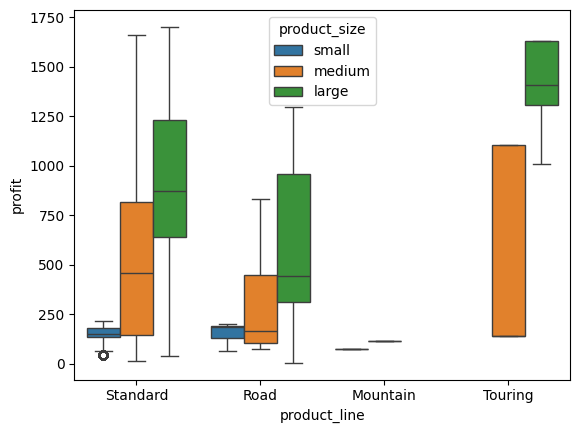

In [30]:
sns.boxplot(x='product_line', y='profit', hue='product_size', hue_order=['small', 'medium', 'large'], data=transaction_df)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

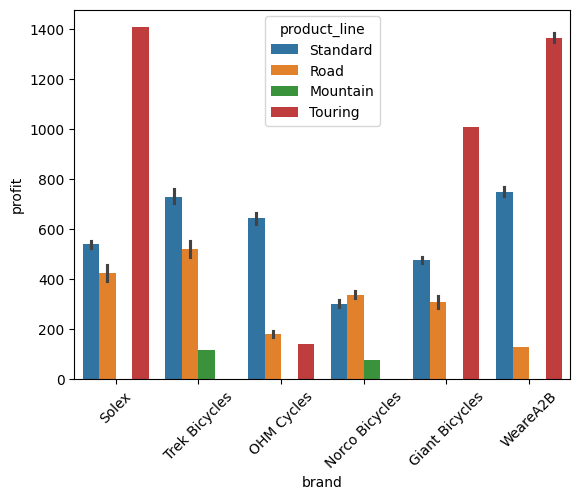

In [31]:
sns.barplot(x='brand', y='profit', hue='product_line', estimator=np.mean, data=transaction_df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

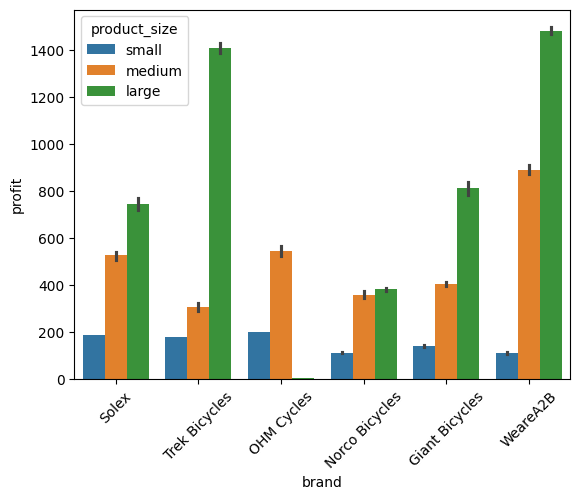

In [32]:
sns.barplot(x='brand', y='profit', hue='product_size', hue_order=['small', 'medium', 'large'], estimator=np.mean, data=transaction_df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

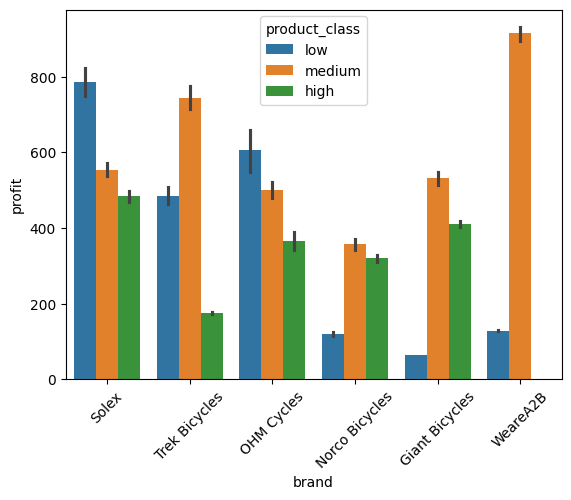

In [33]:
sns.barplot(x='brand', y='profit', hue='product_class', hue_order=['low', 'medium', 'high'], estimator=np.mean, data=transaction_df)
plt.xticks(rotation=45)

# Product with low and medium class have higher profit than high product class for Solex, Trek, and OHM
# However, it's not the case for Norco and Giant

# EDA for customer demographic

In [34]:
demographic_df = pd.read_excel('/content/Project 1_ KPMG_VI_New_raw_data_update_final.xlsx','CustomerDemographic')
address_df = pd.read_excel('/content/Project 1_ KPMG_VI_New_raw_data_update_final.xlsx','CustomerAddress')

In [35]:
address_df.columns = address_df.iloc[0]
address_df = address_df.drop(index=address_df.index[0])
address_df

0    customer_id                    address postcode            state  \
1              1         060 Morning Avenue     2016  New South Wales   
2              2        6 Meadow Vale Court     2153  New South Wales   
3              4         0 Holy Cross Court     4211              QLD   
4              5        17979 Del Mar Point     2448  New South Wales   
5              6           9 Oakridge Court     3216              VIC   
...          ...                        ...      ...              ...   
3995        3999            1482 Hauk Trail     3064              VIC   
3996        4000  57042 Village Green Point     4511              QLD   
3997        4001     87 Crescent Oaks Alley     2756              NSW   
3998        4002           8194 Lien Street     4032              QLD   
3999        4003            320 Acker Drive     2251              NSW   

0       country property_valuation  
1     Australia                 10  
2     Australia                 10  
3     Australia                  9  
4     Australia                  4  
5     Australia                  9  
...         ...                ...  
3995  Australia                  3  
3996  Australia                  6  
3997  Australia                 10  
3998  Australia                  7  
3999  Australia                  7  

[3999 rows x 6 columns]

In [36]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   name                                 4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   DOB                                  3913 non-null   object 
 5   age                                  3999 non-null   float64
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [37]:
demographic_df.describe()

customer_id  past_3_years_bike_related_purchases          age  \
count  4000.000000                          4000.000000  3999.000000   
mean   2000.500000                            48.890000    49.437359   
std    1154.844867                            28.715005    16.816790   
min       1.000000                             0.000000    23.000000   
25%    1000.750000                            24.000000    39.000000   
50%    2000.500000                            48.000000    48.000000   
75%    3000.250000                            73.000000    58.000000   
max    4000.000000                            99.000000   125.000000   

            tenure  
count  3913.000000  
mean     10.657041  
std       5.660146  
min       1.000000  
25%       6.000000  
50%      11.000000  
75%      15.000000  
max      22.000000

In [38]:
demographic_df.columns

Index(['customer_id', 'name', 'gender', 'past_3_years_bike_related_purchases',
       'DOB', 'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure'],
      dtype='object')

## Univariate visualizations

<Axes: xlabel='gender', ylabel='count'>

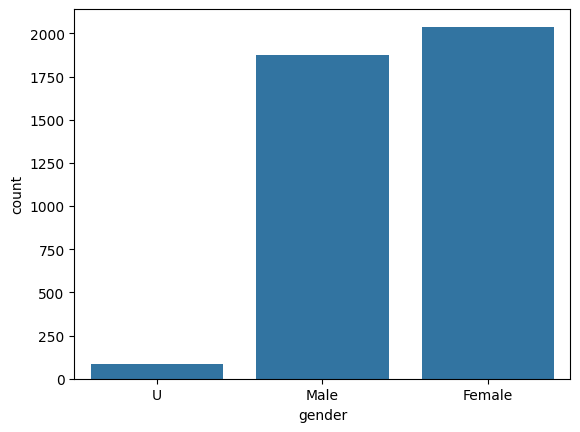

In [39]:
sns.countplot(x='gender', data=demographic_df)

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

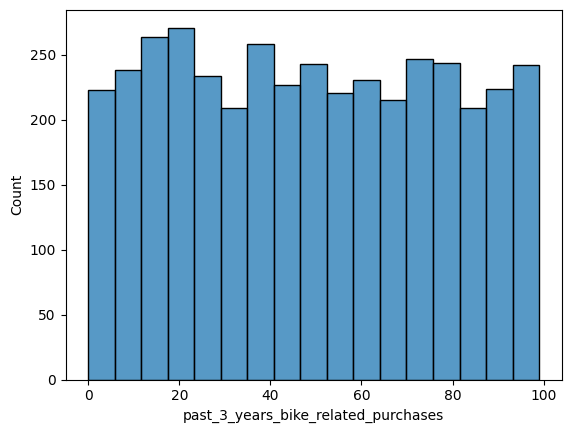

In [40]:
sns.histplot(x='past_3_years_bike_related_purchases', data=demographic_df)

In [41]:
demographic_df['age'] = pd.to_numeric(demographic_df['age'], errors='coerce')

<Axes: xlabel='age', ylabel='Count'>

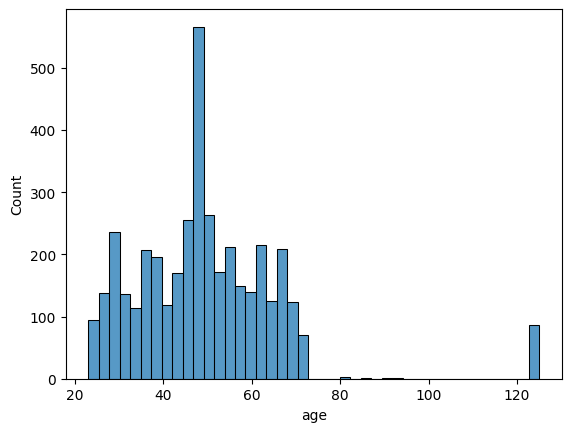

In [42]:
sns.histplot(x='age', data=demographic_df)

In [43]:
# Look for the rows with age greater than 120

age120 = demographic_df[demographic_df['age'] > 120]
age120.head(10)

customer_id                name gender  \
1           144     Jory Barrabeale      U   
2           168    Reggie Broggetti      U   
3           267       Edgar Buckler      U   
4           290      Giorgio Kevane      U   
5           451    Marlow Flowerdew      U   
6           453  Cornelius Yarmouth      U   
7           454      Eugenie Domenc      U   
8           480         Darelle Ive      U   
9           513         Kienan Soar      U   
10          526            Ardelle       U   

    past_3_years_bike_related_purchases  DOB    age  \
1                                    71  NaN  125.0   
2                                     8  NaN  125.0   
3                                    53  NaN  125.0   
4                                    42  NaN  125.0   
5                                    37  NaN  125.0   
6                                    81  NaN  125.0   
7                                    58  NaN  125.0   
8                                    67  NaN  125.0   
9                                    30  NaN  125.0   
10                                    9  NaN  125.0   

                     job_title job_industry_category     wealth_segment  \
1           Environmental Tech                    IT      Mass Customer   
2              General Manager                    IT  Affluent Customer   
3                          NaN                    IT     High Net Worth   
4       Senior Sales Associate                    IT      Mass Customer   
5   Quality Control Specialist                    IT     High Net Worth   
6          Assistant Professor                    IT     High Net Worth   
7               Research Nurse                Health  Affluent Customer   
8             Registered Nurse                Health      Mass Customer   
9               Tax Accountant                    IT      Mass Customer   
10               Social Worker                Health      Mass Customer   

   deceased_indicator owns_car  tenure  
1                   N       No     NaN  
2                   N      Yes     NaN  
3                   N       No     NaN  
4                   N       No     NaN  
5                   N       No     NaN  
6                   N       No     NaN  
7                   N      Yes     NaN  
8                   N      Yes     NaN  
9                   N       No     NaN  
10                  N      Yes     NaN

In [44]:
# Finding: those with age over 120 also have unidentified gender

age120['gender'].unique()

array(['U'], dtype=object)

In [45]:
age120['job_industry_category'].unique()

array(['IT', 'Health', 'Financial Services', 'Manufacturing'],
      dtype=object)

In [46]:
age120['wealth_segment'].value_counts()

wealth_segment
Mass Customer        46
High Net Worth       25
Affluent Customer    16
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Property'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Agriculture'),
  Text(8, 0, 'Telecommunications')])

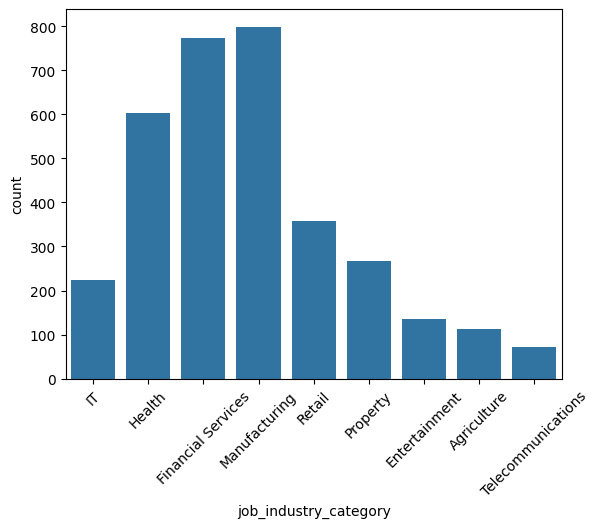

In [47]:
sns.countplot(x='job_industry_category', data=demographic_df)
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'Affluent Customer'),
  Text(2, 0, 'High Net Worth')])

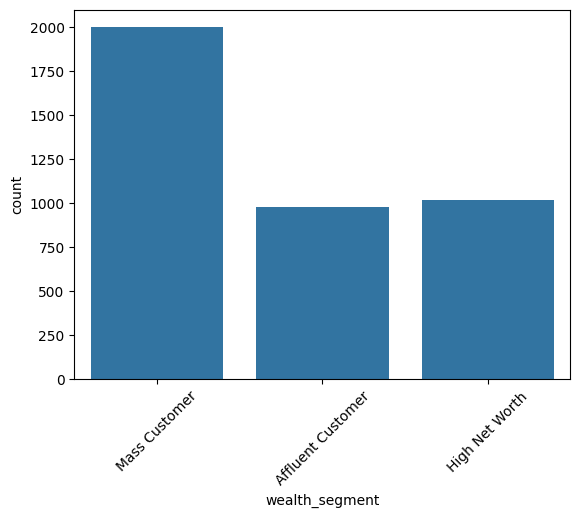

In [48]:
sns.countplot(x='wealth_segment', data=demographic_df, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'N'), Text(1, 0, 'Y')])

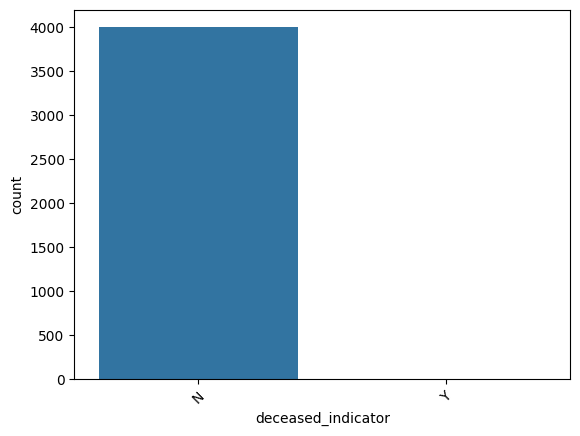

In [49]:
sns.countplot(x='deceased_indicator', data=demographic_df)
plt.xticks(rotation=45)

In [50]:
demographic_df[demographic_df['deceased_indicator'] == 'Y'].shape

(2, 12)

<Axes: xlabel='owns_car', ylabel='count'>

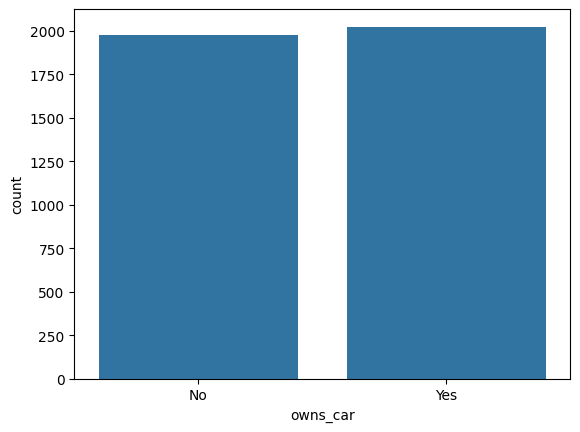

In [51]:
sns.countplot(x='owns_car', data=demographic_df)

In [52]:
demographic_df['tenure'] = pd.to_numeric(demographic_df['tenure'], errors='coerce')

<Axes: xlabel='tenure', ylabel='Count'>

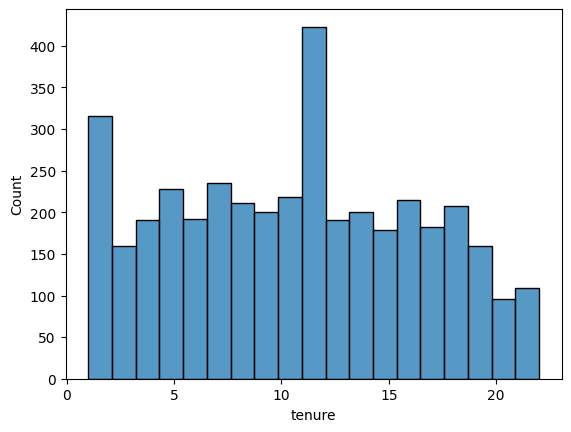

In [53]:
sns.histplot(x='tenure', data=demographic_df)

## Multivariate visualizations

([0, 1, 2],
 [Text(0, 0, 'Mass Customer'),
  Text(1, 0, 'Affluent Customer'),
  Text(2, 0, 'High Net Worth')])

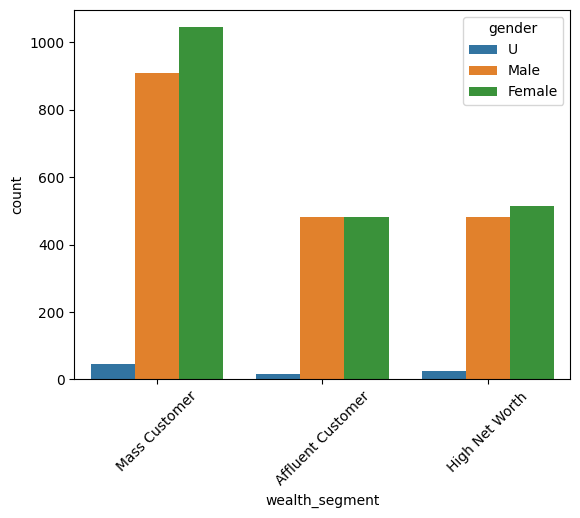

In [54]:
sns.countplot(x='wealth_segment', data=demographic_df, hue='gender', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Property'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Agriculture'),
  Text(8, 0, 'Telecommunications')])

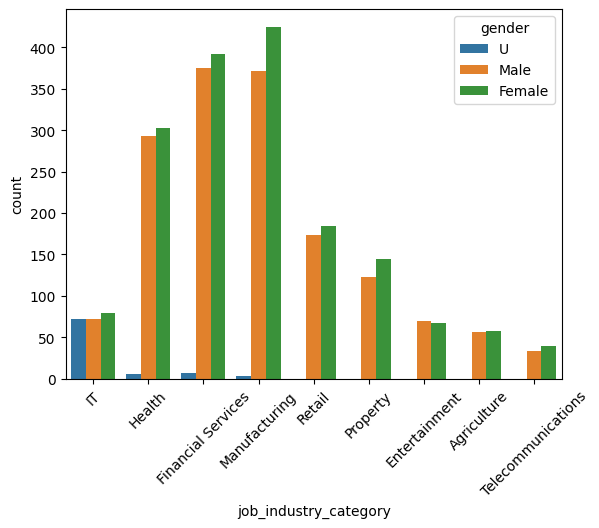

In [55]:
sns.countplot(x='job_industry_category', data=demographic_df, hue='gender')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Property'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Agriculture'),
  Text(8, 0, 'Telecommunications')])

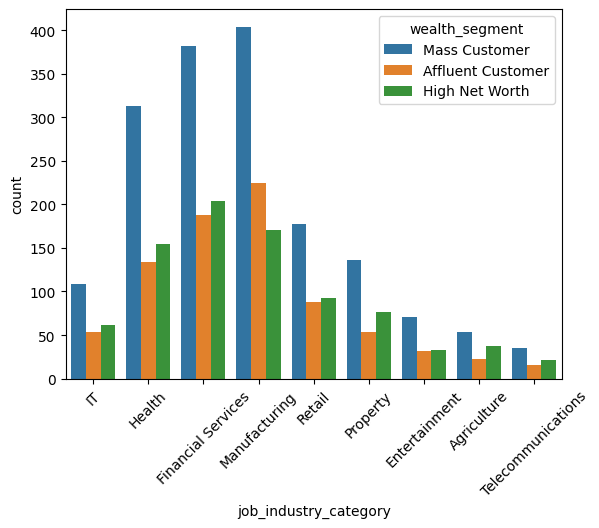

In [56]:
sns.countplot(x='job_industry_category', data=demographic_df, hue='wealth_segment', hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
plt.xticks(rotation=45)

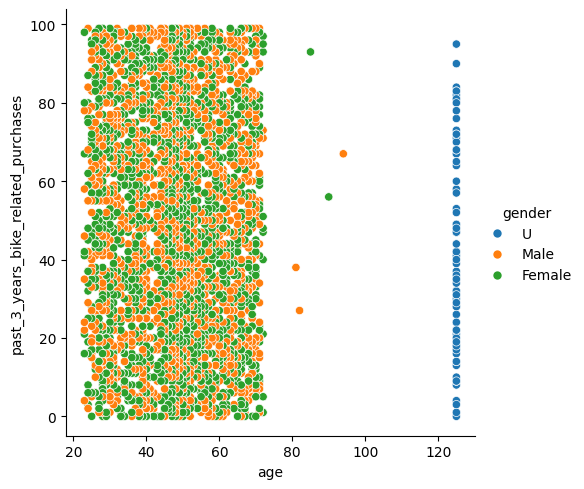

In [57]:
sns.relplot(x='age', y='past_3_years_bike_related_purchases', hue='gender', data=demographic_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Financial Services'),
  Text(3, 0, 'Manufacturing'),
  Text(4, 0, 'Retail'),
  Text(5, 0, 'Property'),
  Text(6, 0, 'Entertainment'),
  Text(7, 0, 'Agriculture'),
  Text(8, 0, 'Telecommunications')])

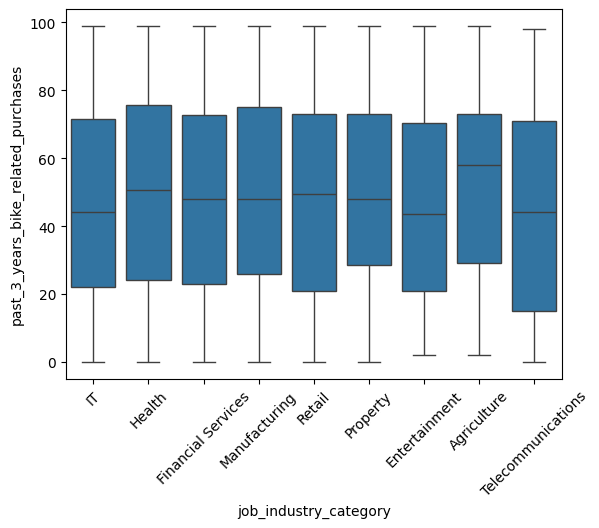

In [58]:
sns.boxplot(x='job_industry_category', y='past_3_years_bike_related_purchases', data=demographic_df)
plt.xticks(rotation=45)

# Customer working in the agriculture industry have the highest average number of purchases

<Axes: xlabel='wealth_segment', ylabel='past_3_years_bike_related_purchases'>

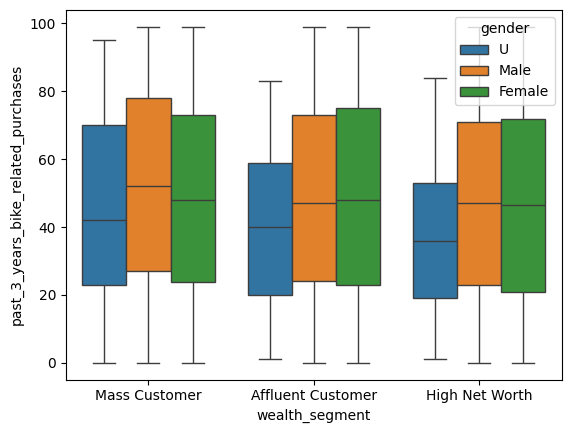

In [59]:
sns.boxplot(x='wealth_segment', y='past_3_years_bike_related_purchases', hue='gender', data=demographic_df, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])

<Axes: xlabel='wealth_segment', ylabel='tenure'>

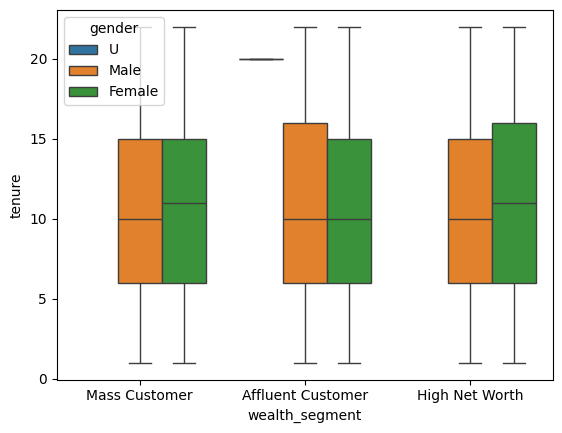

In [60]:
sns.boxplot(x='wealth_segment', y='tenure', hue='gender', data=demographic_df, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])

<Axes: xlabel='owns_car', ylabel='past_3_years_bike_related_purchases'>

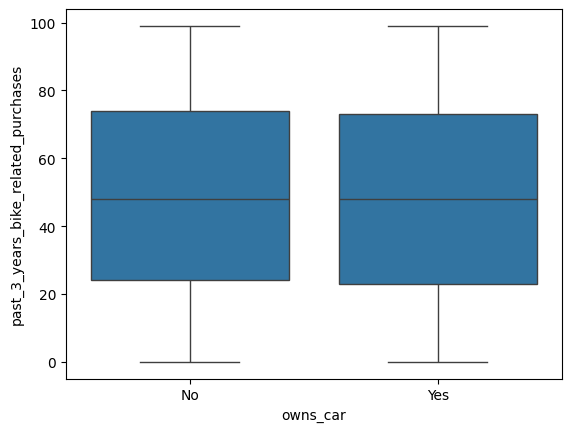

In [61]:
sns.boxplot(x='owns_car', y='past_3_years_bike_related_purchases', data=demographic_df)

<Axes: xlabel='owns_car', ylabel='tenure'>

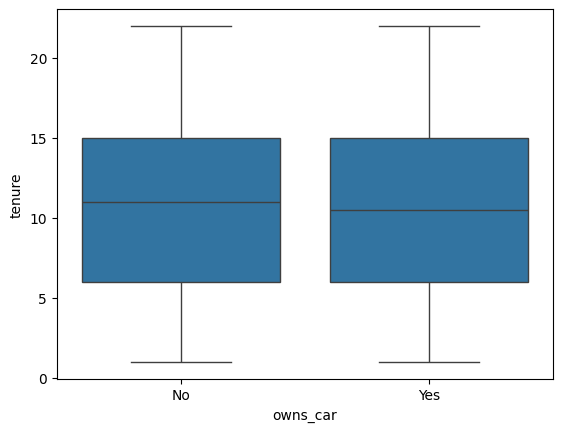

In [62]:
sns.boxplot(x='owns_car', y='tenure', data=demographic_df)

In [63]:
unidentified_gender = demographic_df[demographic_df['gender'] == 'U']
unidentified_gender.head()

customer_id               name gender  past_3_years_bike_related_purchases  \
0           34  Jephthah Bachmann      U                                   59   
1          144    Jory Barrabeale      U                                   71   
2          168   Reggie Broggetti      U                                    8   
3          267      Edgar Buckler      U                                   53   
4          290     Giorgio Kevane      U                                   42   

          DOB    age               job_title job_industry_category  \
0  1843-12-21    NaN         Legal Assistant                    IT   
1         NaN  125.0      Environmental Tech                    IT   
2         NaN  125.0         General Manager                    IT   
3         NaN  125.0                     NaN                    IT   
4         NaN  125.0  Senior Sales Associate                    IT   

      wealth_segment deceased_indicator owns_car  tenure  
0  Affluent Customer                  N       No    20.0  
1      Mass Customer                  N       No     NaN  
2  Affluent Customer                  N      Yes     NaN  
3     High Net Worth                  N       No     NaN  
4      Mass Customer                  N       No     NaN

In [64]:
unidentified_gender['age'].unique()

array([ nan, 125.])

# EDA for customer address

In [65]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [66]:
address_df.describe()

0       customer_id           address  postcode state    country  \
count          3999              3999      3999  3999       3999   
unique         3999              3996       873     5          1   
top            4003  3 Talisman Place      2170   NSW  Australia   
freq              1                 2        31  2054       3999   

0       property_valuation  
count                 3999  
unique                  12  
top                      9  
freq                   647

In [67]:
address_df.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

## Univariate

<Axes: xlabel='state', ylabel='count'>

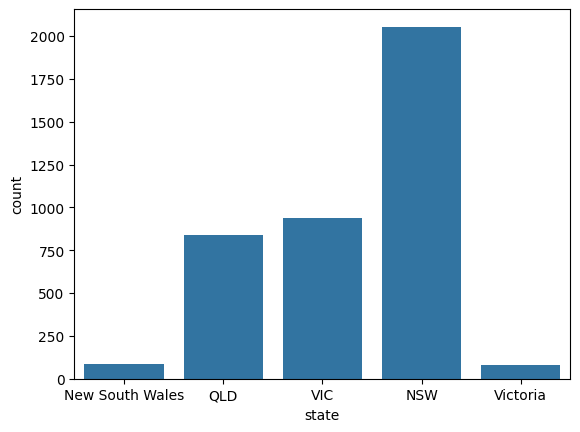

In [68]:
sns.countplot(x='state', data=address_df)

In [69]:
address_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [70]:
# Keep the format consistent for "state" column

In [71]:
address_df['state'] = address_df['state'].replace({
    'New South Wales': 'NSW',
    'Victoria': 'VIC'
})

In [72]:
address_df['state'].unique()

array(['NSW', 'QLD', 'VIC'], dtype=object)

<Axes: xlabel='property_valuation', ylabel='Count'>

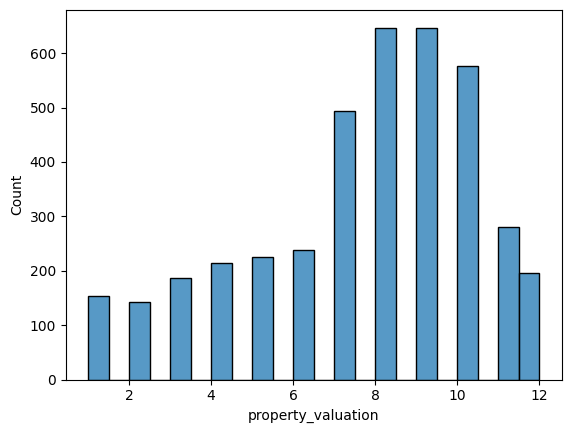

In [73]:
address_df['property_valuation'] = pd.to_numeric(address_df['property_valuation'], errors='coerce')

sns.histplot(x='property_valuation', data=address_df)

In [74]:
address_df['property_valuation'].unique()

array([10,  9,  4, 12,  8,  6,  7,  3,  5, 11,  1,  2])

In [75]:
# not meaningful for visualization due to the overly large unique values
address_df['address'].nunique()

3996

In [76]:
# not meaningful for visualization due to no variance in the column
address_df['country'].nunique()

1

## Multivariate

<Axes: xlabel='state', ylabel='property_valuation'>

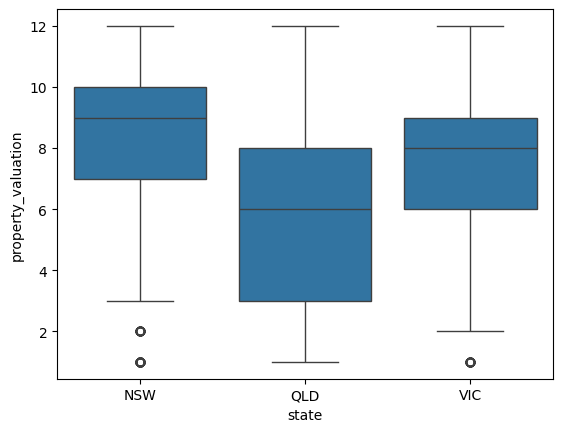

In [77]:
sns.boxplot(x='state', y='property_valuation', data=address_df)

# Merge three datasets & Furthur EDA

In [78]:
full_df = transaction_df.merge(demographic_df, how='left', on='customer_id').merge(address_df, how='left', on='customer_id')

In [79]:
full_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

<Axes: xlabel='gender', ylabel='profit'>

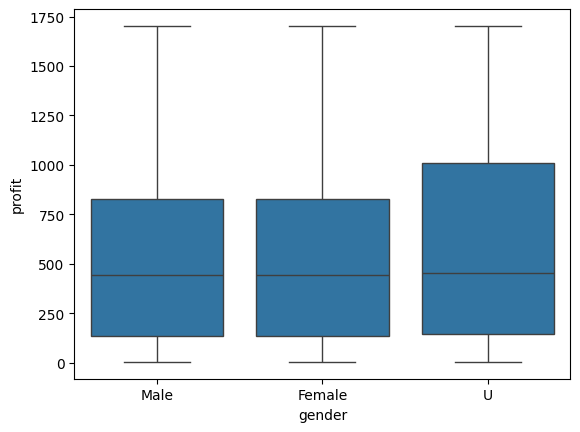

In [80]:
sns.boxplot(x='gender', y='profit', data=full_df)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

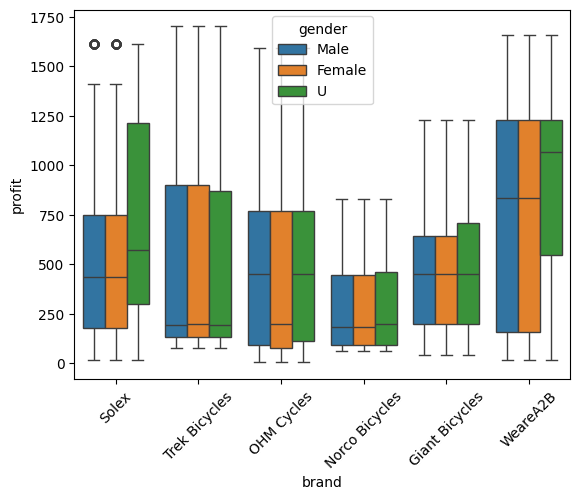

In [81]:
sns.boxplot(x='brand', y='profit', hue='gender', data=full_df)
plt.xticks(rotation=45)


<Axes: xlabel='wealth_segment', ylabel='profit'>

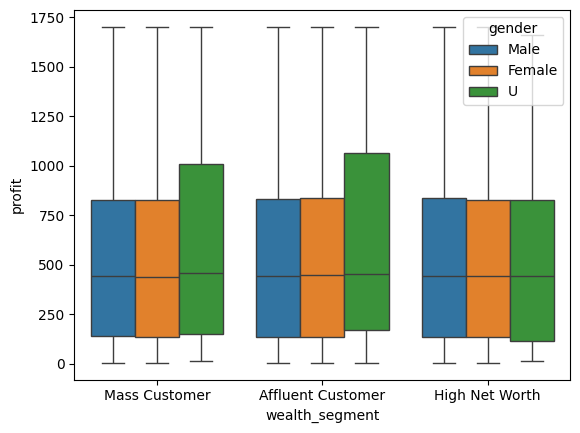

In [82]:
sns.boxplot(x='wealth_segment', y='profit', hue='gender', data=full_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Financial Services'),
  Text(1, 0, 'Health'),
  Text(2, 0, 'Retail'),
  Text(3, 0, 'Property'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Entertainment'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'Agriculture'),
  Text(8, 0, 'Telecommunications')])

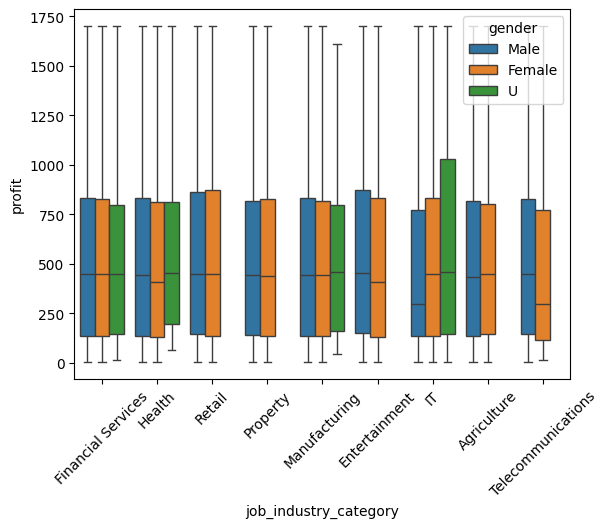

In [83]:
sns.boxplot(x='job_industry_category', y='profit', hue='gender', data=full_df)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Solex'),
  Text(1, 0, 'Trek Bicycles'),
  Text(2, 0, 'OHM Cycles'),
  Text(3, 0, 'Norco Bicycles'),
  Text(4, 0, 'Giant Bicycles'),
  Text(5, 0, 'WeareA2B')])

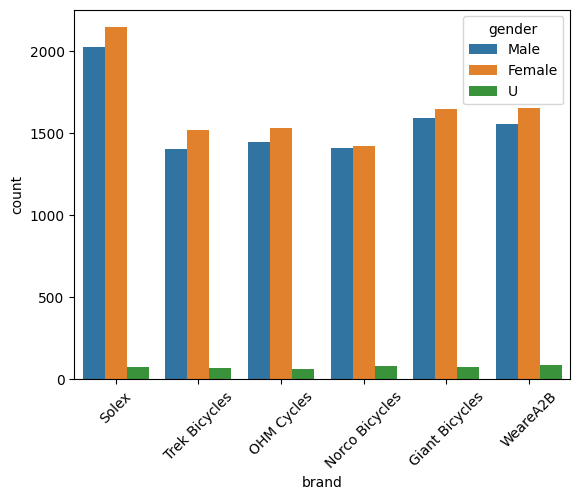

In [84]:
sns.countplot(x='brand', hue='gender', data=full_df)
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Standard'),
  Text(1, 0, 'Road'),
  Text(2, 0, 'Mountain'),
  Text(3, 0, 'Touring')])

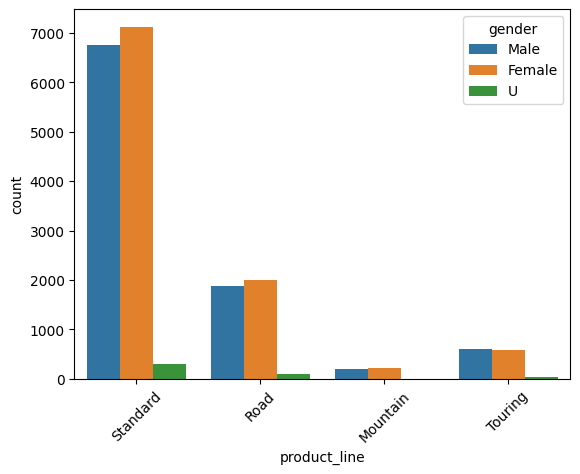

In [85]:
sns.countplot(x='product_line', hue='gender', data=full_df)
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'medium'), Text(1, 0, 'large'), Text(2, 0, 'small')])

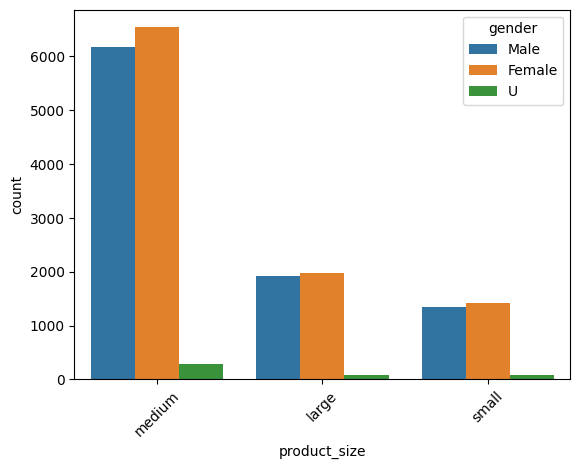

In [86]:
sns.countplot(x='product_size', hue='gender', data=full_df)
plt.xticks(rotation=45)

([0, 1, 2], [Text(0, 0, 'medium'), Text(1, 0, 'low'), Text(2, 0, 'high')])

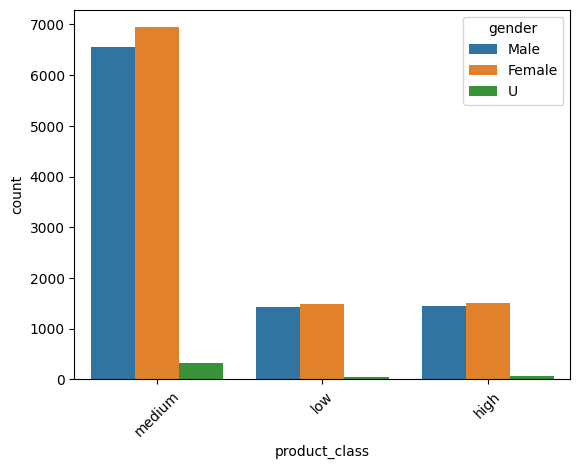

In [87]:
sns.countplot(x='product_class', hue='gender', data=full_df)
plt.xticks(rotation=45)

<Axes: xlabel='wealth_segment', ylabel='profit'>

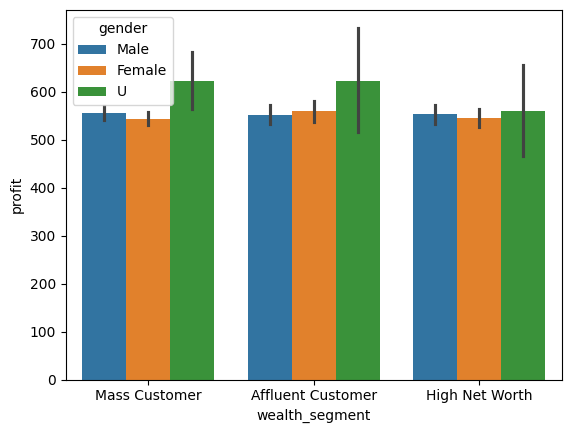

In [88]:
sns.barplot(x='wealth_segment', y='profit', hue='gender', data=full_df)

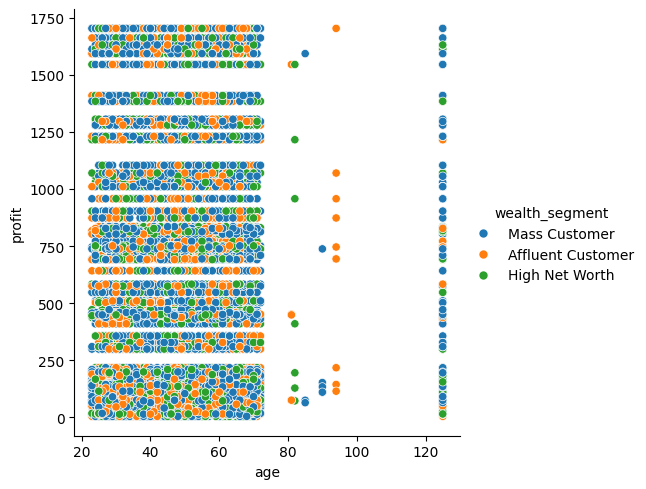

In [89]:
sns.relplot(x='age', y='profit', hue='wealth_segment', data=full_df)

## sns.catplot(): product class, product size, gender...

*explore with hue*

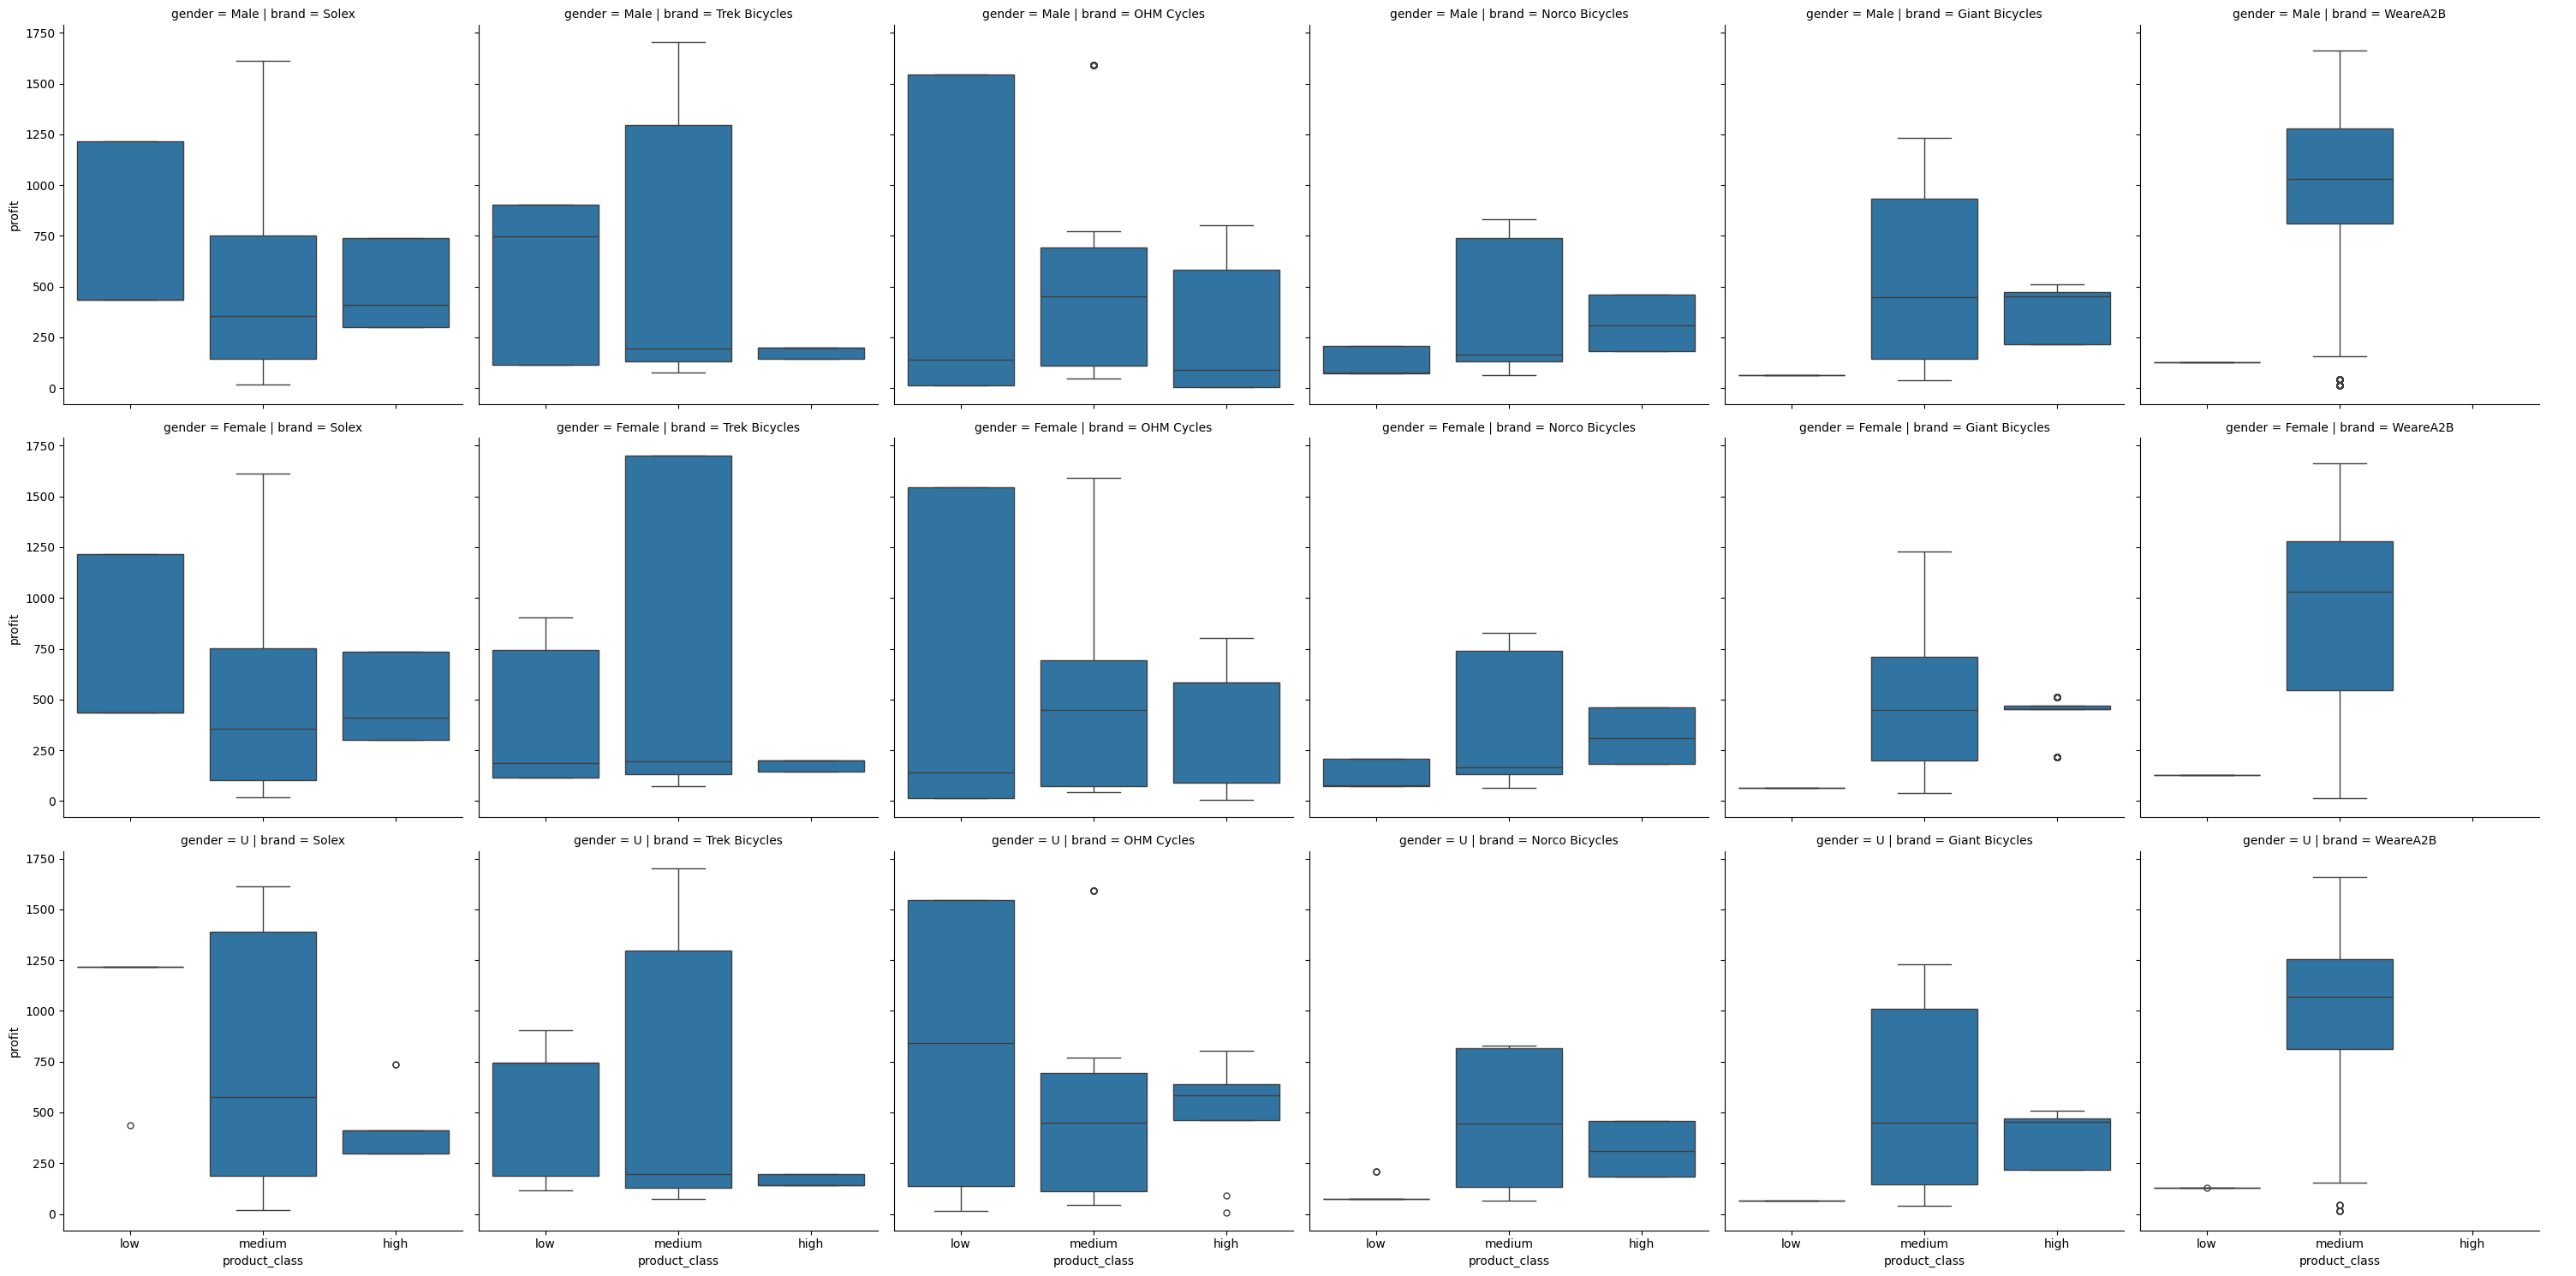

In [90]:
sns.catplot(data=full_df, kind='box', x='product_class', y='profit', hue=None, row='gender', col='brand', order=['low', 'medium', 'high'])

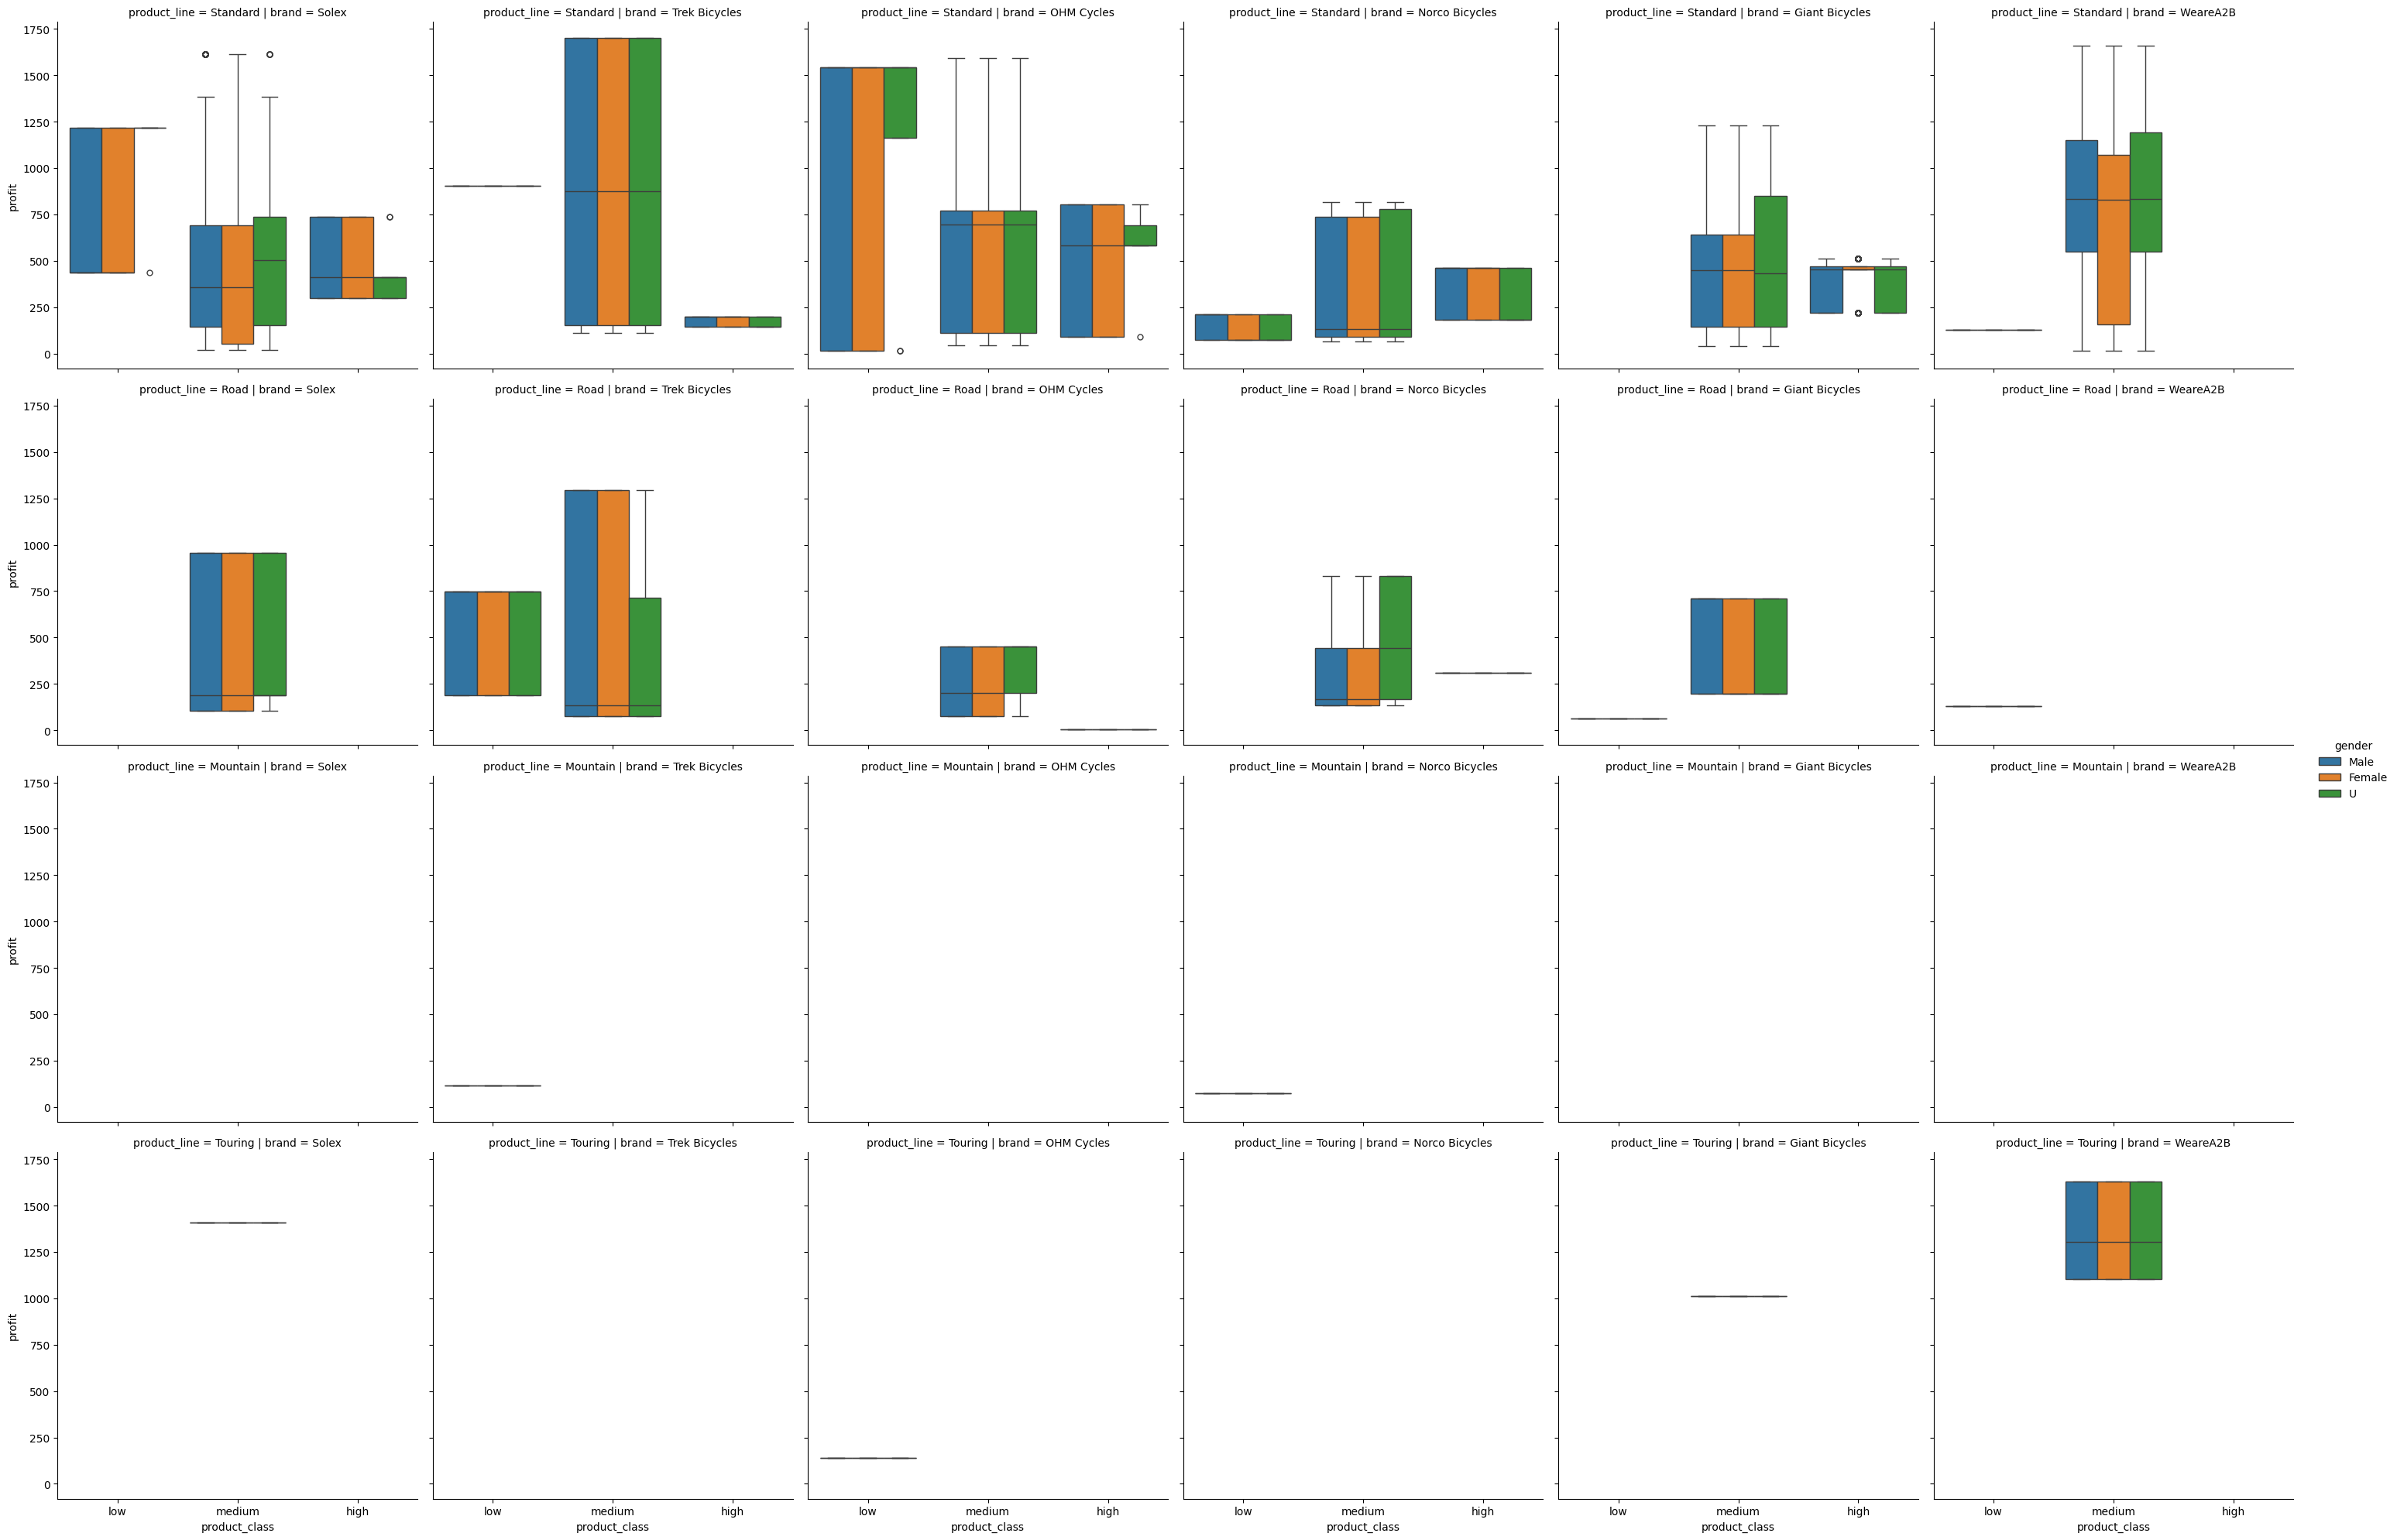

In [91]:
sns.catplot(data=full_df, kind='box', x='product_class', y='profit', hue='gender', row='product_line', col='brand', order=['low', 'medium', 'high'])

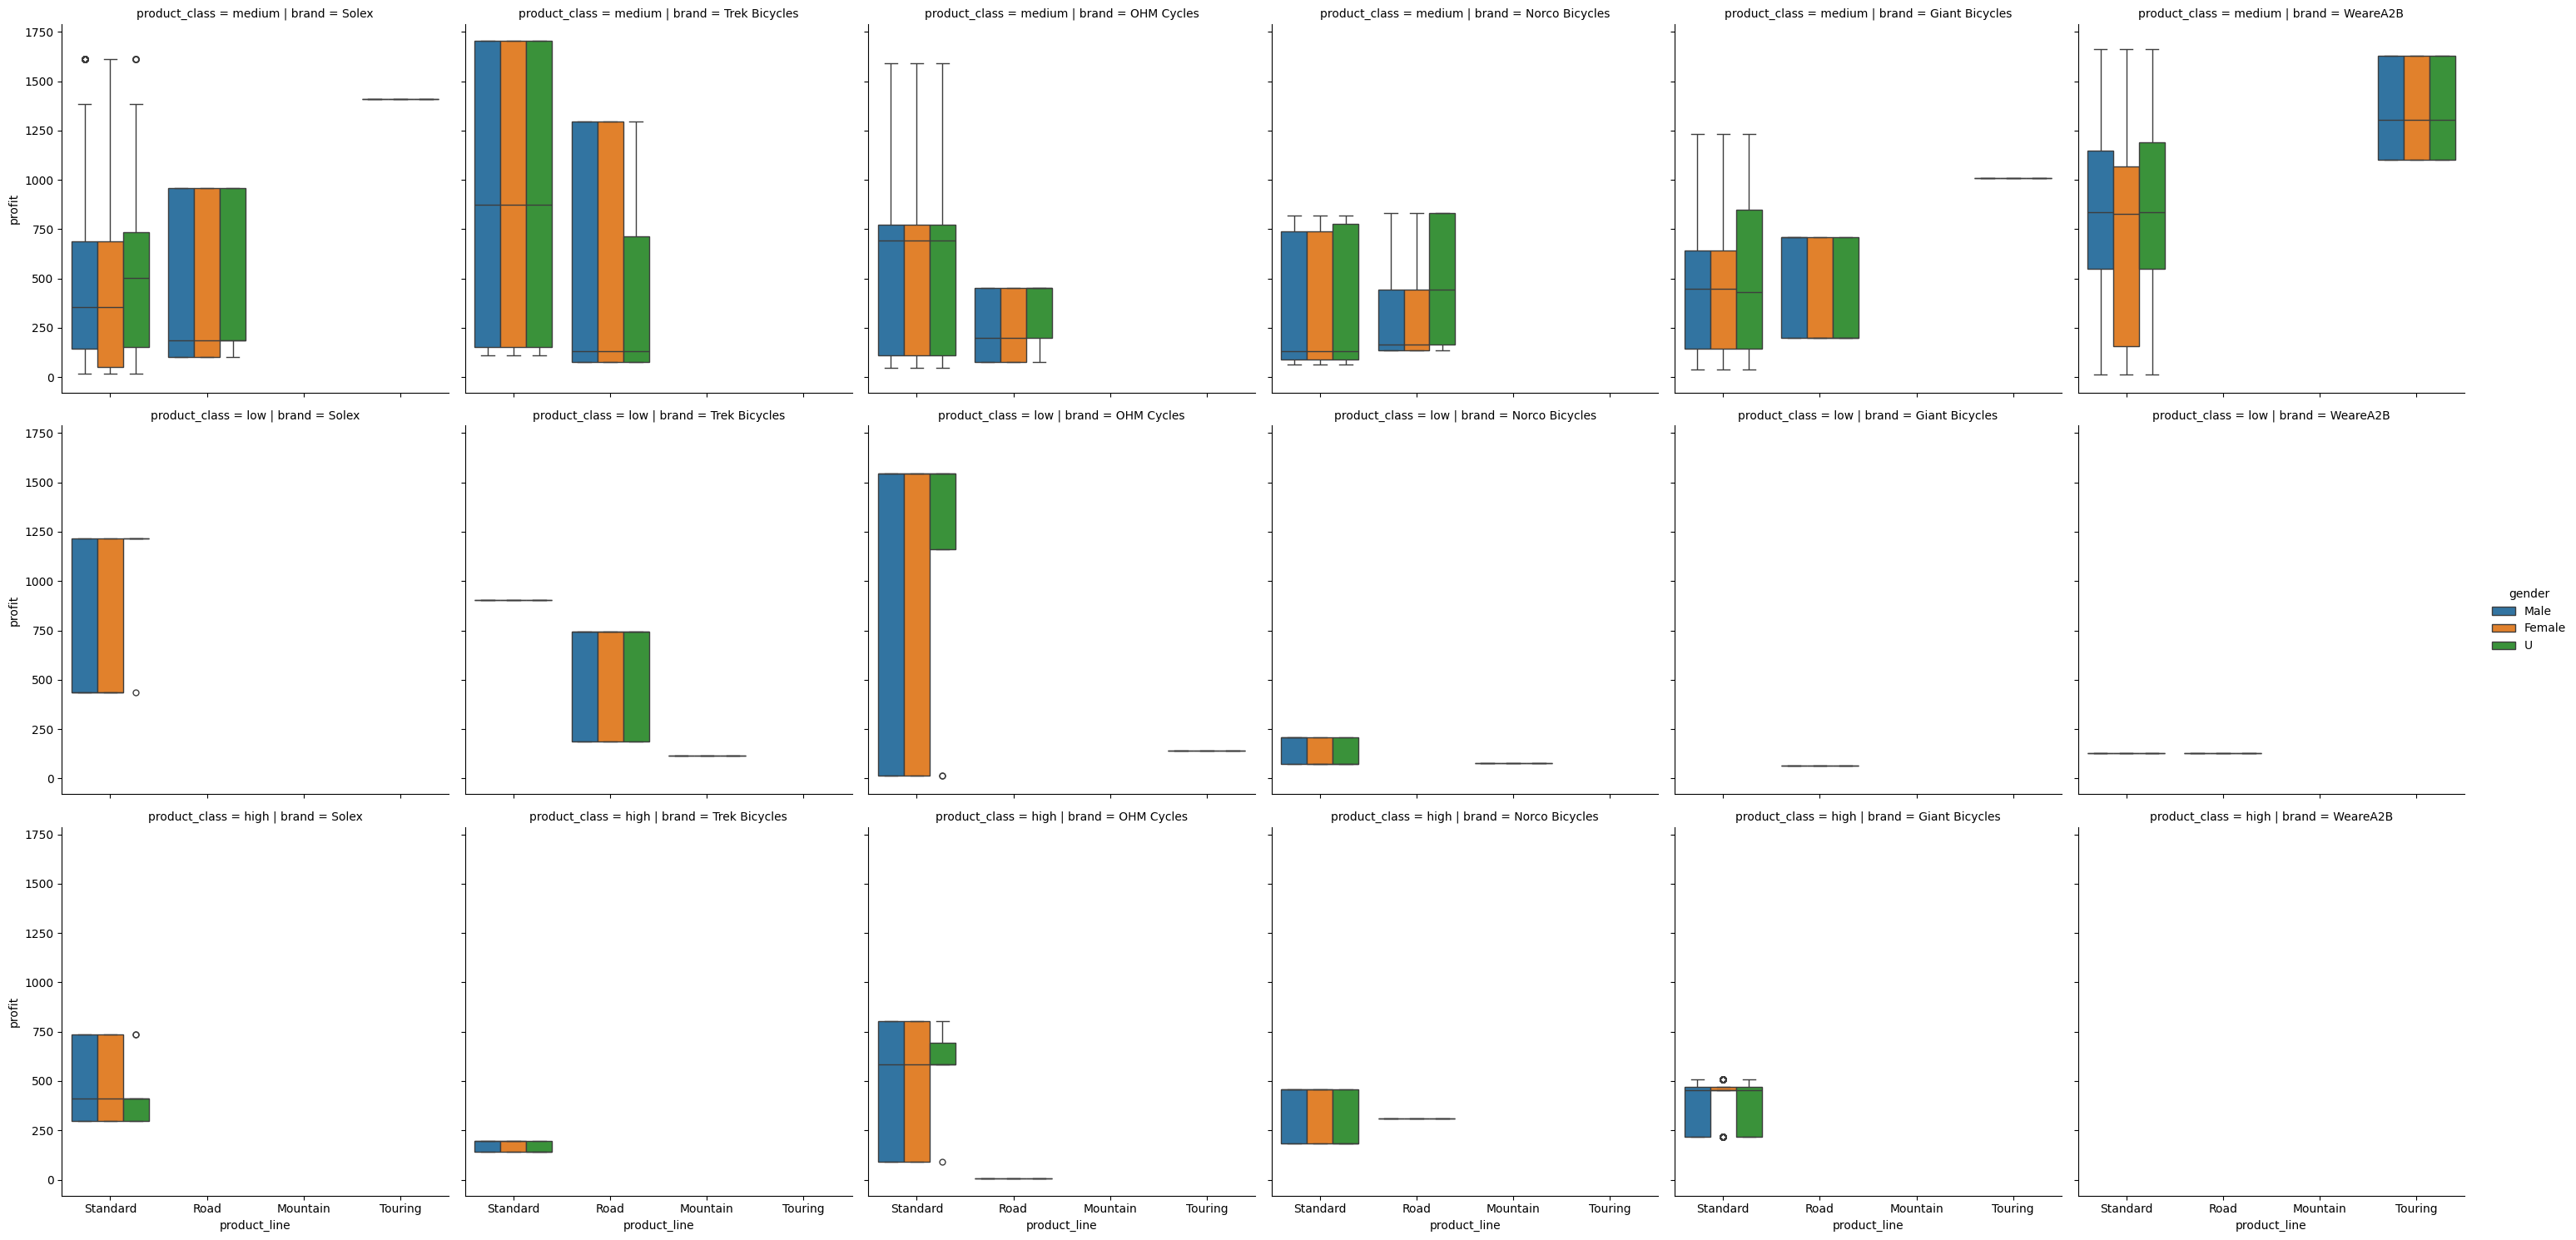

In [92]:
sns.catplot(data=full_df, kind='box', x='product_line', y='profit', hue='gender', row='product_class', col='brand')

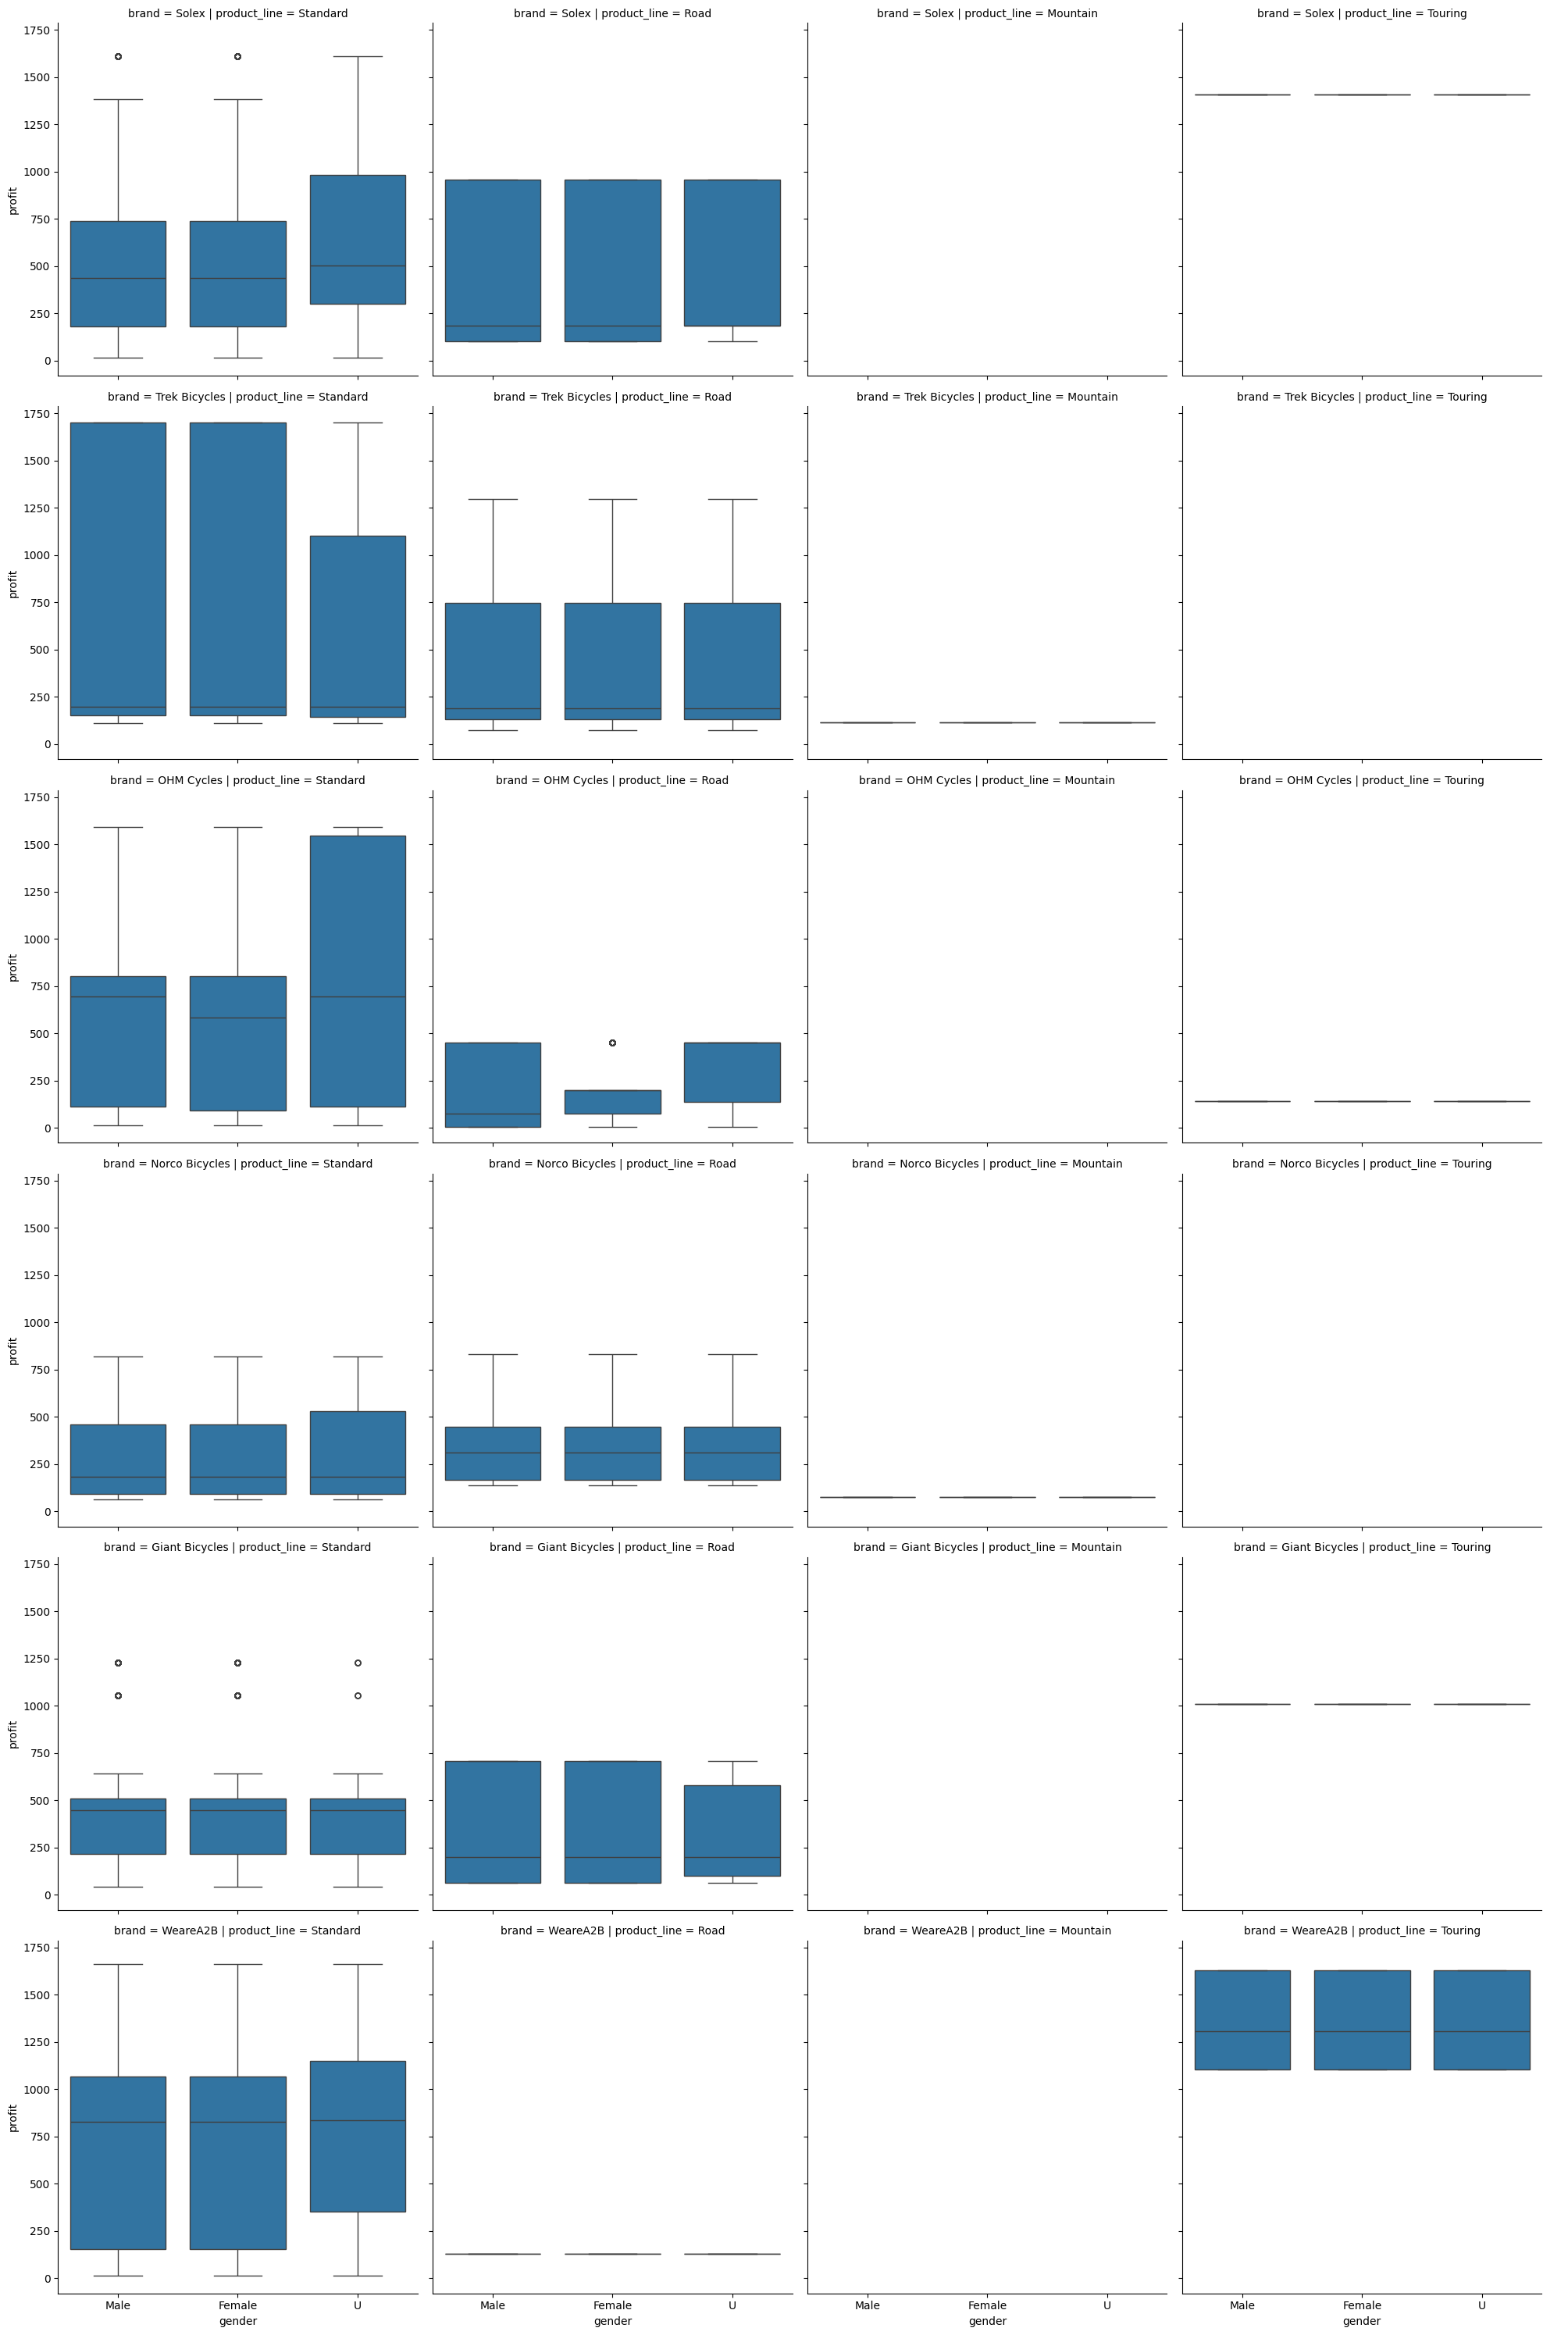

In [93]:
sns.catplot(data=full_df, kind='box', x='gender', y='profit', hue=None, row='brand', col='product_line')

<Axes: xlabel='product_line', ylabel='count'>

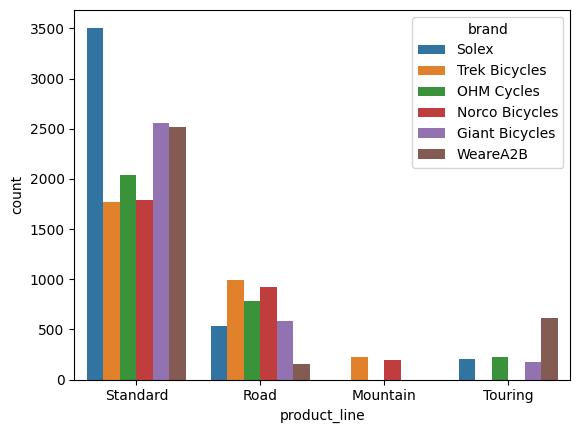

In [94]:
sns.countplot(x='product_line', hue='brand', data=full_df)

<Axes: xlabel='product_size', ylabel='count'>

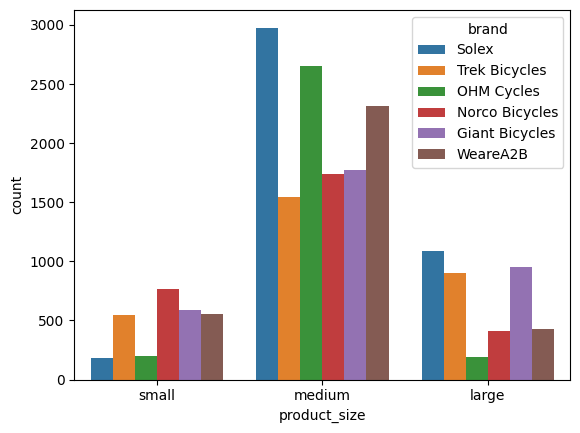

In [95]:
sns.countplot(x='product_size', hue='brand', data=full_df, order=['small', 'medium', 'large'])

# Data Cleaning - Imputing missing value

In [96]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction_id                       20000 non-null  object 
 1   product_id                           20000 non-null  object 
 2   customer_id                          20000 non-null  object 
 3   transaction_date                     20000 non-null  object 
 4   online_order                         19640 non-null  object 
 5   order_status                         20000 non-null  object 
 6   brand                                19803 non-null  object 
 7   product_line                         19803 non-null  object 
 8   product_class                        19803 non-null  object 
 9   product_size                         19803 non-null  object 
 10  list_price                           20000 non-null  float64
 11  standard_cost               

In [97]:
# Replace the ' 's with NaN
full_df = full_df.replace(" ",np.nan)
full_df = full_df.replace('U', np.nan)

# Inspect missing values in the dataset
print(full_df.isnull().values.sum())

8911


/tmp/ipython-input-994977754.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_df = full_df.replace('U', np.nan)


In [98]:
missing_cols = full_df.columns[full_df.isnull().any(axis=0)].tolist()
missing_cols

['online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'standard_cost',
 'product_first_sold_date',
 'profit',
 'name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation']

## Impute gender using first names

In [99]:
# Compute the total number of missing genders

full_df['gender'].isnull().sum()

np.int64(458)

In [100]:
full_df[full_df['gender'].isna()]['name'].unique()

array(['Yancy Ovett', 'Sanderson Alloway', 'Kain Rene', 'Fraser Acome',
       'Thorn Choffin', 'Leo Balharry', 'Rinaldo Diggin',
       'Ernestus Cruden', 'Darcey Annis', 'Casar Ritchley', 'Brenn Bacon',
       'Conroy Healy', 'Giorgio Kevane', 'Sibley Janek', 'Sol Holdron',
       'Shandie Sprigg', 'Basile Bowlas', 'Kienan Soar', 'Pieter Gadesby',
       'Caterina Scedall', 'Guinevere Kelby', 'Marlow Flowerdew',
       'Jephthah Bachmann', 'Shaylyn Riggs', 'Karlens Chaffyn',
       'Booth Birkin', 'Devin Sandeson', 'Sutherlan Truin', 'Donavon ',
       'Birk Elphey', 'Kermie Hedger', 'Glenn Tinham',
       'Cornelius Yarmouth', 'Lolita Bennie', 'Gil De Gregorio',
       'Reggie Broggetti', 'Darelle Ive', 'Eugenie Domenc',
       'Cristabel Bim', 'Faythe Janaszewski', "Krysta O' Reagan",
       'Gay Pickersgill', 'Vikky Dyde', 'Bret Ivakhnov',
       'Isabelle Bursnoll', 'Marcelia Blannin', 'Franky Nanninini',
       'Nickolas Guittet', 'Klarika Yerby', 'Harland Spilisy',
       'Geor

In [101]:
full_df['first_name'] = full_df['name'].str.split().str[0]

In [102]:
pip install gender_guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 7.4 MB/s eta 0:00:00


In [103]:
import gender_guesser.detector as gender
d = gender.Detector()

def guess_gender(first_name):
  if pd.isna(first_name):
    return np.nan
  g = d.get_gender(first_name)
  if g in ['male', 'mostly_male']:
    return 'Male'
  elif g in ['female', 'mostly_female']:
    return 'Female'
  else:
    return np.nan

In [104]:
mask = full_df['gender'].isna()
full_df.loc[mask, 'gender'] = full_df.loc[mask, 'first_name'].apply(guess_gender)

In [105]:
# check the number of missing values for gender after imputation

full_df['gender'].isna().sum()

np.int64(204)

In [106]:
missing_gender = full_df[full_df['gender'].isna()]

In [107]:
missing_gender.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name'],
      dtype='object')

In [108]:
missing_gender['job_industry_category'].unique()

array(['IT', 'Health', nan], dtype=object)

In [109]:
missing_gender['state'].unique()

array(['NSW', 'VIC', 'QLD', nan], dtype=object)

## Impute the age for those of 125 years old with the median of the industries

In [110]:
age_mask = full_df['age'] > 120
age_median = full_df.loc[full_df['job_industry_category'].isin(['Financial Services', 'Health', 'Manufacturing', 'IT'])]['age'].median()
full_df.loc[age_mask, 'age'] = age_median

## Impute missing values in other columns

In [111]:
time_cols = ['product_first_sold_date', 'DOB']

# All numeric and categorical columns
num_cols = full_df.select_dtypes(include=['number']).columns
cat_cols = full_df.select_dtypes(exclude=['number']).columns

# Exclude time columns
cat_cols = [col for col in cat_cols if col not in time_cols]

# Impute numeric columns with median
for col in num_cols:
    if full_df[col].isnull().any():
        full_df[col].fillna(full_df[col].median(), inplace=True)

# Impute categorical columns with mode
for col in cat_cols:
    if full_df[col].isnull().any():
        mode_val = full_df[col].mode()
        if not mode_val.empty:
            full_df[col].fillna(mode_val[0], inplace=True)

print(full_df[time_cols].isnull().any())

/tmp/ipython-input-571346131.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df[col].fillna(full_df[col].median(), inplace=True)
/tmp/ipython-input-571346131.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

product_first_sold_date    False
DOB                         True
dtype: bool


In [112]:
missing_cols = full_df.columns[full_df.isnull().any(axis=0)].tolist()
missing_cols

['DOB']

In [113]:
print(full_df.isnull().values.sum())

449


## * look at the missing patterns for "product_first_sold_date"

In [114]:
full_df['product_first_sold_date'].isna().sum()

np.int64(0)

<Axes: xlabel='product_first_sold_date', ylabel='Count'>

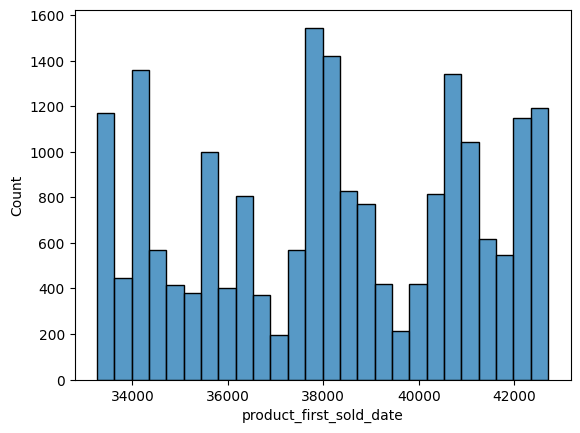

In [115]:
sns.histplot(x='product_first_sold_date', data=full_df)

# Cohort Analysis

## Assigned the cohorts and calculated the monthly offset

In [116]:
full_df['transaction_date'] = pd.to_datetime(full_df['transaction_date'])

/tmp/ipython-input-69857758.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  full_df['transaction_date'] = pd.to_datetime(full_df['transaction_date'])


In [117]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x):
  return dt.datetime(x.year, x.month, 1)
# Create transaction_date column based on month and store in TransactionMonth
full_df['TransactionMonth'] = full_df['transaction_date'].apply(get_month)
full_df[['TransactionMonth', 'transaction_date']]

TransactionMonth transaction_date
0           2024-02-01       2024-02-25
1           2024-05-01       2024-05-21
2           2024-10-01       2024-10-16
3           2024-08-01       2024-08-31
4           2024-01-01       2024-01-10
...                ...              ...
19995       2024-06-01       2024-06-24
19996       2024-09-01       2024-09-11
19997       2024-04-01       2024-04-14
19998       2024-03-01       2024-03-07
19999       2024-09-01       2024-09-22

[20000 rows x 2 columns]

In [118]:
# Grouping by customer_id and select the TransactionMonth value
# Assigning a minimum TransactionMonth value to the dataset

full_df['CohortMonth'] = full_df.groupby('customer_id')['TransactionMonth'].transform('min')

# printing top 5 rows

print(full_df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2024-02-25         False   
1               2           3         3120       2024-05-21          True   
2               3          37          402       2024-10-16         False   
3               4          88         3135       2024-08-31         False   
4               5          78          787       2024-01-10          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   owns_car  tenure              address  postcode state    co

## Calculating time offset in Month as Cohort Index

Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.

In [119]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Getting the integers for date parts from the `TransactionMonth` column
transcation_year, transaction_month = get_date_int(full_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(full_df, 'CohortMonth')

Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.

In [120]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month

""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation.
 """

full_df['CohortIndex'] = years_diff * 12 + months_diff  + 1
full_df.head(5)

transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2024-02-25         False   
1               2           3         3120       2024-05-21          True   
2               3          37          402       2024-10-16         False   
3               4          88         3135       2024-08-31         False   
4               5          78          787       2024-01-10          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

   tenure              address  postcode  state    country property_valuation  \
0    10.0    984 Hoepker Court      3064    VIC  Australia                6.0   
1    10.0      4 Shopko Circle      2196    NSW  Australia                5.0   
2    22.0   586 Miller Parkway      2835    NSW  Australia                1.0   
3    16.0  1617 Harper Parkway      2096    NSW  Australia               10.0   
4     2.0   0601 Stephen Place      2292    NSW  Australia                7.0   

   first_name TransactionMonth  CohortMonth CohortIndex  
0     Kristos       2024-02-01   2024-02-01           1  
1      Lauree       2024-05-01   2024-01-01           5  
2       Berne       2024-10-01   2024-01-01          10  
3       Titus       2024-08-01   2024-02-01           7  
4       Norma       2024-01-01   2024-01-01           1  

[5 rows x 34 columns]


Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.

Then, we call this object, select the customer_id column and calculate the average.

Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.

Finally, we create a pivot table bypassing

 -  CohortMonth to the index parameter,
 - CohortIndex to the columns parameter,
 - customer_id to the values parameter.

In [121]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = full_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data.head(5)

CohortMonth  CohortIndex  customer_id
0  2024-01-01            1         1358
1  2024-01-01            2          497
2  2024-01-01            3          490
3  2024-01-01            4          490
4  2024-01-01            5          498

## Calculate business metrics: Retention rate

**The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.**

In this section, we will calculate the retention count for each cohort Month paired with cohort Index

Now that we have a count of the retained customers for each cohortMonth and cohortIndex. We will calculate the retention rate for each Cohort.

We will create a pivot table for this purpose.

In [122]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2024-01-01   1358.0  497.0  490.0  490.0  498.0  492.0  534.0  519.0  488.0   
2024-02-01    800.0  325.0  305.0  323.0  299.0  297.0  326.0  308.0  328.0   
2024-03-01    502.0  189.0  183.0  193.0  189.0  217.0  196.0  188.0  197.0   
2024-04-01    305.0  103.0  111.0  129.0  119.0   99.0  130.0  129.0  130.0   
2024-05-01    211.0   81.0   87.0   84.0   78.0   89.0   66.0   81.0    NaN   
2024-06-01    114.0   37.0   46.0   49.0   38.0   46.0   43.0    NaN    NaN   
2024-07-01     80.0   42.0   23.0   30.0   35.0   26.0    NaN    NaN    NaN   
2024-08-01     54.0   18.0   19.0   22.0   14.0    NaN    NaN    NaN    NaN   
2024-09-01     34.0   12.0    9.0   16.0    NaN    NaN    NaN    NaN    NaN   
2024-10-01     20.0    3.0   10.0    NaN    NaN    NaN    NaN    NaN    NaN   
2024-11-01     12.0    6.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2024-12-01      4.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12  
CohortMonth                       
2024-01-01   527.0  514.0  505.0  
2024-02-01   309.0  282.0    NaN  
2024-03-01   209.0    NaN    NaN  
2024-04-01     NaN    NaN    NaN  
2024-05-01     NaN    NaN    NaN  
2024-06-01     NaN    NaN    NaN  
2024-07-01     NaN    NaN    NaN  
2024-08-01     NaN    NaN    NaN  
2024-09-01     NaN    NaN    NaN  
2024-10-01     NaN    NaN    NaN  
2024-11-01     NaN    NaN    NaN  
2024-12-01     NaN    NaN    NaN

In [123]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0] # Take the values in the first column (which represent the cohort size for each cohort month)
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex     1     2     3     4     5     6     7     8     9     10  \
CohortMonth                                                                
2024-01-01   100.0  36.6  36.1  36.1  36.7  36.2  39.3  38.2  35.9  38.8   
2024-02-01   100.0  40.6  38.1  40.4  37.4  37.1  40.8  38.5  41.0  38.6   
2024-03-01   100.0  37.6  36.5  38.4  37.6  43.2  39.0  37.5  39.2  41.6   
2024-04-01   100.0  33.8  36.4  42.3  39.0  32.5  42.6  42.3  42.6   NaN   
2024-05-01   100.0  38.4  41.2  39.8  37.0  42.2  31.3  38.4   NaN   NaN   
2024-06-01   100.0  32.5  40.4  43.0  33.3  40.4  37.7   NaN   NaN   NaN   
2024-07-01   100.0  52.5  28.8  37.5  43.8  32.5   NaN   NaN   NaN   NaN   
2024-08-01   100.0  33.3  35.2  40.7  25.9   NaN   NaN   NaN   NaN   NaN   
2024-09-01   100.0  35.3  26.5  47.1   NaN   NaN   NaN   NaN   NaN   NaN   
2024-10-01   100.0  15.0  50.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-11-01   100.0  50.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2024-12-01   100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex    11    12  
CohortMonth              
2024-01-01   37.8  37.2  
2024-02-01   35.2   NaN  
2024-03-01    NaN   NaN  
2024-04-01    NaN   NaN  
2024-05-01    NaN   NaN  
2024-06-01    NaN   NaN  
2024-07-01    NaN   NaN  
2024-08-01    NaN   NaN  
2024-09-01    NaN   NaN  
2024-10-01    NaN   NaN  
2024-11-01    NaN   NaN  
2024-12-01    NaN   NaN

The retention rate dataframe represents Customer retained across Cohorts. We can read it as follows:

Index value represents the Cohort
Columns represent the number of months since the current Cohort
For instance: The value at CohortMonth 2024-01-01, CohortIndex 3 is 35.9 and represents 35.9% of customers from cohort 2024-01 were retained in the 3rd Month.
Also, you can see from the retention Rate DataFrame:

- Retention Rate 1st index i.e 1st month is 100% as all the customers for that particular customer signed up in 1st Month
- The retention rate may increase or decrease in subsequent Indexes.
- Values towards the bottom right have a lot of NaN values.

#Visualizing Retention Rate

Before we starting plotting our heatmap, let’s set the index of our Retention rate dataframe to a more readable string format.

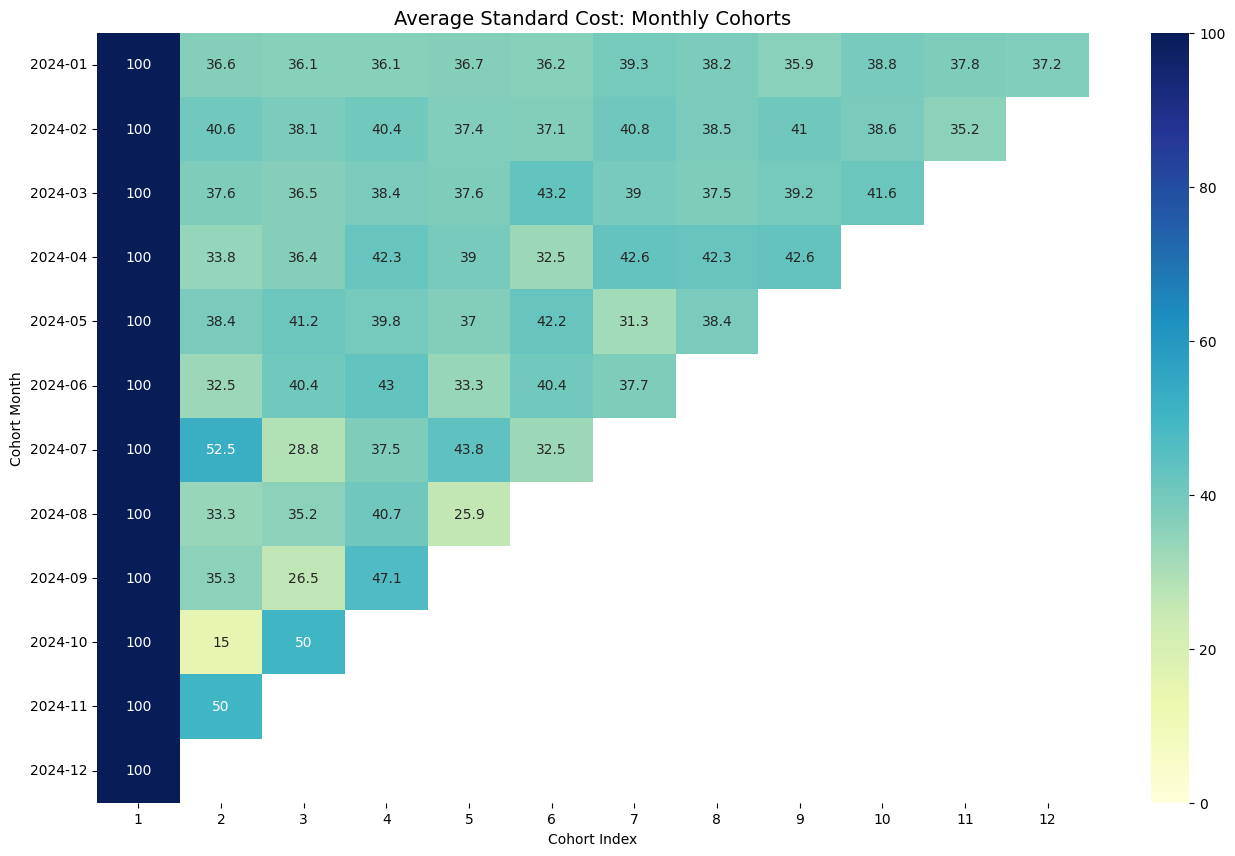

In [124]:
retention = retention.round(3)*100
retention.index = retention.index.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation=360)
plt.show()

## Interpreting Retention Rate
The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

### Investigate Cohort Month = 2024-07, Index = 2 & Index = 3

In [125]:
# Investigate the cohort month with high retention rate
df_july2 = full_df[(full_df['CohortMonth'] == '2024-07-01') & (full_df['CohortIndex'] == 2)]
df_july3 = full_df[(full_df['CohortMonth'] == '2024-07-01') & (full_df['CohortIndex'] == 3)]

Text(0.5, 1.0, 'July Index3')

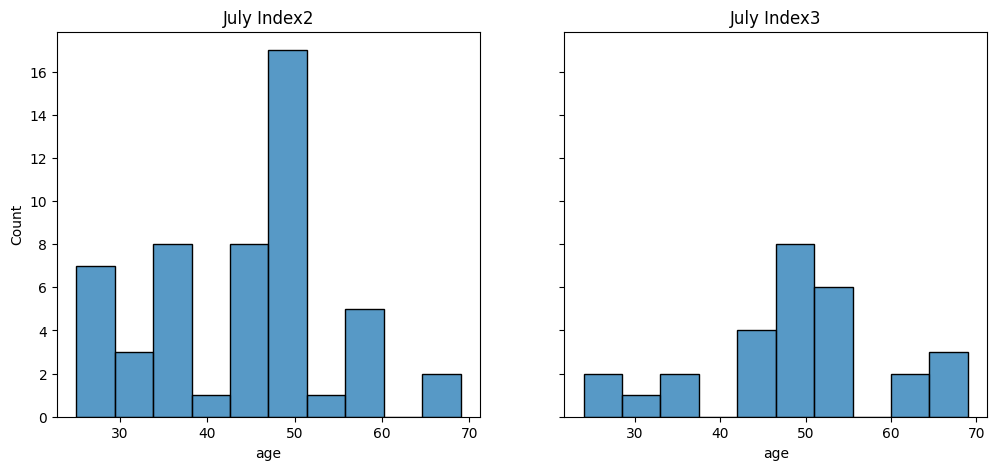

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.histplot(x='age', data=df_july2, bins=10, ax=axes[0])
axes[0].set_title('July Index2')

sns.histplot(x='age', data=df_july3, bins=10, ax=axes[1])
axes[1].set_title('July Index3')

# Finding: Index2 has more younger customers aged 25-35 as well as middle-aged customers aged 40-50

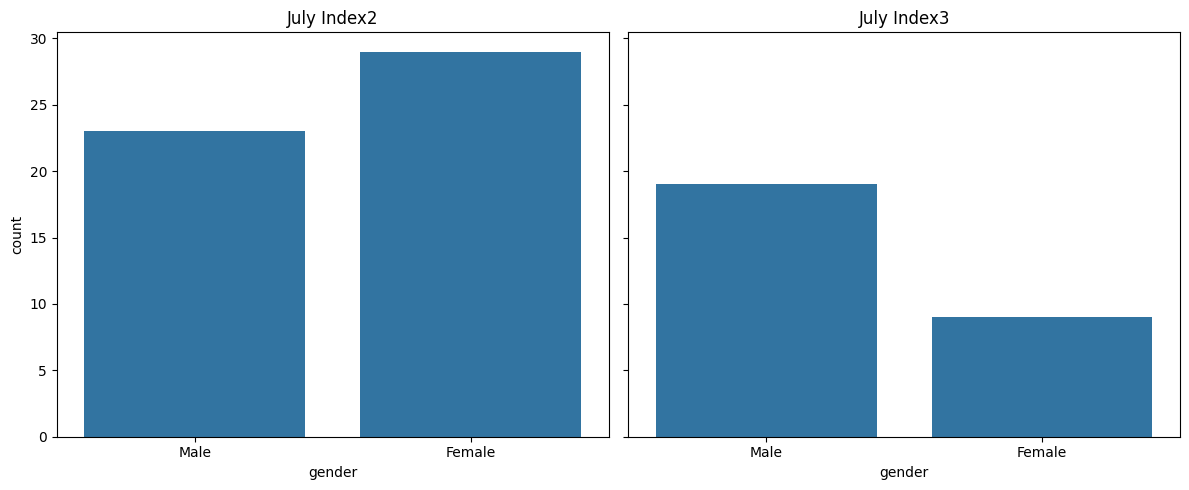

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='gender', data=df_july2, ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='gender', data=df_july3, ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

# Finding: a significant drop in the number of female consumers

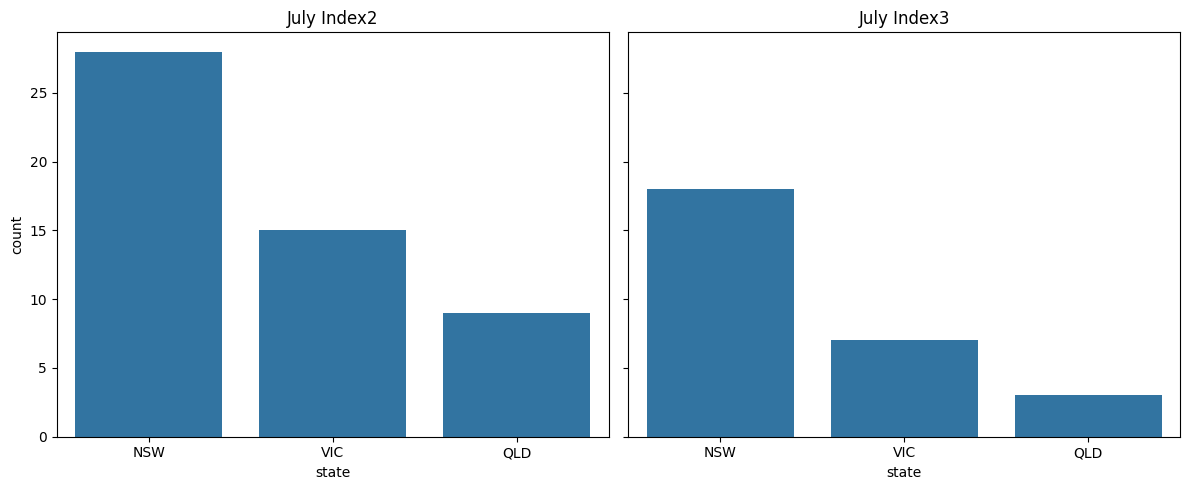

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='state', data=df_july2, ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='state', data=df_july3, ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

# Finding: a significant drop in the number of female consumers

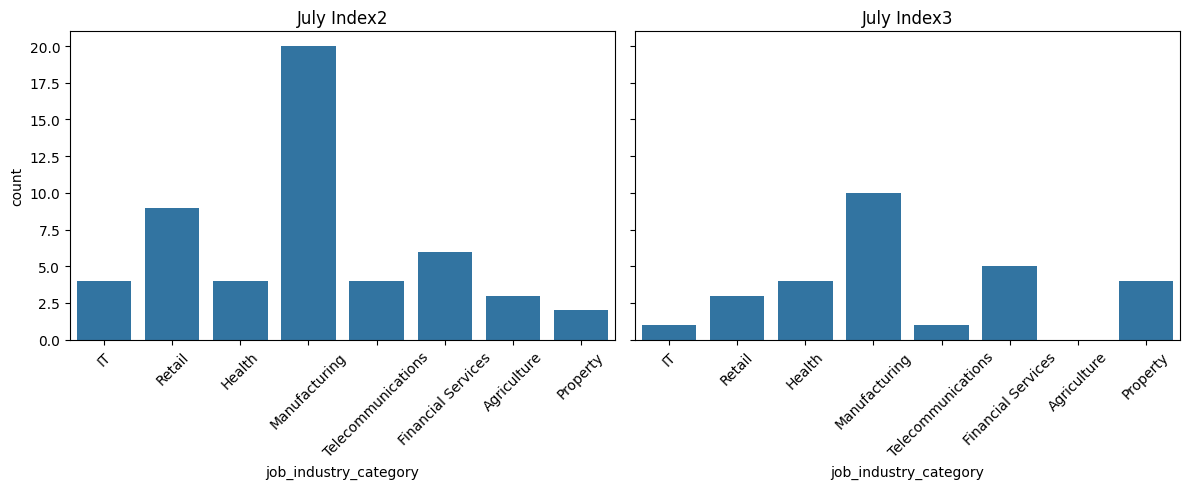

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='job_industry_category', data=df_july2, ax=axes[0], order=['IT', 'Retail', 'Health', 'Manufacturing', 'Telecommunications', 'Financial Services', 'Agriculture', 'Property'])
axes[0].set_title('July Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='job_industry_category', data=df_july3, ax=axes[1], order=['IT', 'Retail', 'Health', 'Manufacturing', 'Telecommunications', 'Financial Services', 'Agriculture', 'Property'])
axes[1].set_title('July Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: a significant drop in customers working in Retail and Manufacturing industry

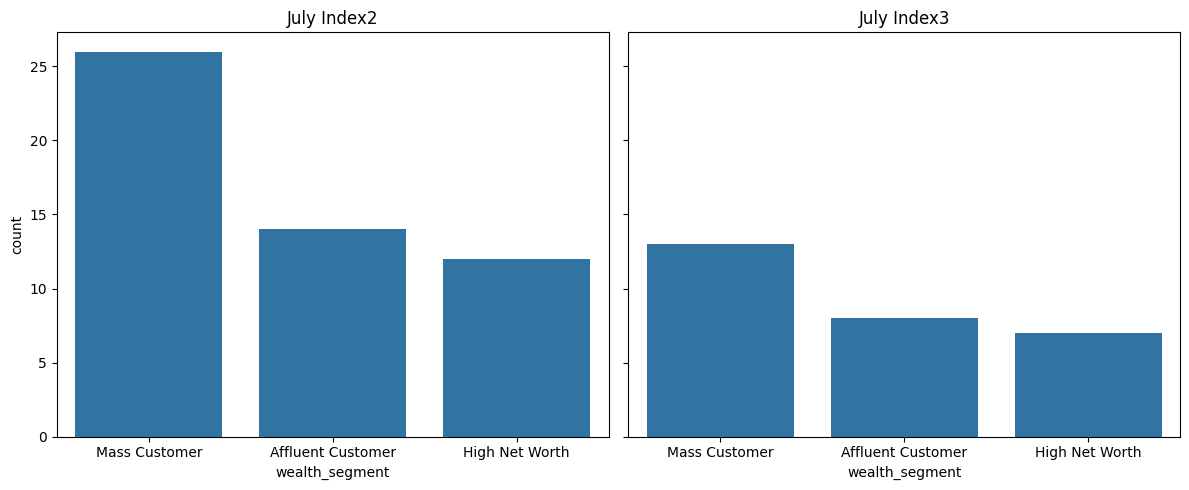

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='wealth_segment', data=df_july2, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='wealth_segment', data=df_july3, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

# Finding: a drop the number of customers in all wealth segment, especially female customers who belong to "Mass Customer" and "Affluent Customer"

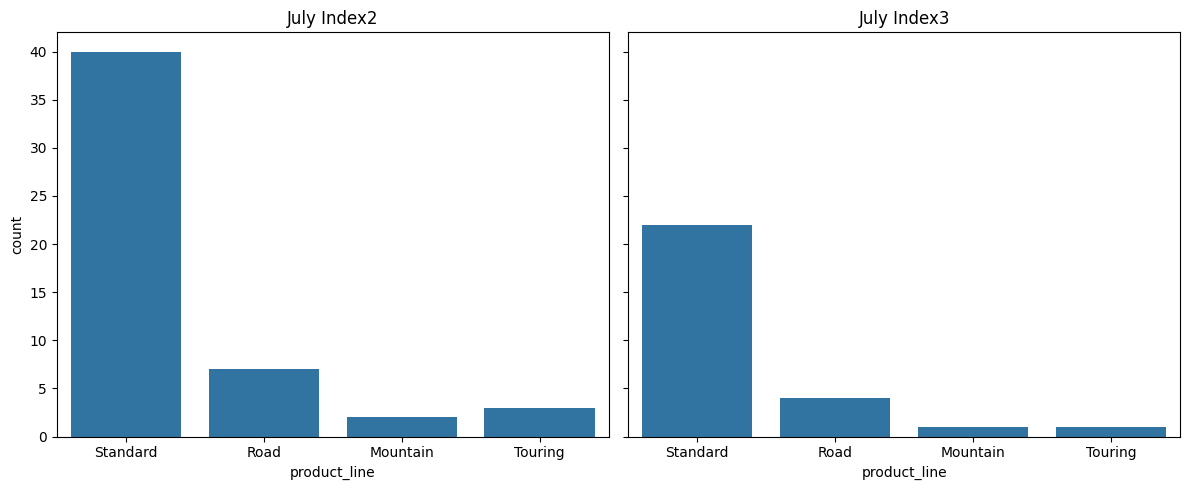

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='product_line', data=df_july2, order=['Standard', 'Road', 'Mountain', 'Touring'], ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='product_line', data=df_july3, order=['Standard', 'Road', 'Mountain', 'Touring'], ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

# Finding: a drop the number of customers in all wealth segment, especially female customers who belong to "Mass Customer" and "Affluent Customer"

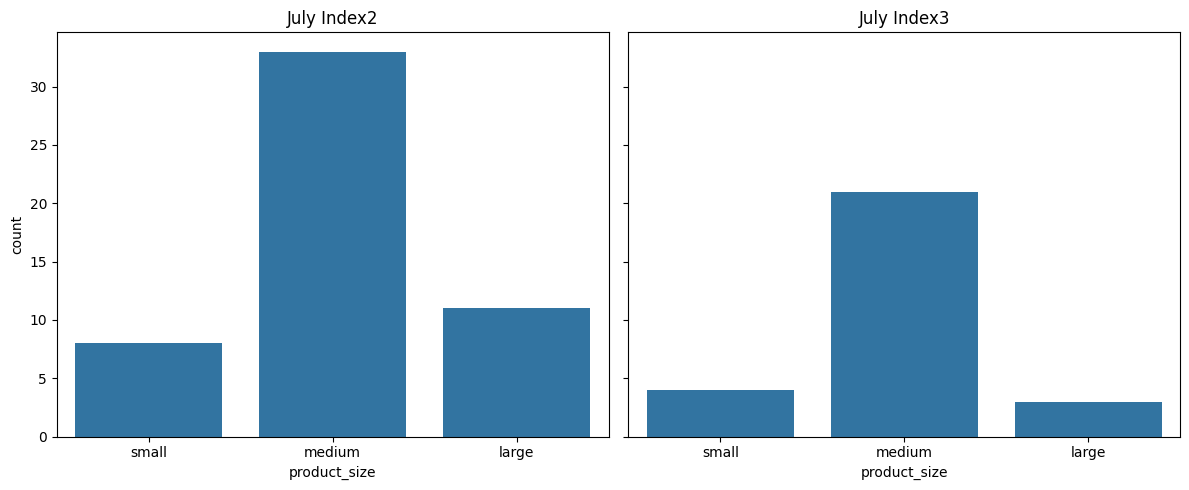

In [132]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='product_size', data=df_july2, order=['small', 'medium', 'large'], ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='product_size', data=df_july3, order=['small', 'medium', 'large'], ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

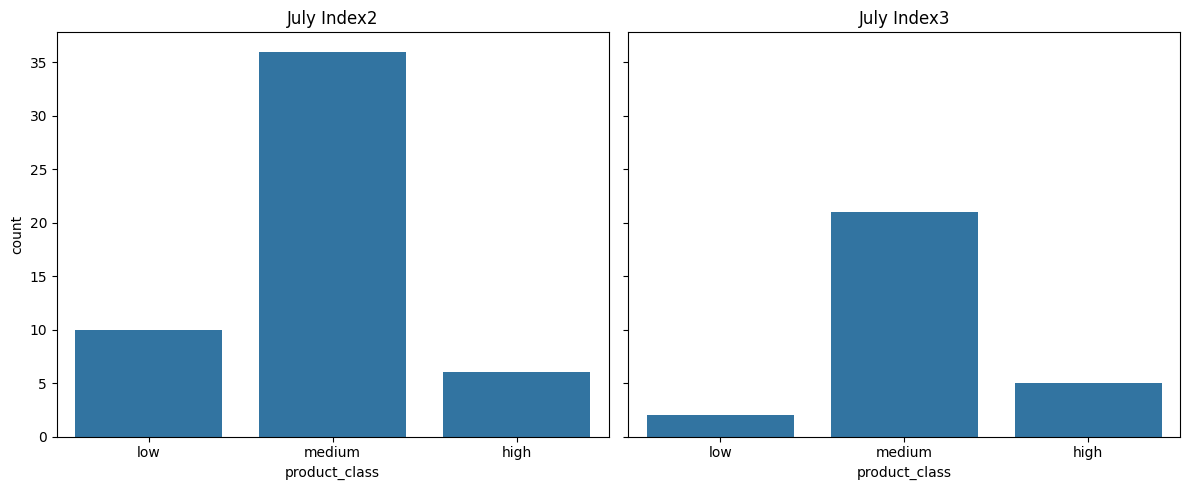

In [133]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='product_class', data=df_july2, order=['low', 'medium', 'high'], ax=axes[0])
axes[0].set_title('July Index2')

sns.countplot(x='product_class', data=df_july3, order=['low', 'medium', 'high'], ax=axes[1])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

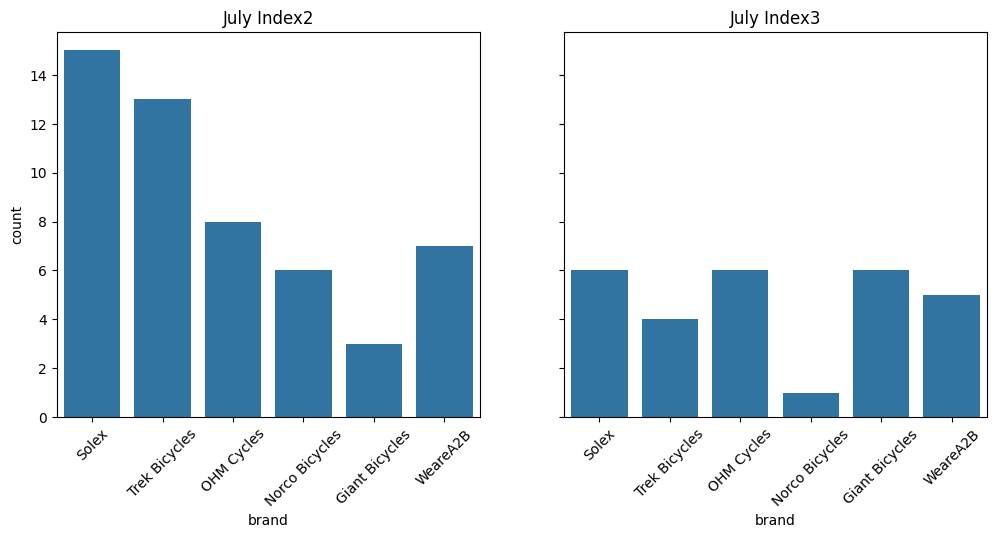

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='brand', data=df_july2, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[0])
axes[0].set_title('July Index2')
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(x='brand', data=df_july3, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[1])
axes[1].set_title('July Index3')
axes[1].tick_params(axis='x', rotation=45)

# Finding: the number of purchases for Solex and Trek Bicycles decreased significantly; the purchases for Giant slightly increased

Text(0.5, 1.0, 'July Index3')

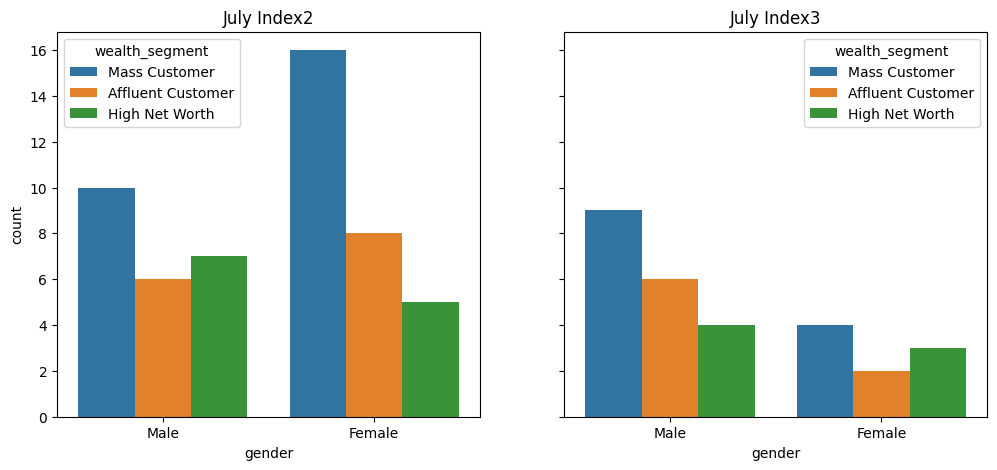

In [135]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='gender', hue='wealth_segment', data=df_july2, ax=axes[0], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[0].set_title('July Index2')

sns.countplot(x='gender', hue='wealth_segment', data=df_july3, ax=axes[1], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[1].set_title('July Index3')

# Finding: a significant drop in female Mass Customer and female affluent customer

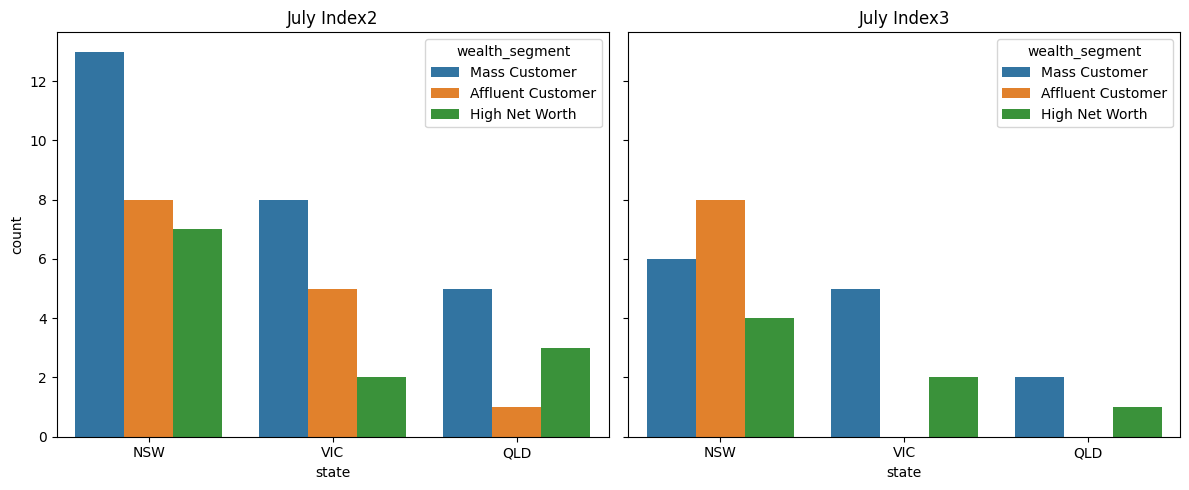

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='state', hue='wealth_segment', data=df_july2, ax=axes[0], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[0].set_title('July Index2')

sns.countplot(x='state', hue='wealth_segment', data=df_july3, ax=axes[1], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[1].set_title('July Index3')

plt.tight_layout()
plt.show()

# Finding: a significant drop in the "Mass Customer" in NSW, with no "Affluent Customer" in VIC and QLD

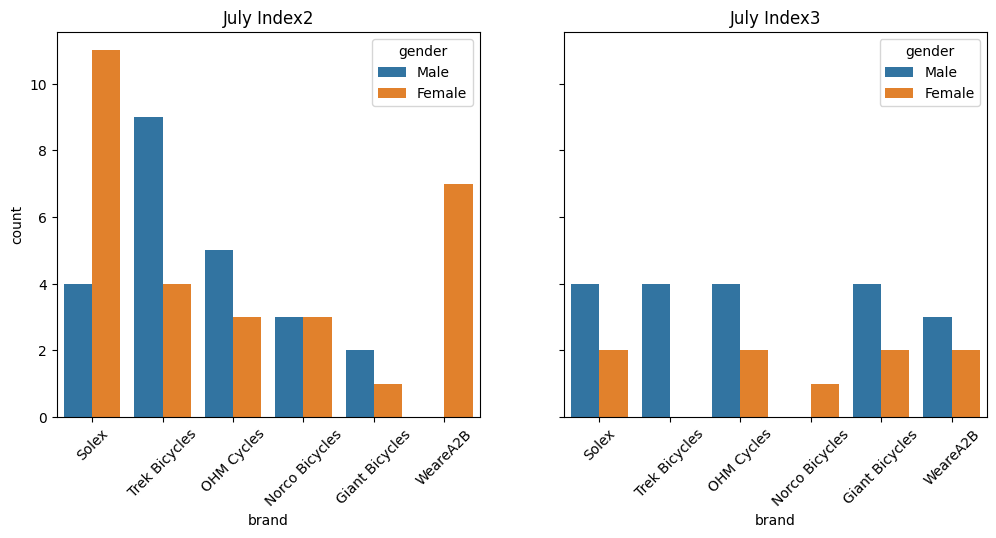

In [137]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='brand', data=df_july2, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], hue='gender', ax=axes[0])
axes[0].set_title('July Index2')
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(x='brand', data=df_july3, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], hue='gender', ax=axes[1])
axes[1].set_title('July Index3')
axes[1].tick_params(axis='x', rotation=45)

# Finding: a significant drop in female customers buying Solex and Trek Bicycles, as well as a significant drop in male customers buying Trek Bicycles

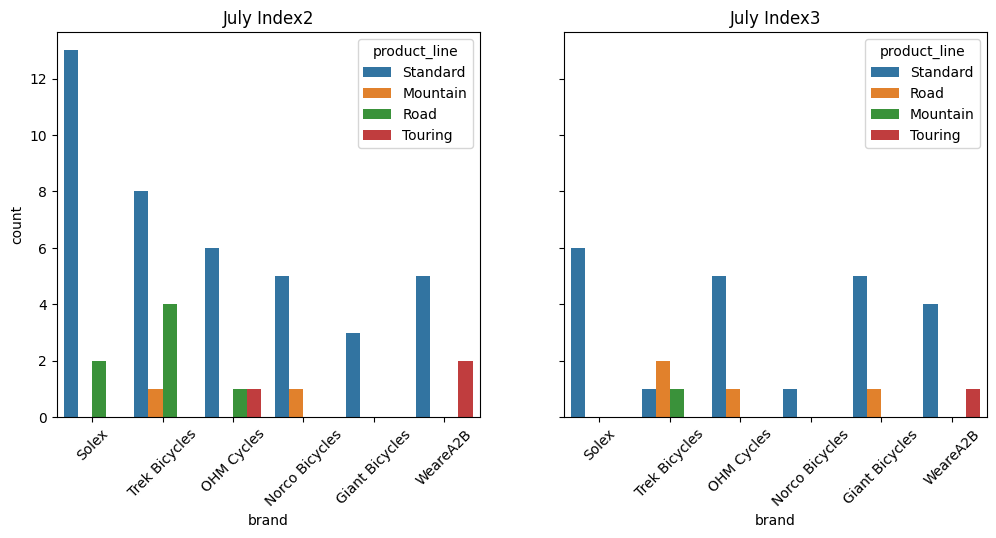

In [138]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='brand', data=df_july2, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], hue='product_line', ax=axes[0])
axes[0].set_title('July Index2')
axes[0].tick_params(axis='x', rotation=45)


sns.countplot(x='brand', data=df_july3, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], hue='product_line', ax=axes[1])
axes[1].set_title('July Index3')
axes[1].tick_params(axis='x', rotation=45)

# Finding:

Text(0.5, 1.0, 'July Index3')

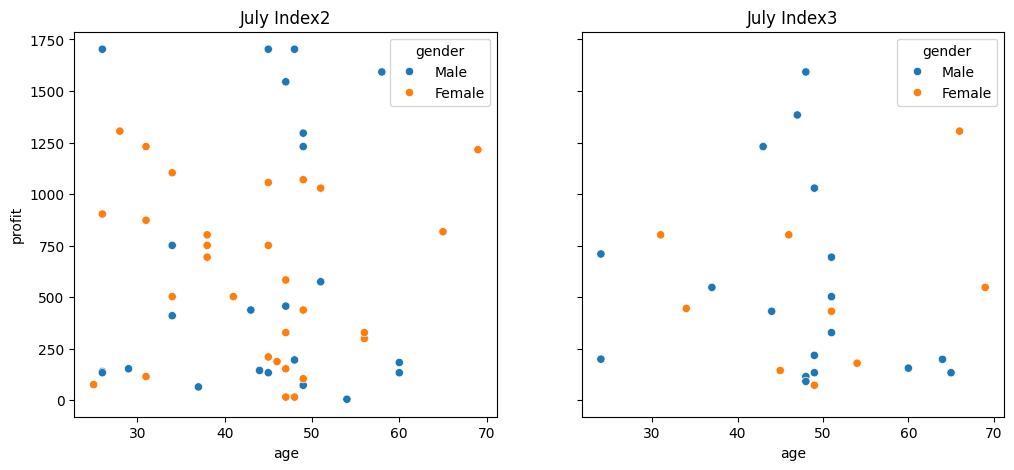

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.scatterplot(x='age', y='profit', hue='gender', data=df_july2, ax=axes[0])
axes[0].set_title('July Index2')

sns.scatterplot(x='age', y='profit', hue='gender', data=df_july3, ax=axes[1])
axes[1].set_title('July Index3')

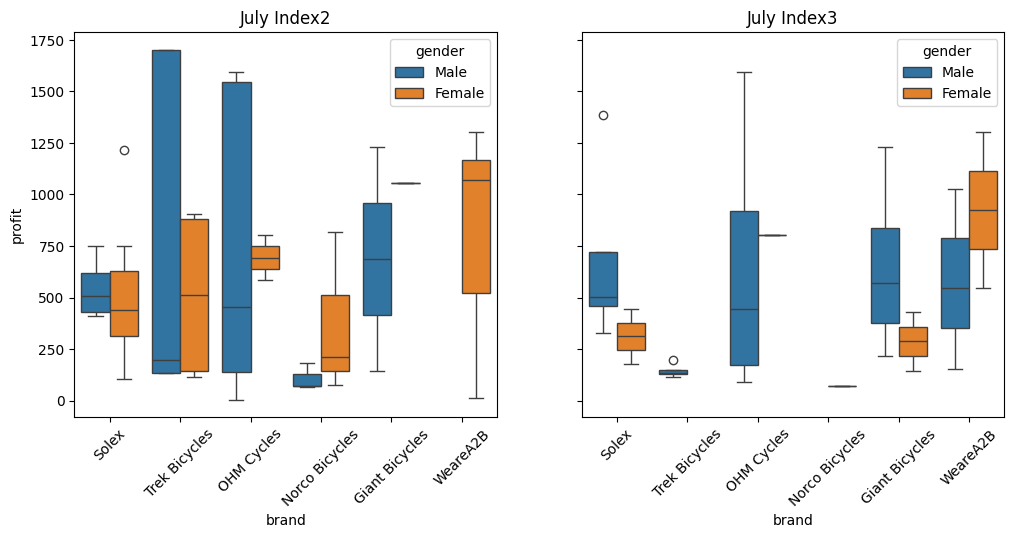

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.boxplot(x='brand', y='profit', hue='gender', data=df_july2, ax=axes[0], order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'])
axes[0].set_title('July Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='brand', y='profit', hue='gender', data=df_july3, ax=axes[1], order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'])
axes[1].set_title('July Index3')
axes[1].tick_params(axis='x', rotation=45)

Text(0.5, 1.0, 'July Index3')

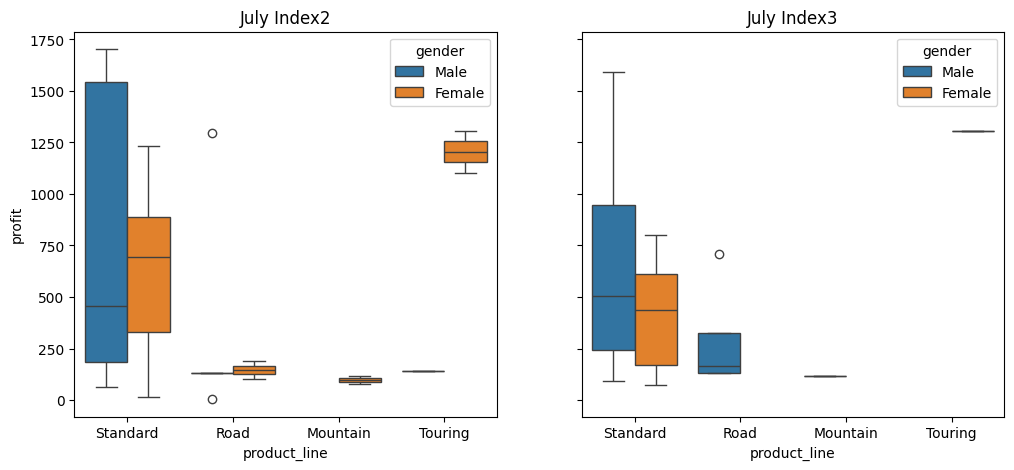

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.boxplot(x='product_line', y='profit', hue='gender', data=df_july2, ax=axes[0], order=['Standard', 'Road', 'Mountain', 'Touring'])
axes[0].set_title('July Index2')

sns.boxplot(x='product_line', y='profit', hue='gender', data=df_july3, ax=axes[1], order=['Standard', 'Road', 'Mountain', 'Touring'])
axes[1].set_title('July Index3')

Text(0.5, 1.0, 'July Index3')

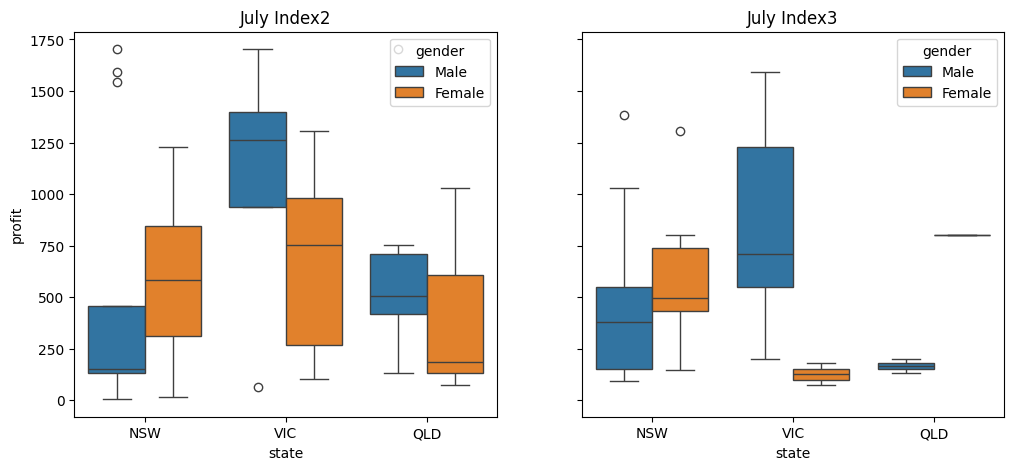

In [142]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.boxplot(x='state', y='profit', hue='gender', data=df_july2, ax=axes[0])
axes[0].set_title('July Index2')

sns.boxplot(x='state', y='profit', hue='gender', data=df_july3, ax=axes[1])
axes[1].set_title('July Index3')

Text(0.5, 1.0, 'July Index3')

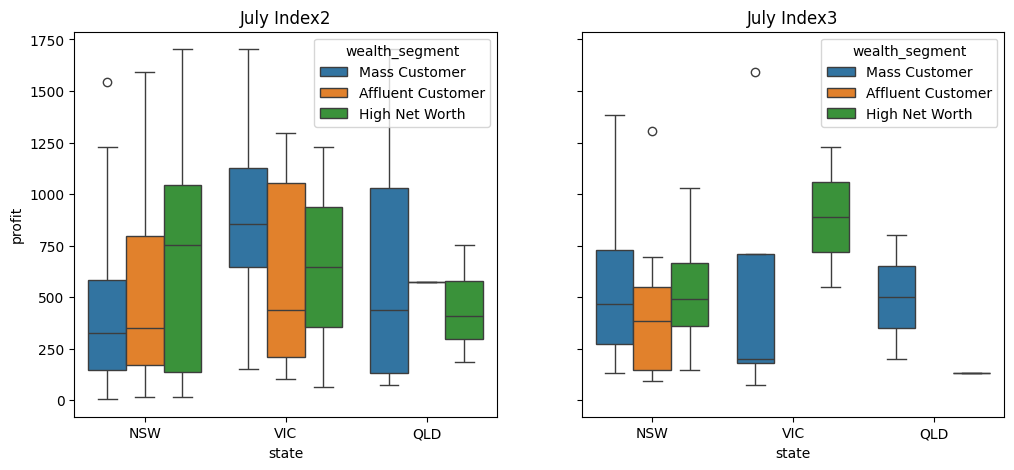

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.boxplot(x='state', y='profit', hue='wealth_segment', data=df_july2, ax=axes[0], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[0].set_title('July Index2')

sns.boxplot(x='state', y='profit', hue='wealth_segment', data=df_july3, ax=axes[1], hue_order=['Mass Customer', 'Affluent Customer', 'High Net Worth'])
axes[1].set_title('July Index3')

### Investigate Cohort Month = 2024-10, Index = 2 & Index 3

In [144]:
df_oct2 = full_df[(full_df['CohortMonth'] == '2024-10-01') & (full_df['CohortIndex'] == 2)]
df_oct3 = full_df[(full_df['CohortMonth'] == '2024-10-01') & (full_df['CohortIndex'] == 3)]

Text(0.5, 1.0, 'October Index3')

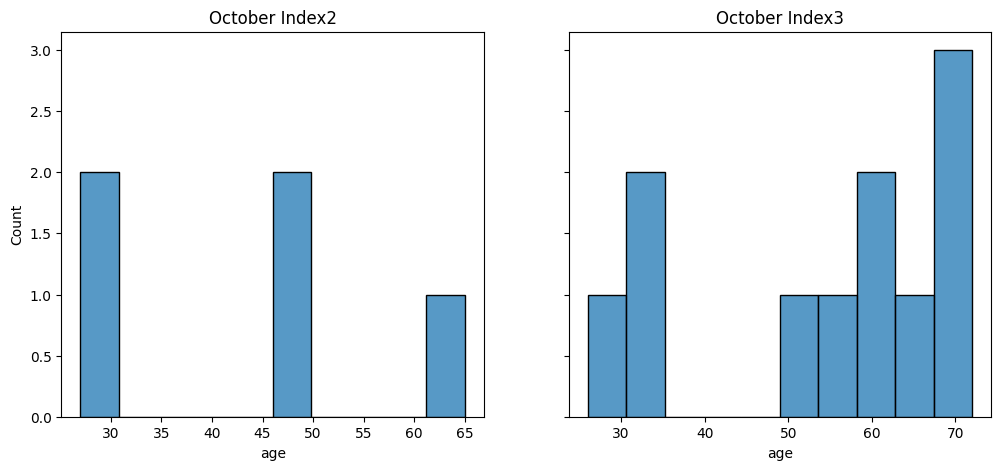

In [145]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.histplot(x='age', data=df_oct2, bins=10, ax=axes[0])
axes[0].set_title('October Index2')

sns.histplot(x='age', data=df_oct3, bins=10, ax=axes[1])
axes[1].set_title('October Index3')

# Finding: a rise in more senior customers aged between 50 to 75

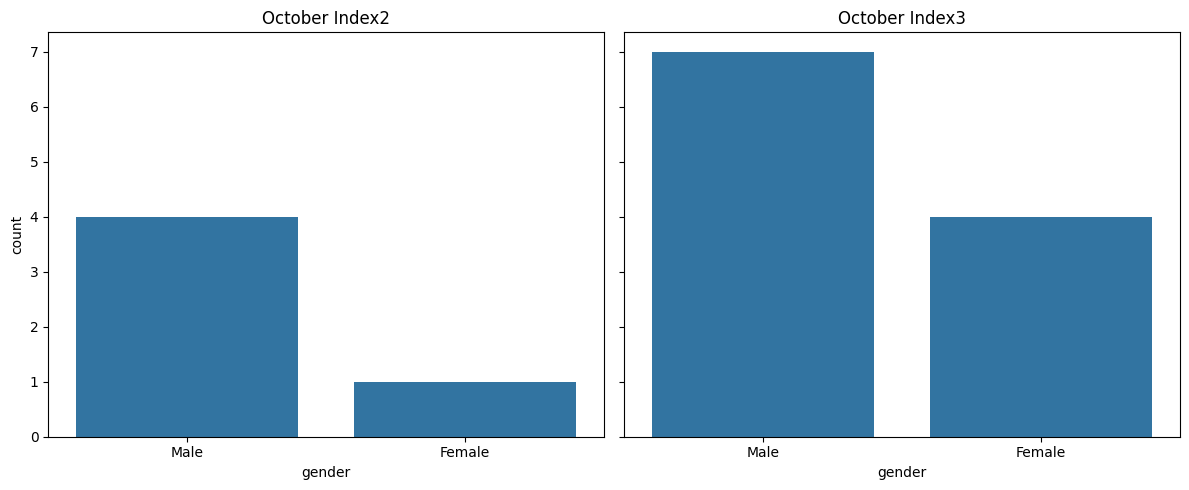

In [146]:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.countplot(x='gender', data=df_oct2, ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='gender', data=df_oct3, ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: a rise in both male and female customers

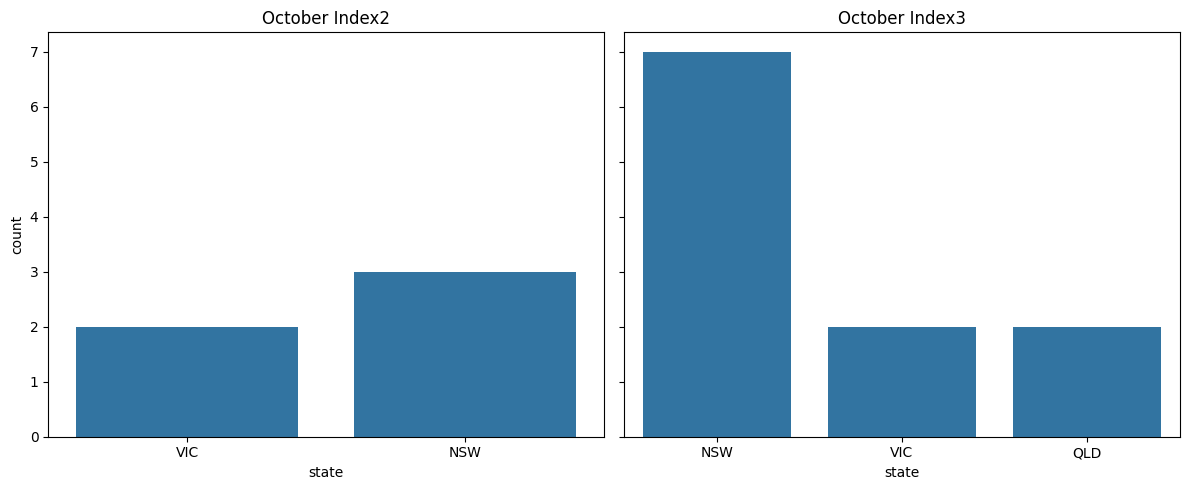

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='state', data=df_oct2, ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='state', data=df_oct3, ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: a rise in number of customers from NSW and emergence of customers from QLD

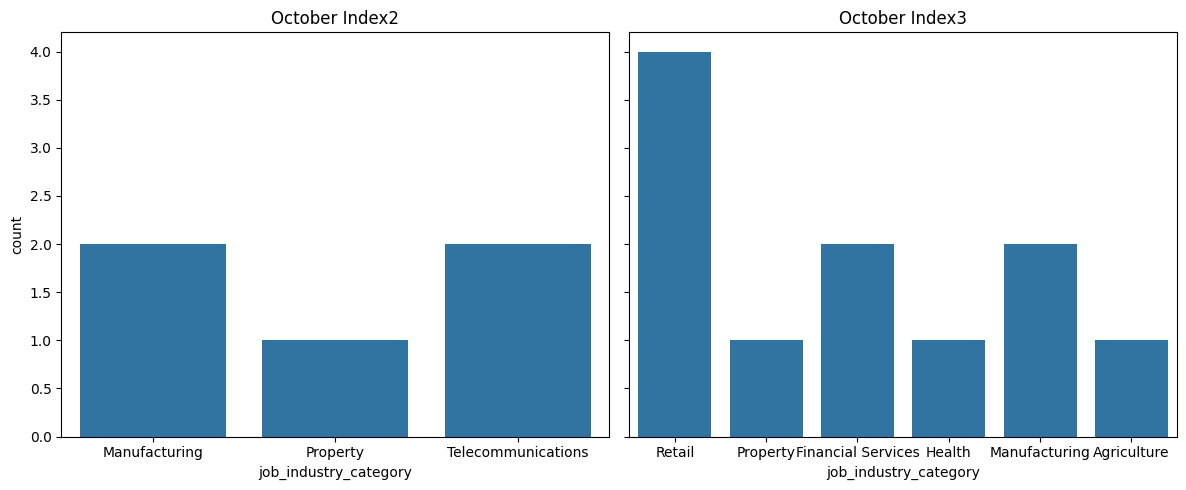

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='job_industry_category', data=df_oct2, ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='job_industry_category', data=df_oct3, ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: customers from more industries, especially an increase in retail and fianancial services (as well as customers in health and agriculture)

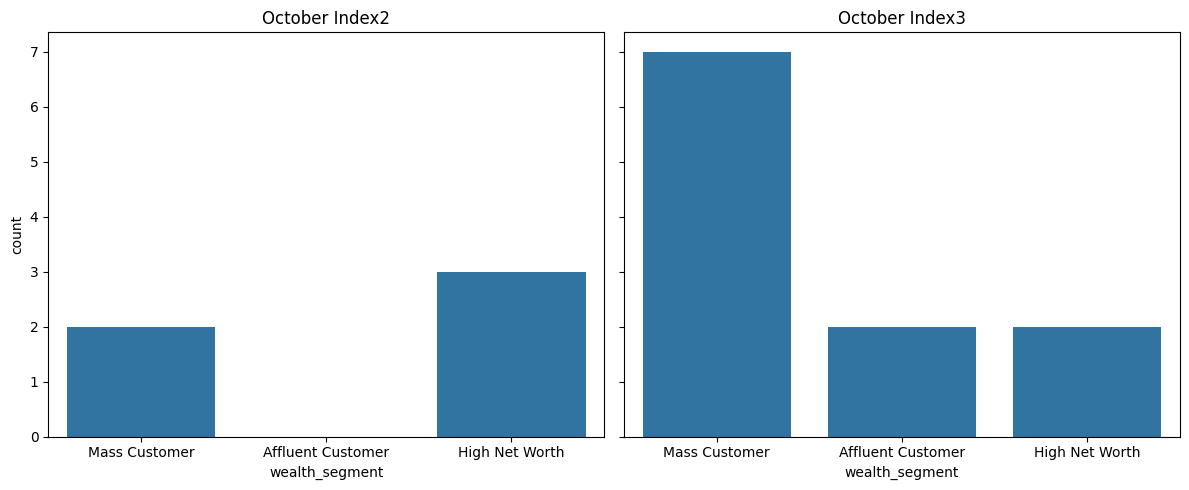

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='wealth_segment', data=df_oct2, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='wealth_segment', data=df_oct3, order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in the number of mass customers, together with an increase in affluent customers

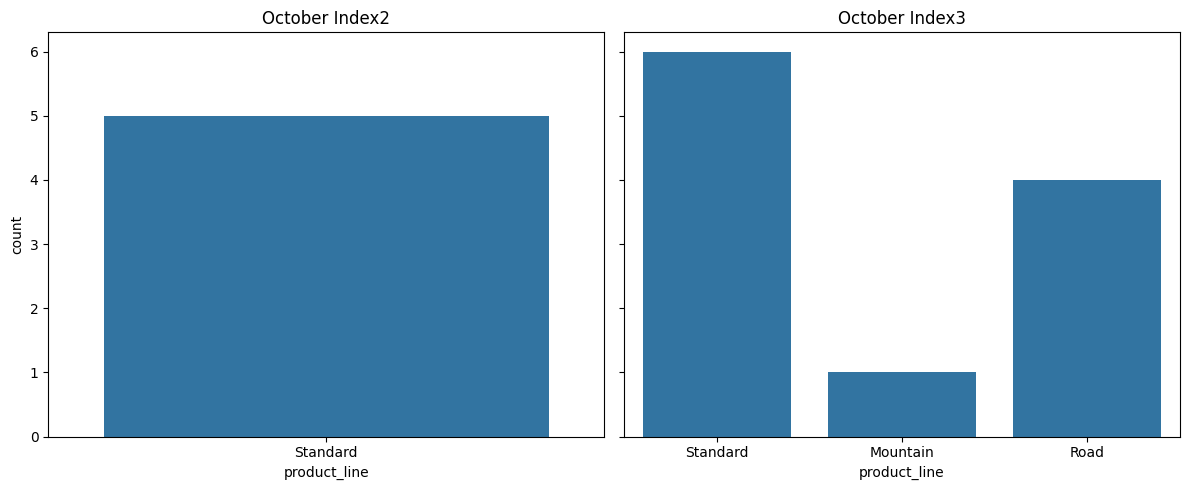

In [150]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='product_line', data=df_oct2, ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='product_line', data=df_oct3, ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in the mountain and road line

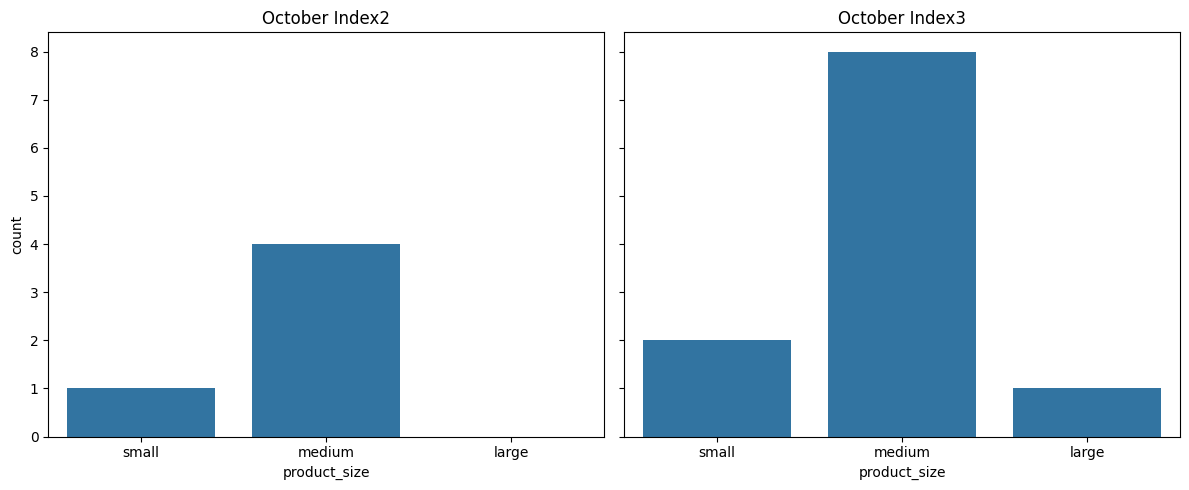

In [151]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='product_size', data=df_oct2, order=['small', 'medium', 'large'], ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='product_size', data=df_oct3, order=['small', 'medium', 'large'], ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in medium and large products

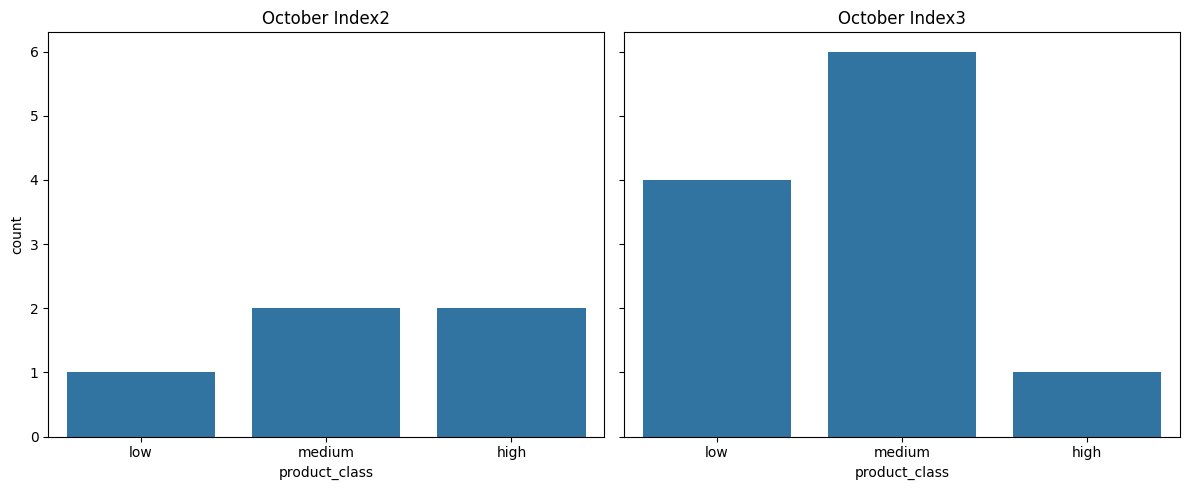

In [152]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='product_class', data=df_oct2, order=['low', 'medium', 'high'], ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='product_class', data=df_oct3, order=['low', 'medium', 'high'], ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in medium and low product

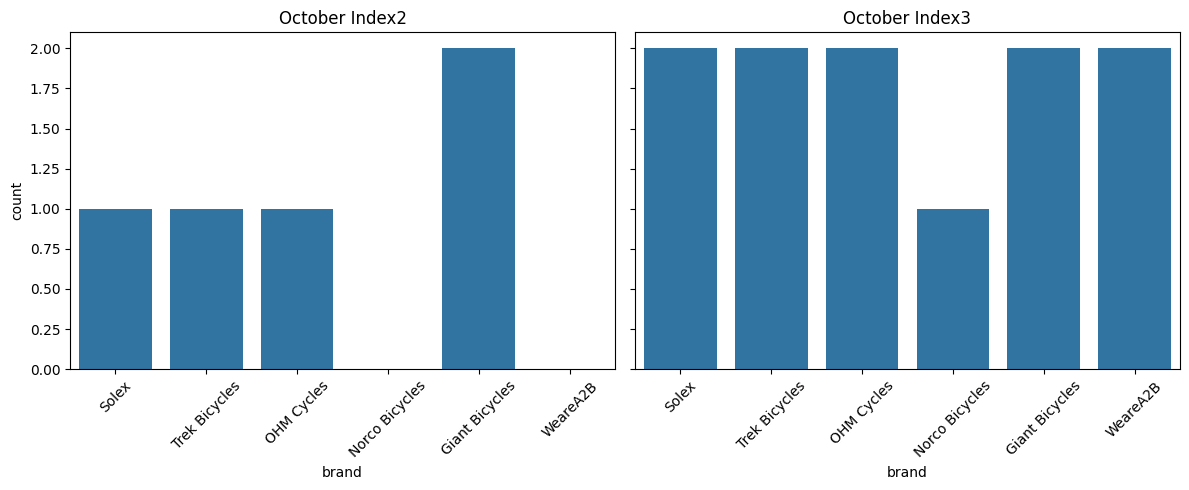

In [153]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='brand', data=df_oct2, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='brand', data=df_oct3, order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: increase in sales for all brands especially for WeareA2B, except for Giant which stays the same

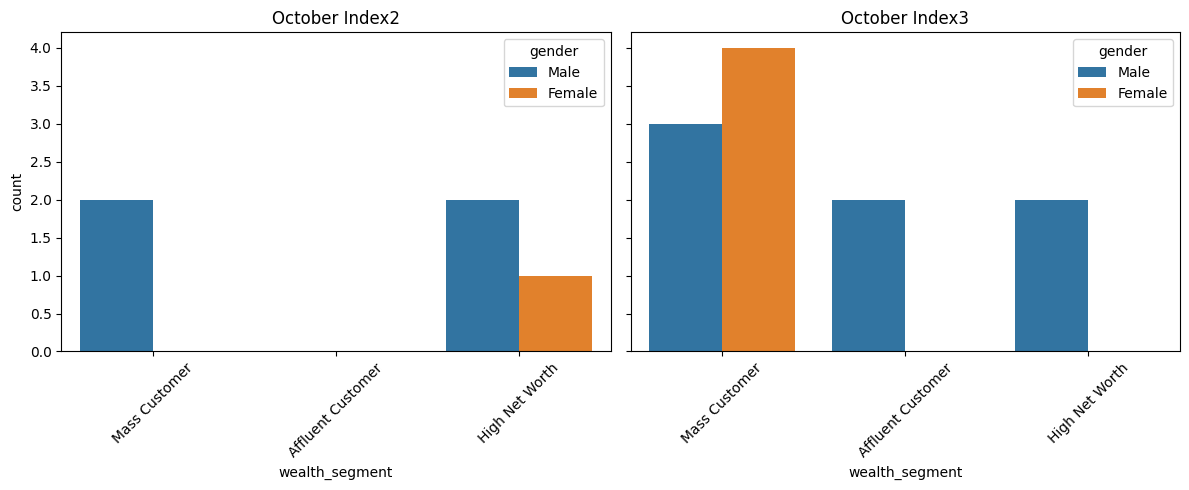

In [154]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='wealth_segment', data=df_oct2, hue='gender', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='wealth_segment', data=df_oct3, hue='gender', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: an increase in female mass customers, but decrease in male affluent customers and female high net worh customers

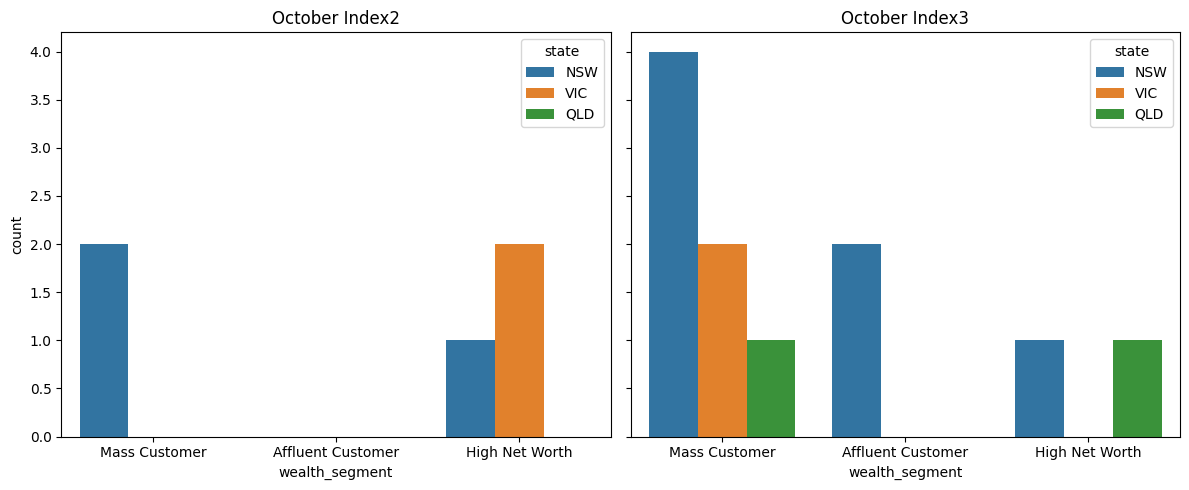

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='wealth_segment', data=df_oct2, hue='state', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], hue_order=['NSW', 'VIC', 'QLD'], ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='wealth_segment', data=df_oct3, hue='state', order=['Mass Customer', 'Affluent Customer', 'High Net Worth'], hue_order=['NSW', 'VIC', 'QLD'], ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in mass customers from all states, and an increase in affluent customers from NSW

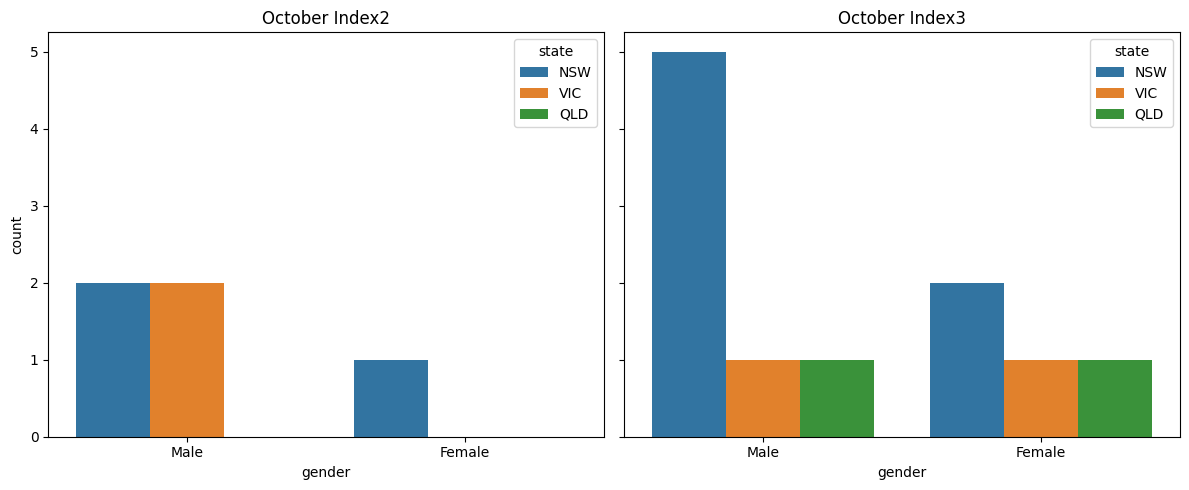

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='gender', data=df_oct2, hue='state', hue_order=['NSW', 'VIC', 'QLD'], ax=axes[0])
axes[0].set_title('October Index2')

sns.countplot(x='gender', data=df_oct3, hue='state', hue_order=['NSW', 'VIC', 'QLD'], ax=axes[1])
axes[1].set_title('October Index3')

plt.tight_layout()
plt.show()

# Finding: an increase in male customers from NSW and female customers from all states

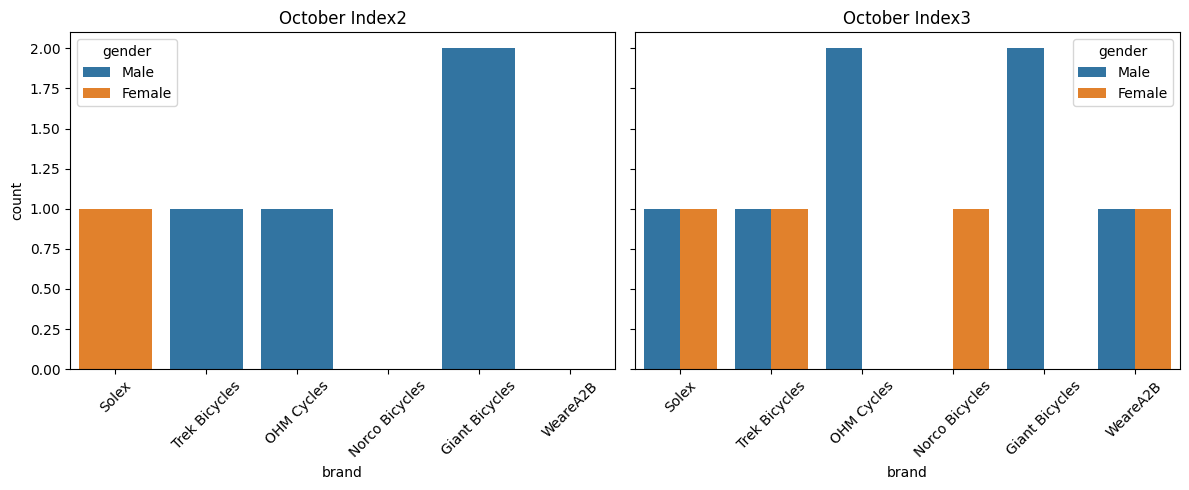

In [157]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.countplot(x='brand', data=df_oct2, hue='gender', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='brand', data=df_oct3, hue='gender', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: more female customers for Trek, male customer for Solex, and both female and female for WeareA2B

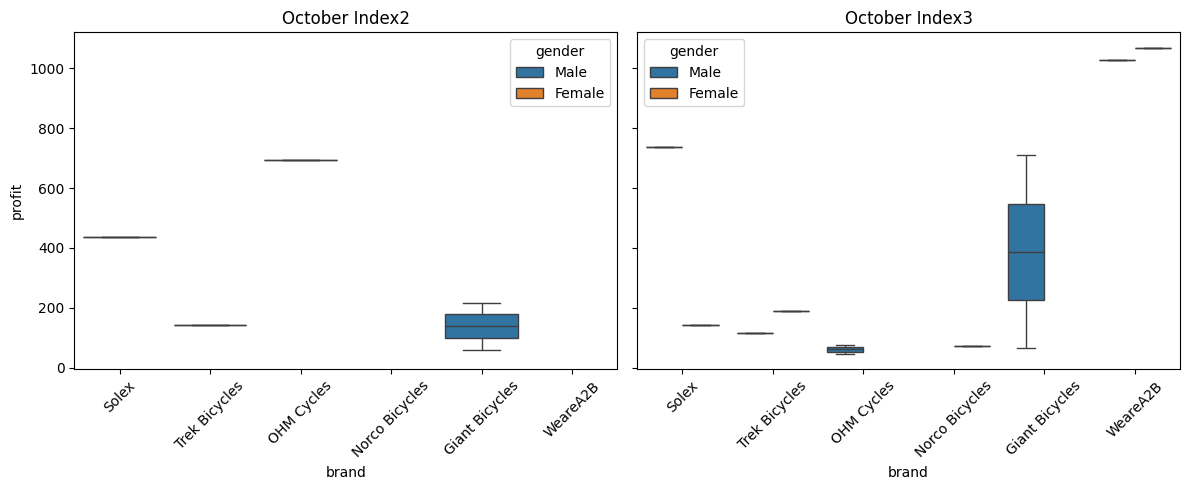

In [158]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x='brand', y='profit', data=df_oct2, hue='gender', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='brand', y='profit', data=df_oct3, hue='gender', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding:

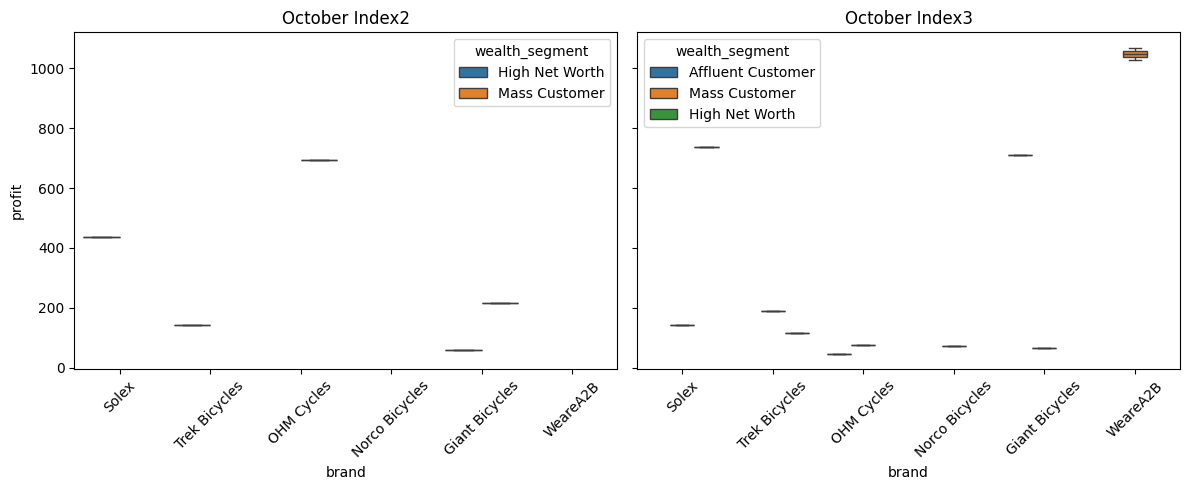

In [159]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x='brand', y='profit', data=df_oct2, hue='wealth_segment', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='brand', y='profit', data=df_oct3, hue='wealth_segment', order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: no findings due to small dataset

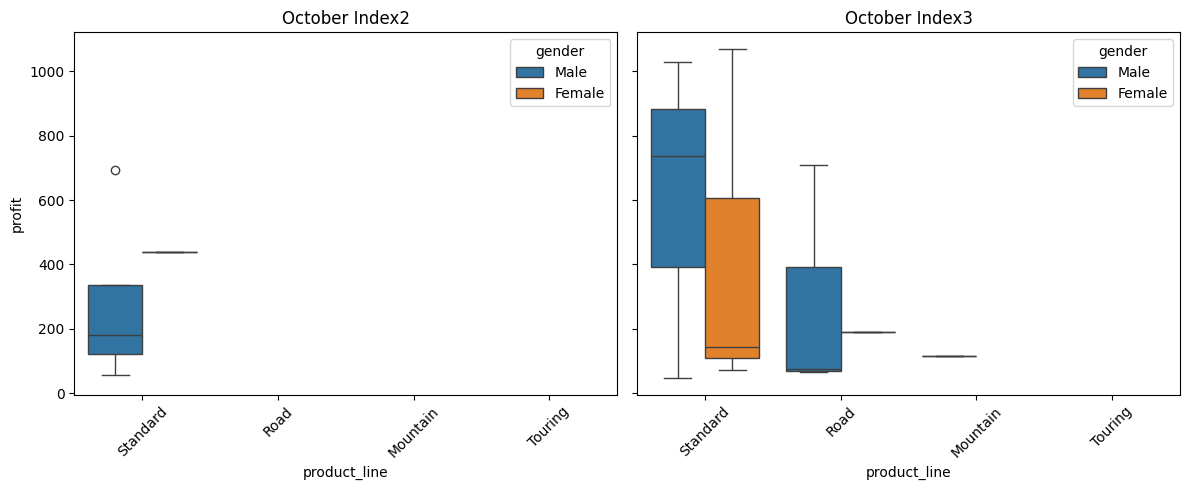

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x='product_line', y='profit', data=df_oct2, hue='gender', order=['Standard', 'Road', 'Mountain', 'Touring'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='product_line', y='profit', data=df_oct3, hue='gender', order=['Standard', 'Road', 'Mountain', 'Touring'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: while male customers contribute less profit to standard for index 2, they contribute more for index 3

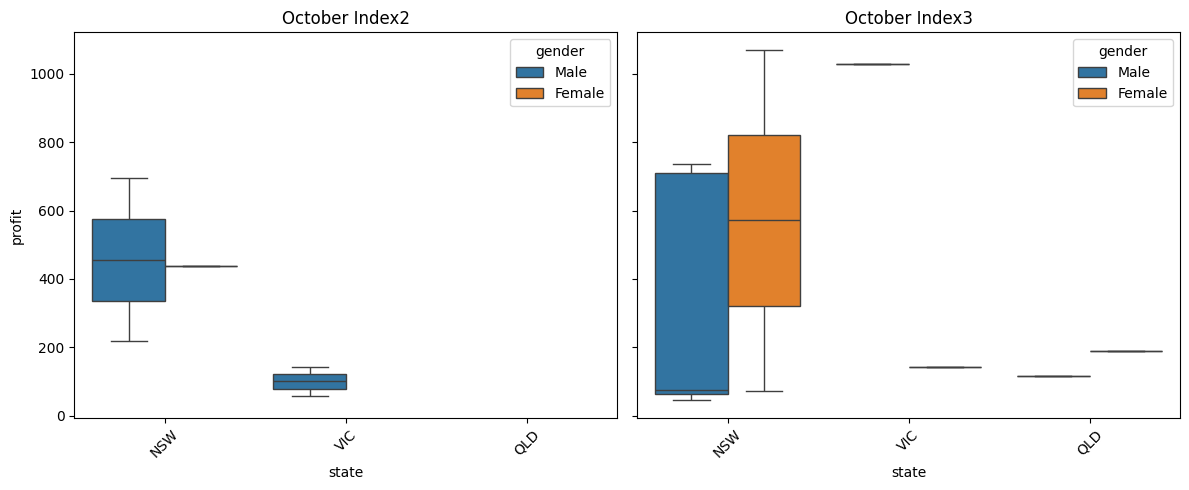

In [161]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.boxplot(x='state', y='profit', data=df_oct2, hue='gender', order=['NSW', 'VIC', 'QLD'], ax=axes[0])
axes[0].set_title('October Index2')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='state', y='profit', data=df_oct3, hue='gender', order=['NSW', 'VIC', 'QLD'], ax=axes[1])
axes[1].set_title('October Index3')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Finding: female customers contribute more profit than male customers in NSW

# Build RFM Model

Recency - > group by c_id , max date -> rank
Frequency -> group by c_id, count() -> rank
Monetary -> group by c_id , sum(profit) -> rank

RFM_SCORE = (R_RANK + F_Rank + M_Rank)/3
1-1000 high ; 2-3000 Medium , 3-4000 low


In [162]:
rfm = full_df.groupby('customer_id').agg({'transaction_date': 'max',
                                         'transaction_id': 'count',
                                         'profit': 'sum'}).reset_index()

In [163]:
rfm['recency'] = (full_df['transaction_date'].max() - rfm['transaction_date']).dt.days

In [164]:
rfm['recency_rank'] = rfm['recency'].rank(ascending=True)
rfm['frequency_rank'] = rfm['transaction_id'].rank(ascending=False)
rfm['profit_rank'] = rfm['profit'].rank(ascending=False)

In [165]:
rfm['RFM_score'] = (rfm['recency_rank'] + rfm['frequency_rank'] + rfm['profit_rank']) / 3

<Axes: xlabel='RFM_score', ylabel='Count'>

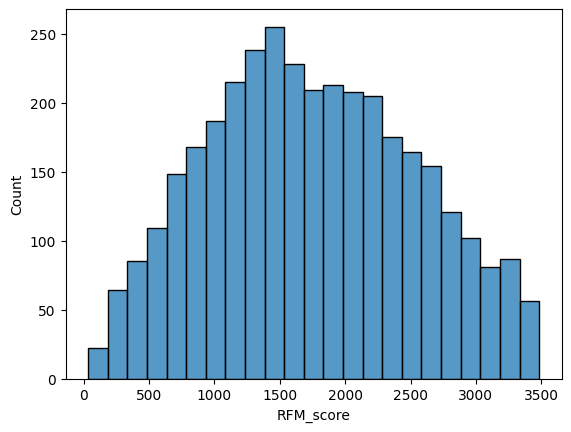

In [166]:
sns.histplot(x='RFM_score', data=rfm)

In [167]:
rfm['RFM_score'].describe()

count    3494.000000
mean     1747.500000
std       792.219885
min        33.833333
25%      1153.125000
50%      1710.000000
75%      2336.000000
max      3483.666667
Name: RFM_score, dtype: float64

In [168]:
rfm['rfm_category'] = pd.cut(rfm['RFM_score'], bins=[0, 1000, 2000, 3500], labels=['high', 'medium', 'low'])

In [169]:
rfm.columns

Index(['customer_id', 'transaction_date', 'transaction_id', 'profit',
       'recency', 'recency_rank', 'frequency_rank', 'profit_rank', 'RFM_score',
       'rfm_category'],
      dtype='object')

## Merge rfm_category back to full_df

In [170]:
merged_df = rfm[['customer_id', 'rfm_category']].merge(full_df, on='customer_id', how='left')

In [171]:
merged_df['rfm_category'].value_counts()

rfm_category
medium    9170
high      5862
low       4968
Name: count, dtype: int64

In [172]:
merged_df.columns

Index(['customer_id', 'rfm_category', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'profit', 'name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'age', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'first_name', 'TransactionMonth', 'CohortMonth',
       'CohortIndex'],
      dtype='object')

## Root cause analysis

<Axes: xlabel='age', ylabel='Count'>

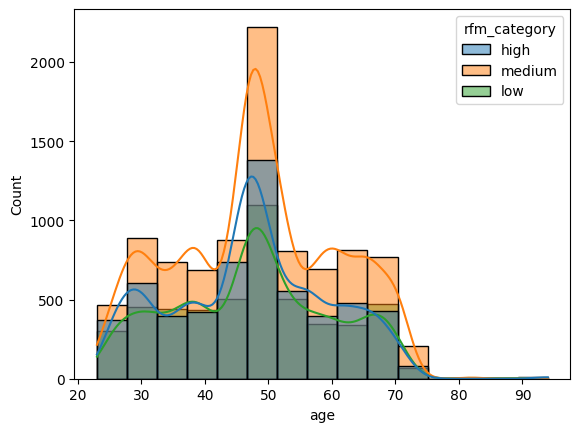

In [173]:
sns.histplot(x='age', data=merged_df, hue='rfm_category', bins=15, kde=True, multiple='layer', alpha=0.5)

<Axes: xlabel='rfm_category', ylabel='age'>

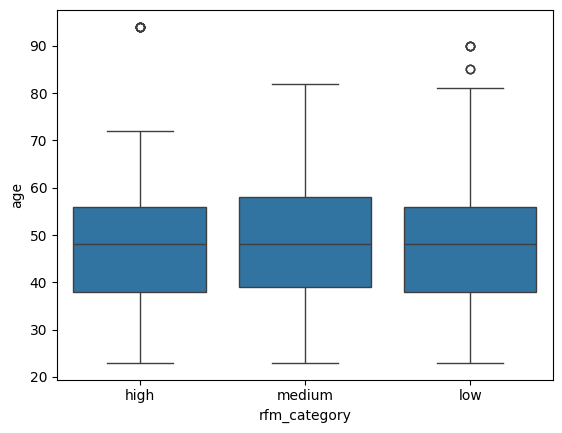

In [174]:
sns.boxplot(x='rfm_category', y='age', data=merged_df)

# Finding: while the median age for all categories are the same, the average customer age for high-value group is smaller.

<Axes: xlabel='past_3_years_bike_related_purchases', ylabel='Count'>

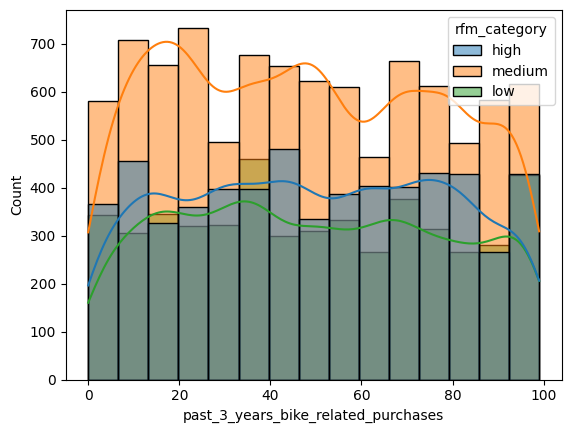

In [175]:
sns.histplot(x='past_3_years_bike_related_purchases', data=merged_df, hue='rfm_category', bins=15, kde=True, multiple='layer', alpha=0.5)

<Axes: xlabel='rfm_category', ylabel='past_3_years_bike_related_purchases'>

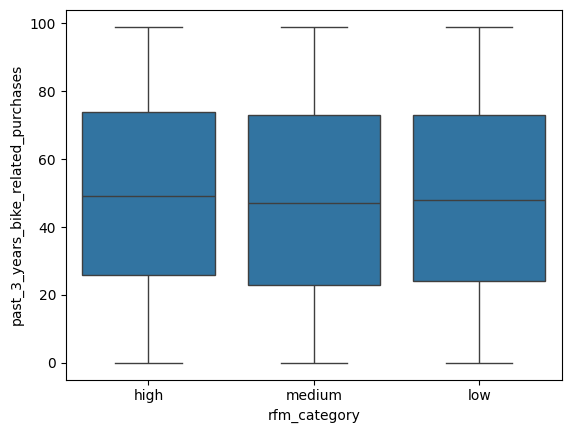

In [176]:
sns.boxplot(x='rfm_category', y='past_3_years_bike_related_purchases', data=merged_df)

# Finding: while the median age for all categories are the same, the average customer age for high-value group is smaller.

<Axes: xlabel='rfm_category', ylabel='count'>

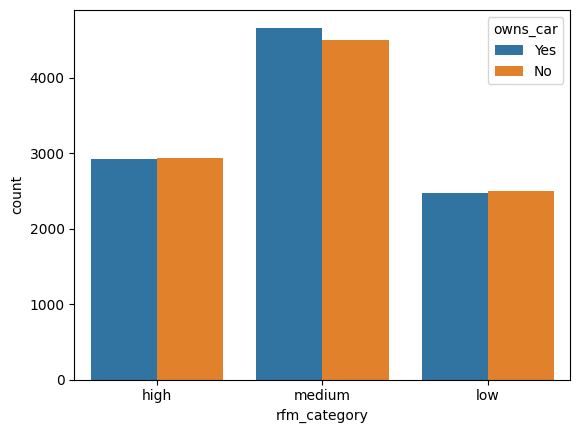

In [177]:
sns.countplot(x='rfm_category', hue='owns_car', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

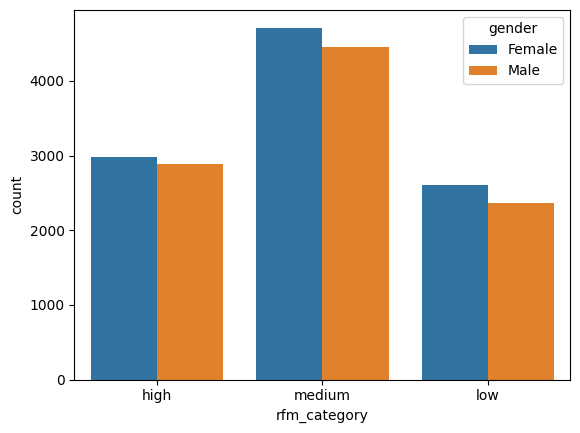

In [178]:
sns.countplot(x='rfm_category', hue='gender', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

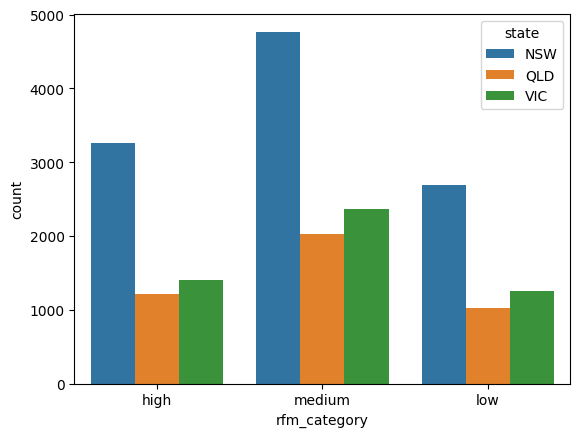

In [179]:
sns.countplot(x='rfm_category', hue='state', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

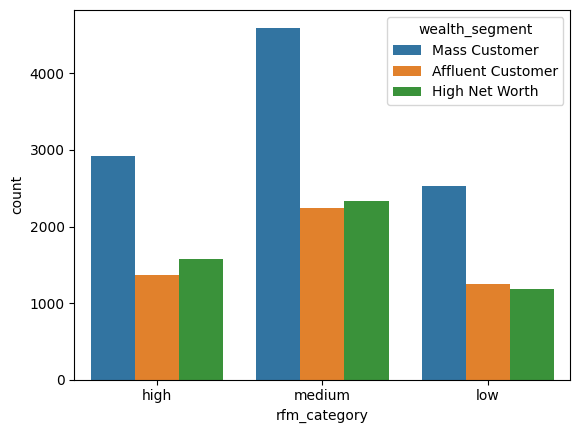

In [180]:
sns.countplot(x='rfm_category', hue='wealth_segment', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

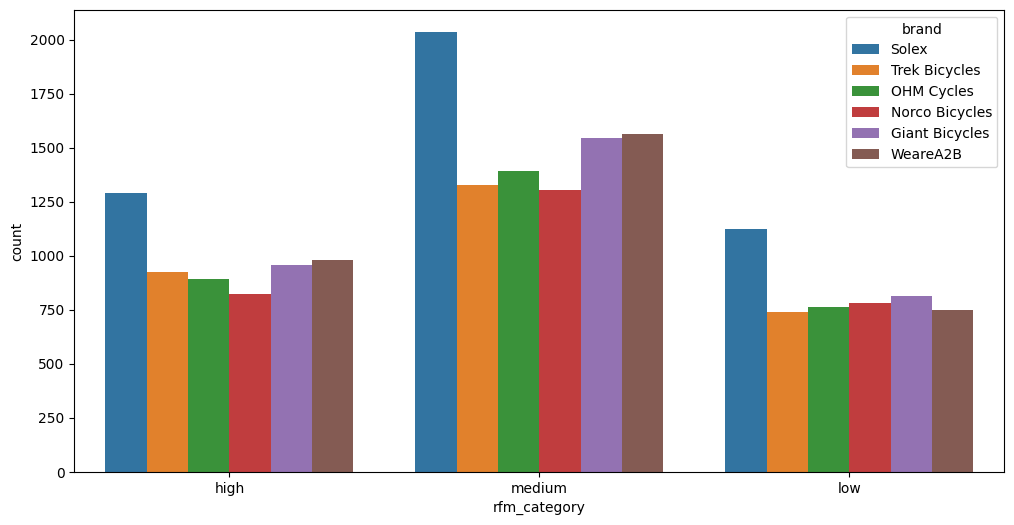

In [181]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rfm_category', hue='brand', data=merged_df, hue_order=['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles', 'Giant Bicycles', 'WeareA2B'])

<Axes: xlabel='rfm_category', ylabel='count'>

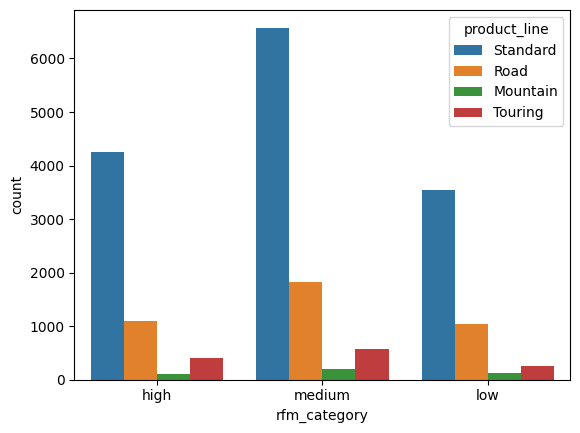

In [182]:
sns.countplot(x='rfm_category', hue='product_line', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

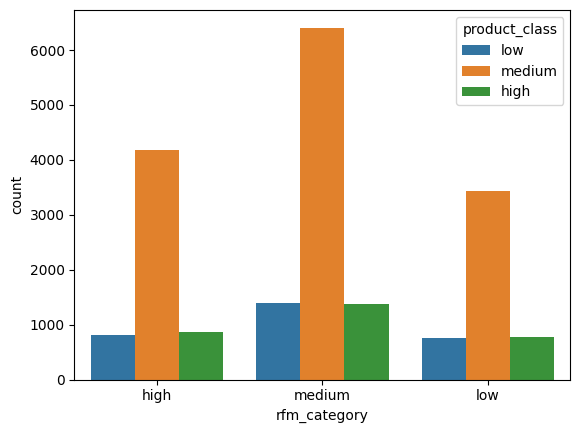

In [183]:
sns.countplot(x='rfm_category', hue='product_class', data=merged_df, hue_order=['low', 'medium', 'high'])

<Axes: xlabel='rfm_category', ylabel='count'>

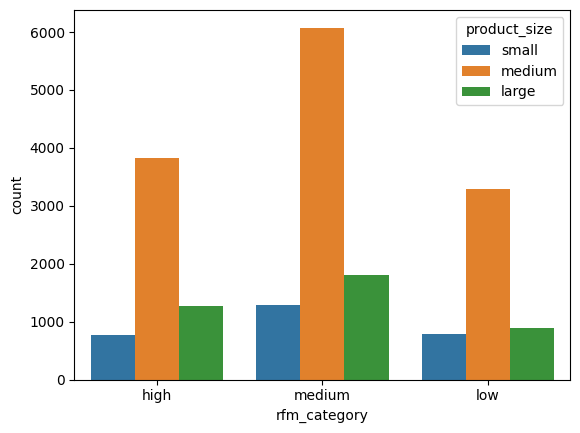

In [184]:
sns.countplot(x='rfm_category', hue='product_size', data=merged_df, hue_order=['small', 'medium', 'large'])

<Axes: xlabel='rfm_category', ylabel='count'>

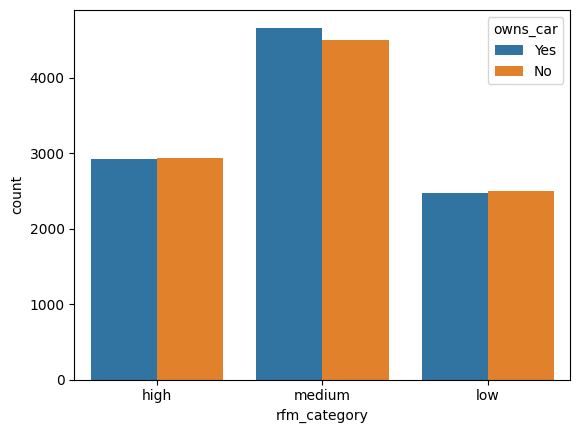

In [185]:
sns.countplot(x='rfm_category', hue='owns_car', data=merged_df)

<Axes: xlabel='rfm_category', ylabel='count'>

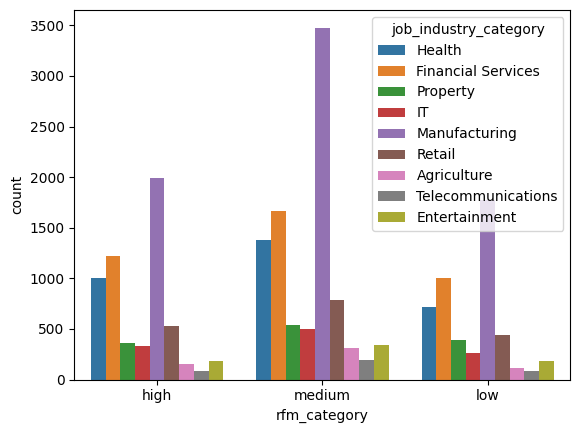

In [186]:
sns.countplot(x='rfm_category', hue='job_industry_category', data=merged_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Health'),
  Text(1, 0, 'Financial Services'),
  Text(2, 0, 'Property'),
  Text(3, 0, 'IT'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Retail'),
  Text(6, 0, 'Agriculture'),
  Text(7, 0, 'Telecommunications'),
  Text(8, 0, 'Entertainment')])

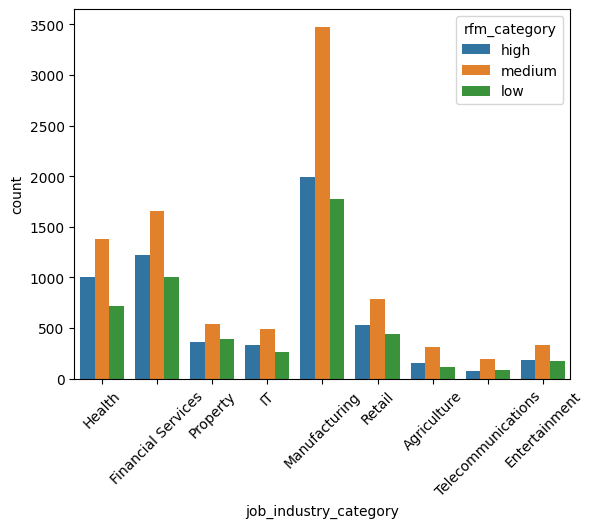

In [187]:
# Reverse the hue and x in the chart above

sns.countplot(x='job_industry_category', hue='rfm_category', data=merged_df)
plt.xticks(rotation=45)

# Finding: those who work in the manufacturing, financial services, and health contribute the most values.

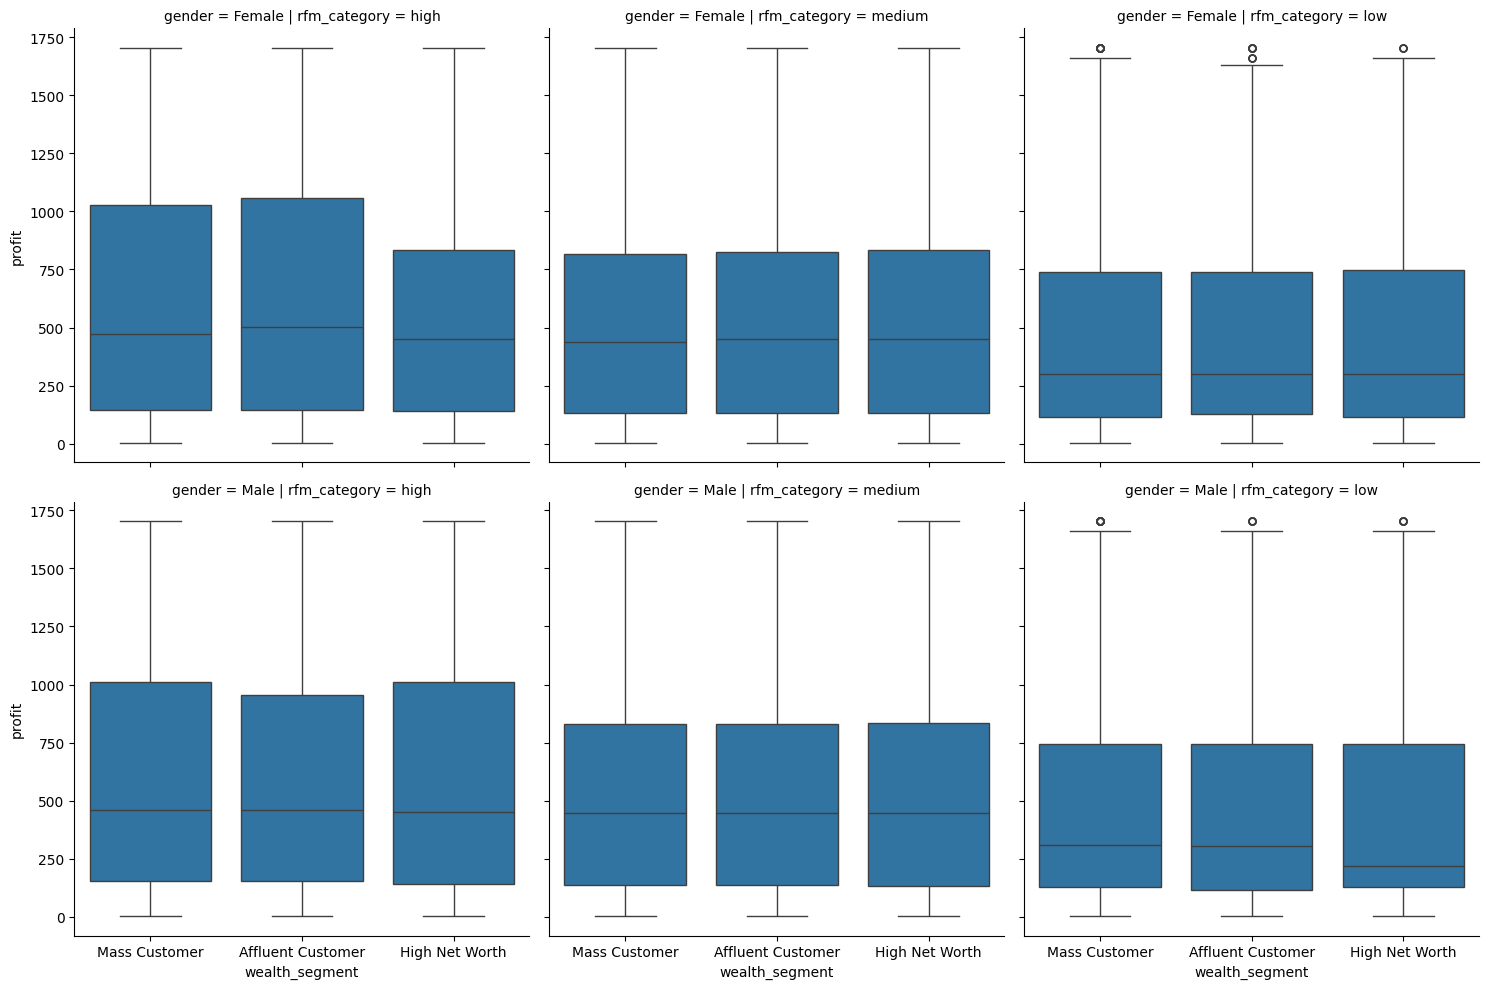

In [188]:
sns.catplot(x='wealth_segment', y='profit', kind='box', row='gender', col='rfm_category', data=merged_df)

# The median profit generated by customers from high and medium value group are similar, but the mean profit is greater for high-value group
# The difference between wealth_segment is not significant within the same RFM category
# Male customers with high net worth contribute the least profit in the low-value group; understandable because their wealth would definitely
# support them to buy more expensive product; but they might not purchase very often and just bought accessories; they are not the main customers
# in the low-value group.

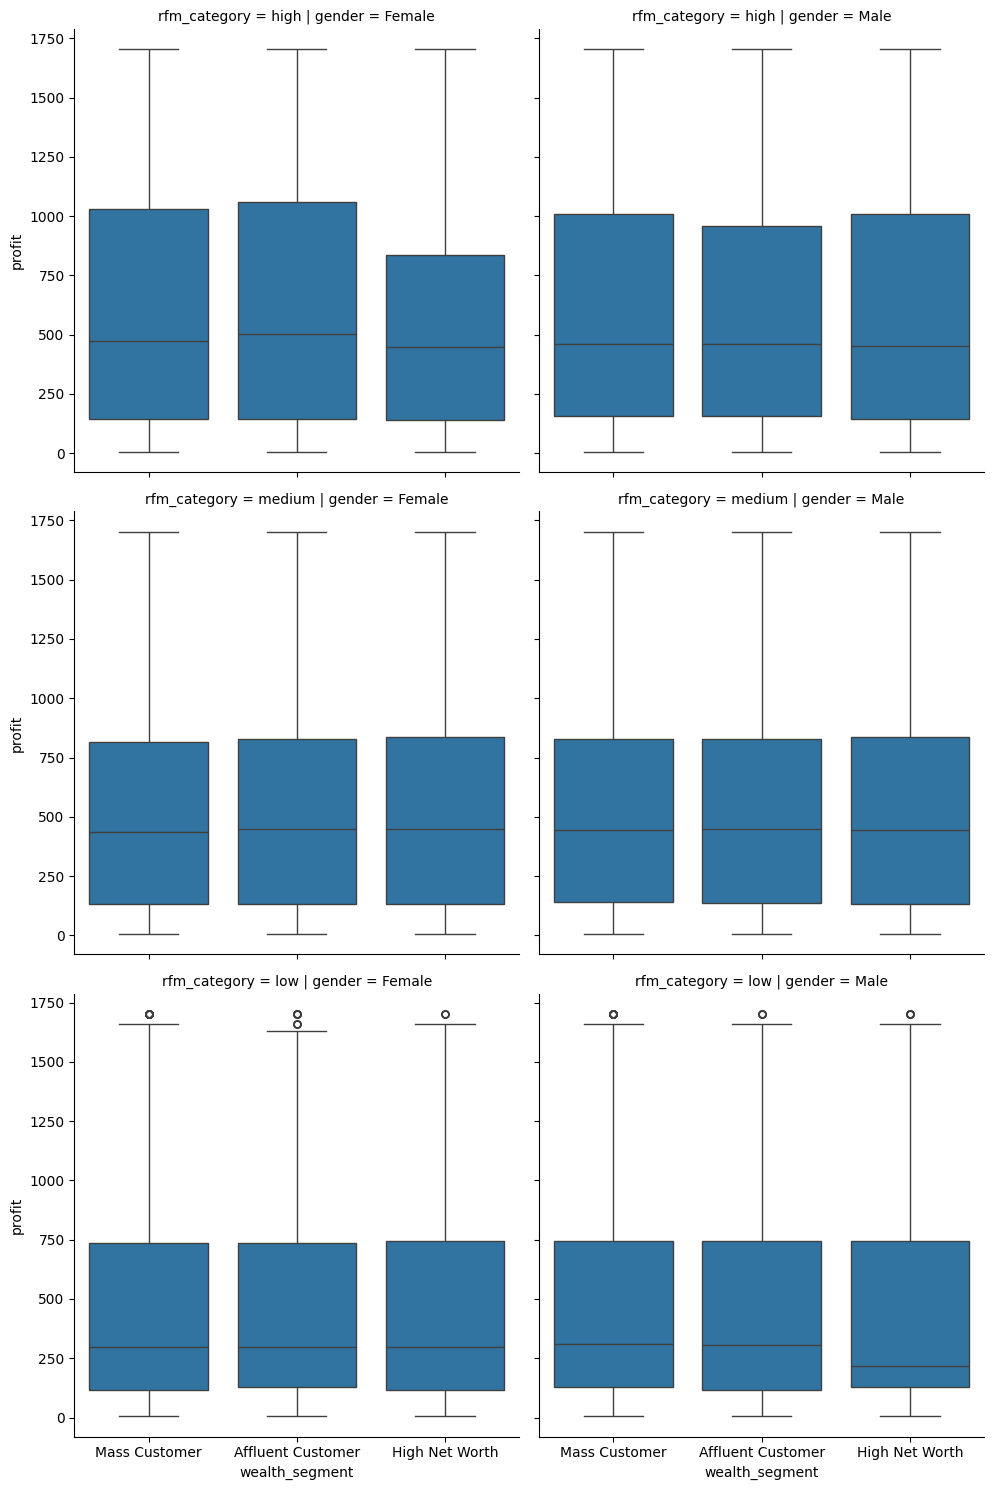

In [189]:
# Reverse the row and column of the chart above

sns.catplot(x='wealth_segment', y='profit', kind='box', row='rfm_category', col='gender', data=merged_df)

# Customers within the same RFM category often bring similar amount of profits, regardless of their gender and wealth segment.
# However, male customers with high net worth contribute the lowest profit in the low-value group.

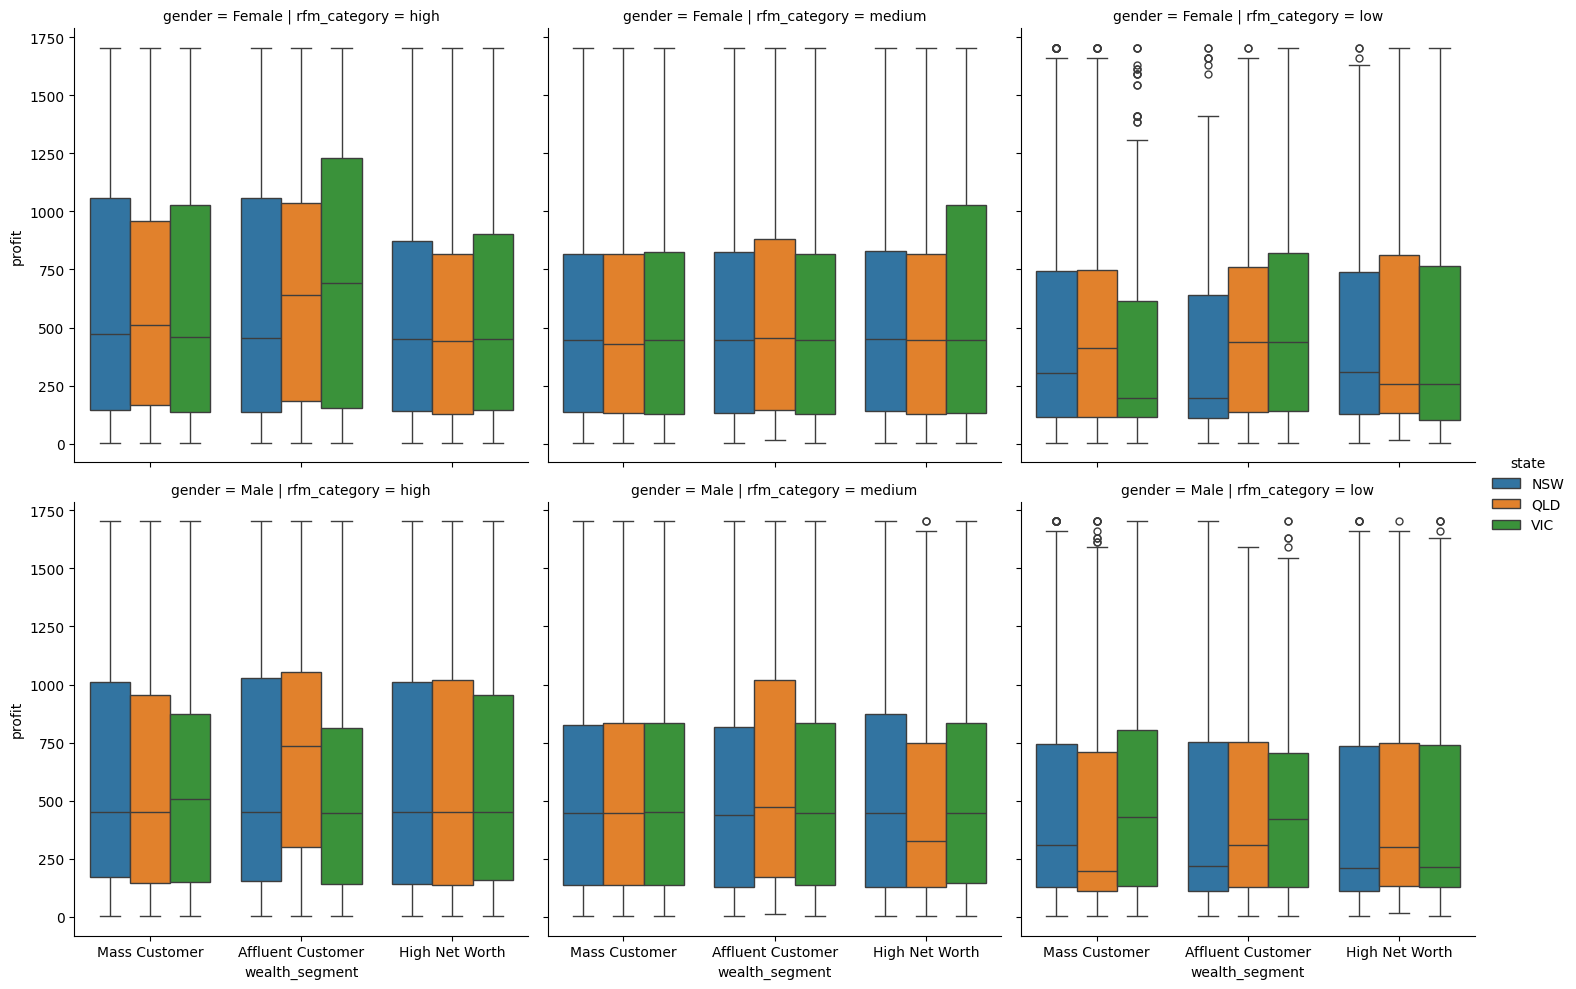

In [190]:
sns.catplot(x='wealth_segment', y='profit', kind='box', row='gender', col='rfm_category', hue='state', data=merged_df)

# For female customers in the medium-value group, state and wealth segments don't have a large impact on the profit they contribute
# However, for female customers in the high-value group, affluent customers who live in VIC bring the most profit.
# In the low-value group, affluent customers from QLD and VID bring the most profit.

# For male customers in the high-value and medium-value group, the affluent customers from QLD contribute the most profit.
# For male customers in the low-value group, the mass customers from VIC contribute the most profit.